## Import Libraries

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [63]:
# import our dataset
Dataset = pd.read_excel("API_SP.POP.TOTL_DS2_en_excel_v2_1584408 (1).xlsx")

In [64]:
Dataset.head()

Country Name Country Code     Indicator Name Indicator Code  \
0                        Aruba          ABW  Population, total    SP.POP.TOTL   
1  Africa Eastern and Southern          AFE  Population, total    SP.POP.TOTL   
2                  Afghanistan          AFG  Population, total    SP.POP.TOTL   
3   Africa Western and Central          AFW  Population, total    SP.POP.TOTL   
4                       Angola          AGO  Population, total    SP.POP.TOTL   

          1960         1961         1962         1963         1964  \
0      54608.0      55811.0      56682.0      57475.0      58178.0   
1  130692579.0  134169237.0  137835590.0  141630546.0  145605995.0   
2    8622466.0    8790140.0    8969047.0    9157465.0    9355514.0   
3   97256290.0   99314028.0  101445032.0  103667517.0  105959979.0   
4    5357195.0    5441333.0    5521400.0    5599827.0    5673199.0   

          1965  ...         2014         2015         2016         2017  \
0      58782.0  ...     103594.0     104257.0     104874.0     105439.0   
1  149742351.0  ...  583651101.0  600008424.0  616377605.0  632746570.0   
2    9565147.0  ...   32716210.0   33753499.0   34636207.0   35643418.0   
3  108336203.0  ...  397855507.0  408690375.0  419778384.0  431138704.0   
4    5736582.0  ...   27128337.0   28127721.0   29154746.0   30208628.0   

          2018         2019         2020         2021         2022  \
0     105962.0     106442.0     106585.0     106537.0     106445.0   
1  649757148.0  667242986.0  685112979.0  702977106.0  720859132.0   
2   36686784.0   37769499.0   38972230.0   40099462.0   41128771.0   
3  442646825.0  454306063.0  466189102.0  478185907.0  490330870.0   
4   31273533.0   32353588.0   33428486.0   34503774.0   35588987.0   

          2023  
0     106277.0  
1  739108306.0  
2   42239854.0  
3  502789511.0  
4   36684202.0  

[5 rows x 68 columns]

## Preprocess our Dataset And Feature Engineering

In [65]:
# Lets check for empty rows
Empty_rows = Dataset.isnull().all(axis=1)
Empty_rows

0      False
1      False
2      False
3      False
4      False
       ...  
261    False
262    False
263    False
264    False
265    False
Length: 266, dtype: bool

In [66]:
#lets check the total number of empty rows
Empty_rows.sum()

0

In [67]:
# So we have no empty rows, therefore no need to drop any rows

In [68]:
# Let us check for duplicates
duplicates = Dataset.duplicated()
duplicates.sum()

0

In [69]:
# So no duplicates, we ain't dropping any rows

In [70]:
# lets get an info of our dataset
Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 68 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    266 non-null    object 
 1   Country Code    266 non-null    object 
 2   Indicator Name  266 non-null    object 
 3   Indicator Code  266 non-null    object 
 4   1960            264 non-null    float64
 5   1961            264 non-null    float64
 6   1962            264 non-null    float64
 7   1963            264 non-null    float64
 8   1964            264 non-null    float64
 9   1965            264 non-null    float64
 10  1966            264 non-null    float64
 11  1967            264 non-null    float64
 12  1968            264 non-null    float64
 13  1969            264 non-null    float64
 14  1970            264 non-null    float64
 15  1971            264 non-null    float64
 16  1972            264 non-null    float64
 17  1973            264 non-null    flo

In [71]:
# lets get a description of our dataset
Dataset.describe()

1960          1961          1962          1963          1964  \
count  2.640000e+02  2.640000e+02  2.640000e+02  2.640000e+02  2.640000e+02   
mean   1.157939e+08  1.173869e+08  1.195401e+08  1.222050e+08  1.248922e+08   
std    3.639920e+08  3.684672e+08  3.751049e+08  3.837174e+08  3.923714e+08   
min    2.646000e+03  2.888000e+03  3.171000e+03  3.481000e+03  3.811000e+03   
25%    5.132212e+05  5.231345e+05  5.337595e+05  5.449288e+05  5.566630e+05   
50%    3.708088e+06  3.816540e+06  3.931214e+06  4.033994e+06  4.112910e+06   
75%    2.670606e+07  2.748694e+07  2.830289e+07  2.914708e+07  3.001684e+07   
max    3.031517e+09  3.072470e+09  3.126894e+09  3.193470e+09  3.260480e+09   

               1965          1966          1967          1968          1969  \
count  2.640000e+02  2.640000e+02  2.640000e+02  2.640000e+02  2.640000e+02   
mean   1.276182e+08  1.304676e+08  1.333152e+08  1.362430e+08  1.392759e+08   
std    4.011556e+08  4.104328e+08  4.196670e+08  4.291879e+08  4.390998e+08   
min    4.161000e+03  4.531000e+03  4.930000e+03  5.354000e+03  5.646000e+03   
25%    5.651150e+05  5.691470e+05  5.773872e+05  5.832700e+05  5.875942e+05   
50%    4.194930e+06  4.257383e+06  4.317222e+06  4.410692e+06  4.515734e+06   
75%    3.084892e+07  3.163010e+07  3.209247e+07  3.249927e+07  3.277149e+07   
max    3.328243e+09  3.398510e+09  3.468395e+09  3.540186e+09  3.614593e+09   

       ...          2014          2015          2016          2017  \
count  ...  2.650000e+02  2.650000e+02  2.650000e+02  2.650000e+02   
mean   ...  2.948007e+08  2.986442e+08  3.024871e+08  3.063370e+08   
std    ...  9.224214e+08  9.336474e+08  9.448081e+08  9.559803e+08   
min    ...  1.089900e+04  1.087700e+04  1.085200e+04  1.082800e+04   
25%    ...  1.743309e+06  1.788196e+06  1.777557e+06  1.791003e+06   
50%    ...  1.028212e+07  1.035808e+07  1.032545e+07  1.030030e+07   
75%    ...  6.078914e+07  6.073058e+07  6.062750e+07  6.053671e+07   
max    ...  7.317305e+09  7.404251e+09  7.490956e+09  7.577110e+09   

               2018          2019          2020          2021          2022  \
count  2.650000e+02  2.650000e+02  2.650000e+02  2.650000e+02  2.650000e+02   
mean   3.101259e+08  3.138348e+08  3.174293e+08  3.206783e+08  3.236218e+08   
std    9.668651e+08  9.774204e+08  9.875137e+08  9.965683e+08  1.004474e+09   
min    1.086500e+04  1.095600e+04  1.106900e+04  1.120400e+04  1.131200e+04   
25%    1.797085e+06  1.788878e+06  1.790133e+06  1.786038e+06  1.768086e+06   
50%    1.039533e+07  1.044767e+07  1.060623e+07  1.050577e+07  1.048694e+07   
75%    6.042176e+07  5.987258e+07  6.170452e+07  6.358833e+07  6.549775e+07   
max    7.661178e+09  7.742725e+09  7.821272e+09  7.888964e+09  7.951595e+09   

               2023  
count  2.650000e+02  
mean   3.269710e+08  
std    1.013469e+09  
min    1.139600e+04  
25%    1.756374e+06  
50%    1.059380e+07  
75%    6.743811e+07  
max    8.024997e+09  

[8 rows x 64 columns]

In [72]:
# these columns are not necessary per the problem we have
Cleaned_Dataset = Dataset.drop(columns=['Indicator Name', 'Indicator Code', 'Country Code'])

## Visualisations

In [73]:
# from the question and our dataset we can only visualise the age of our population which is the years
# and also perform some categorical Visualisation

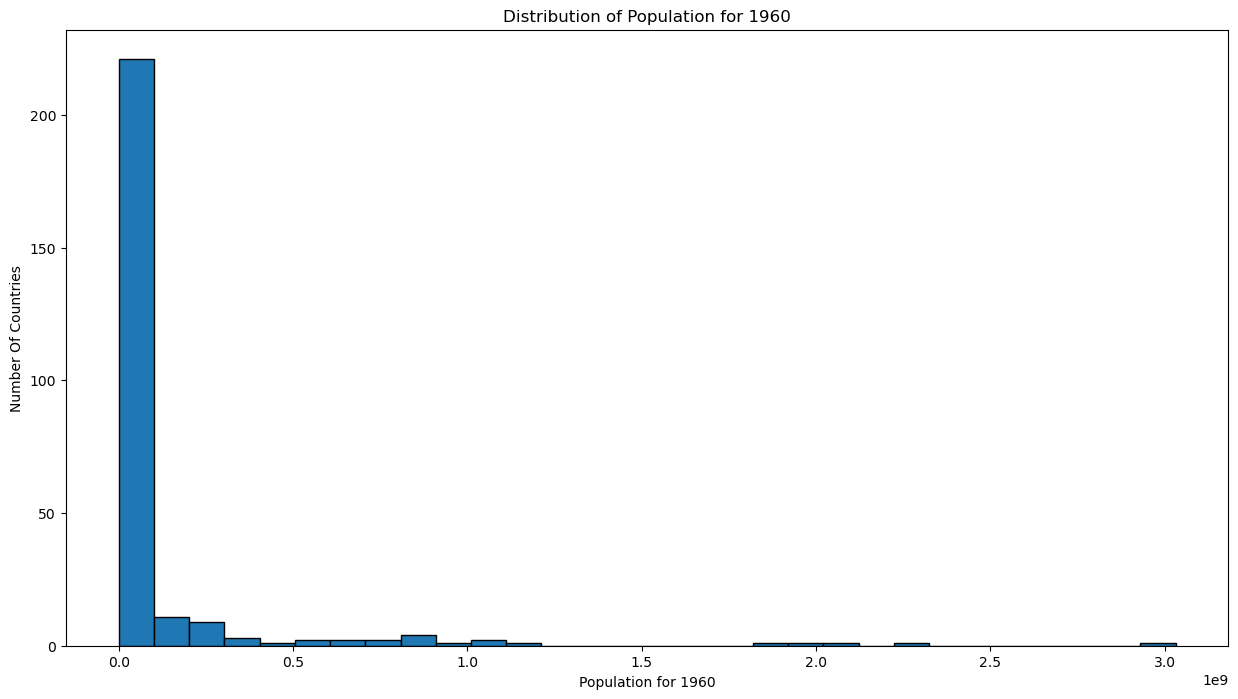

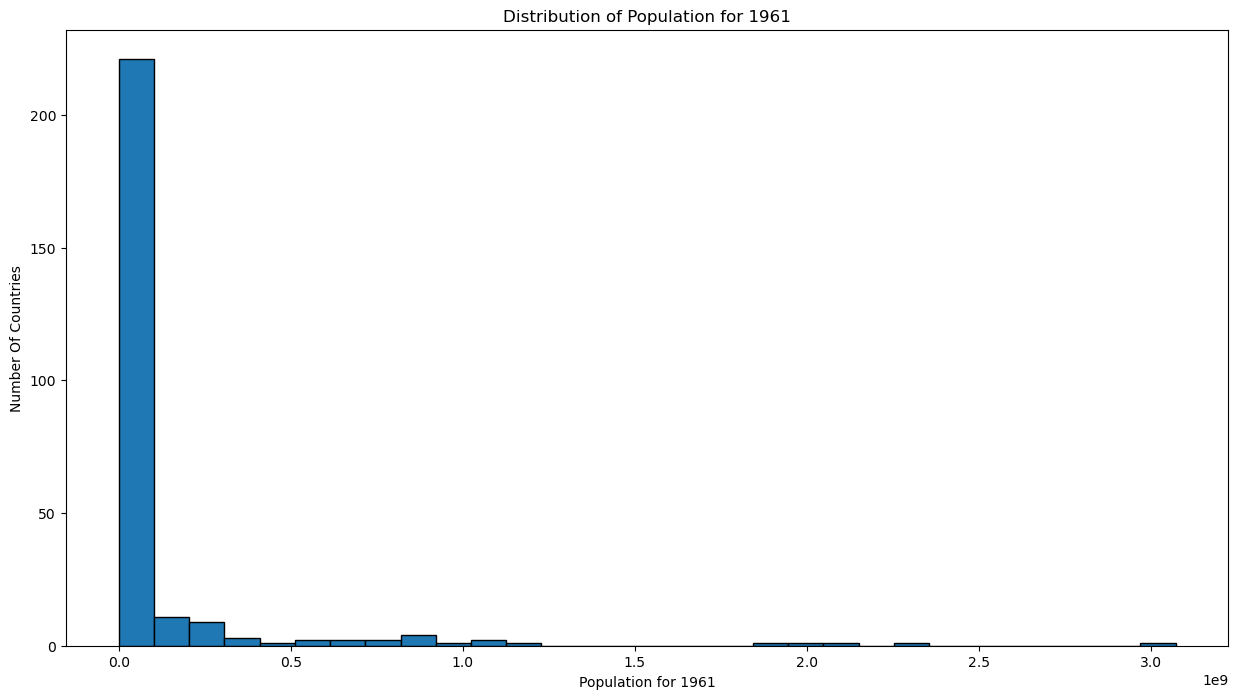

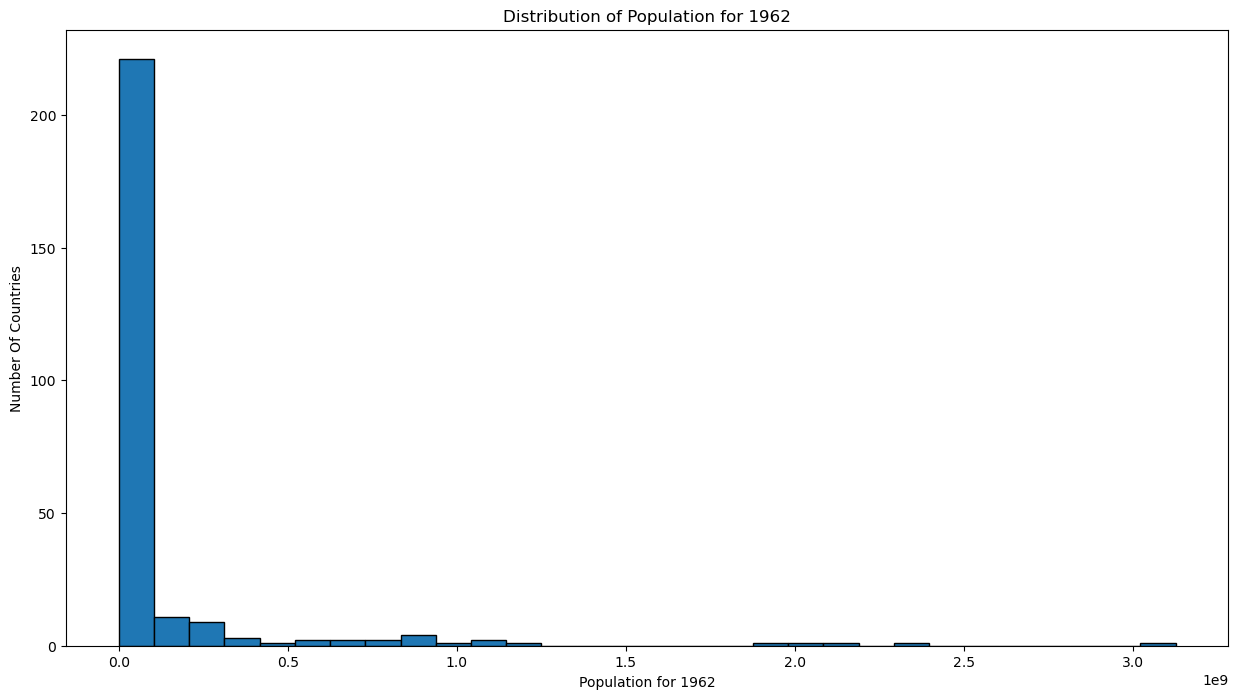

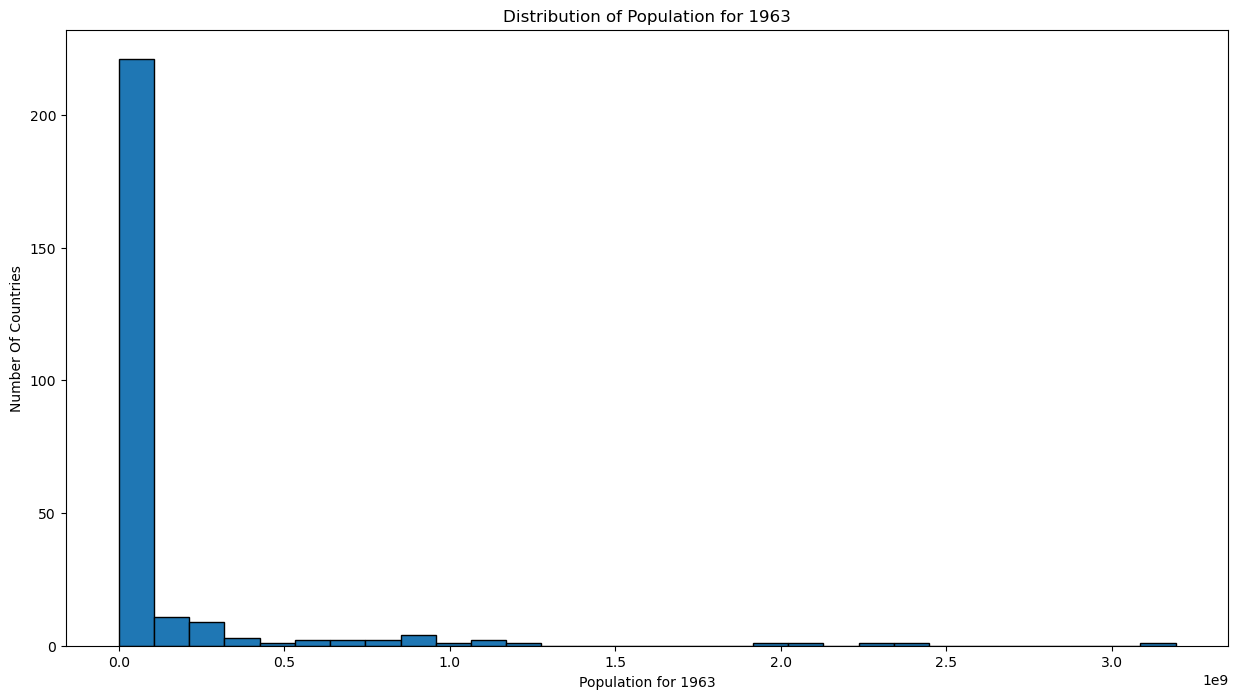

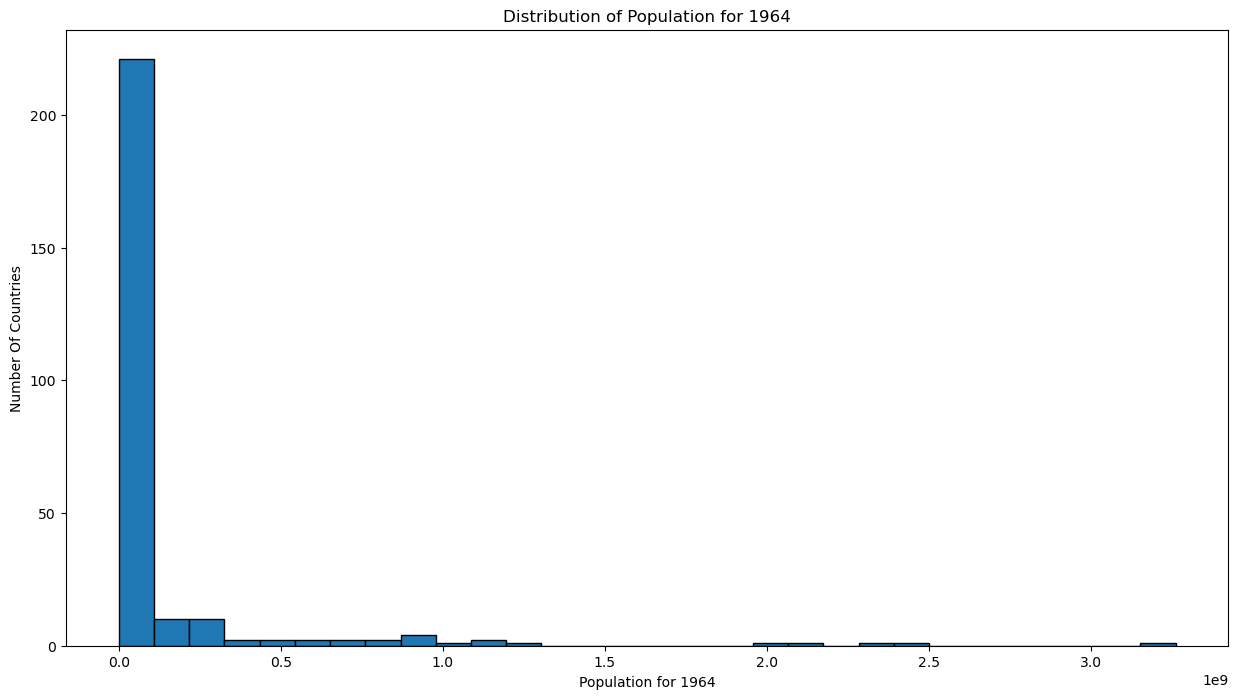

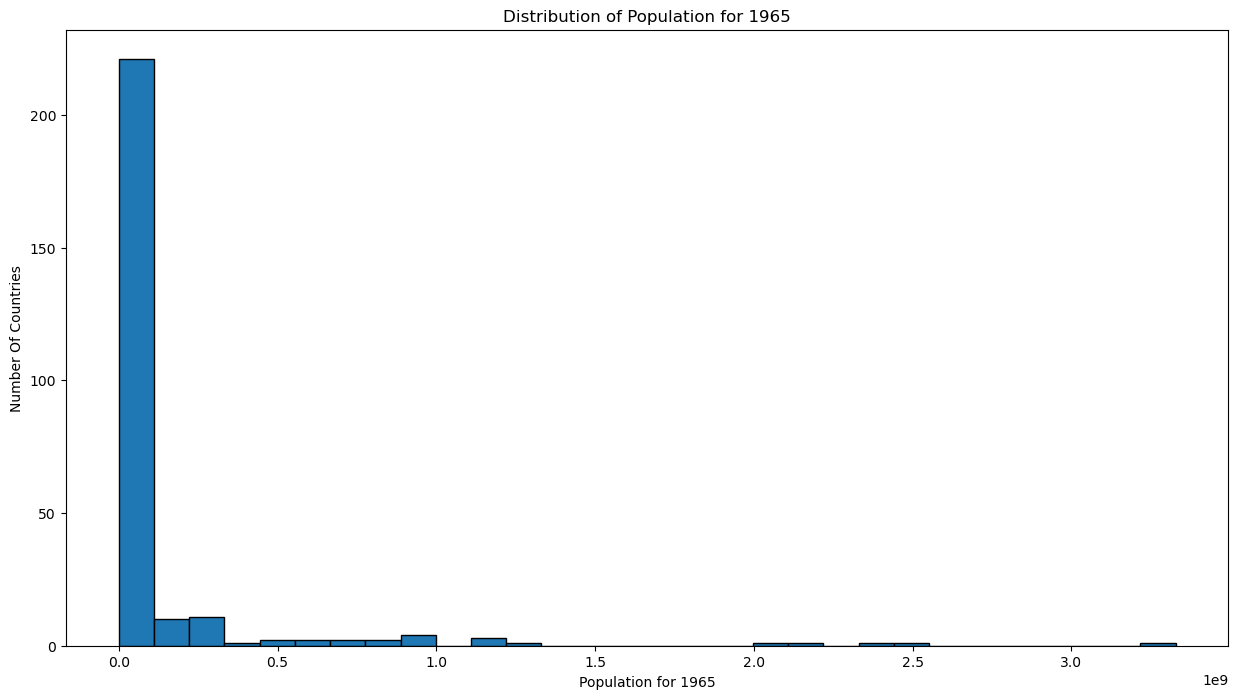

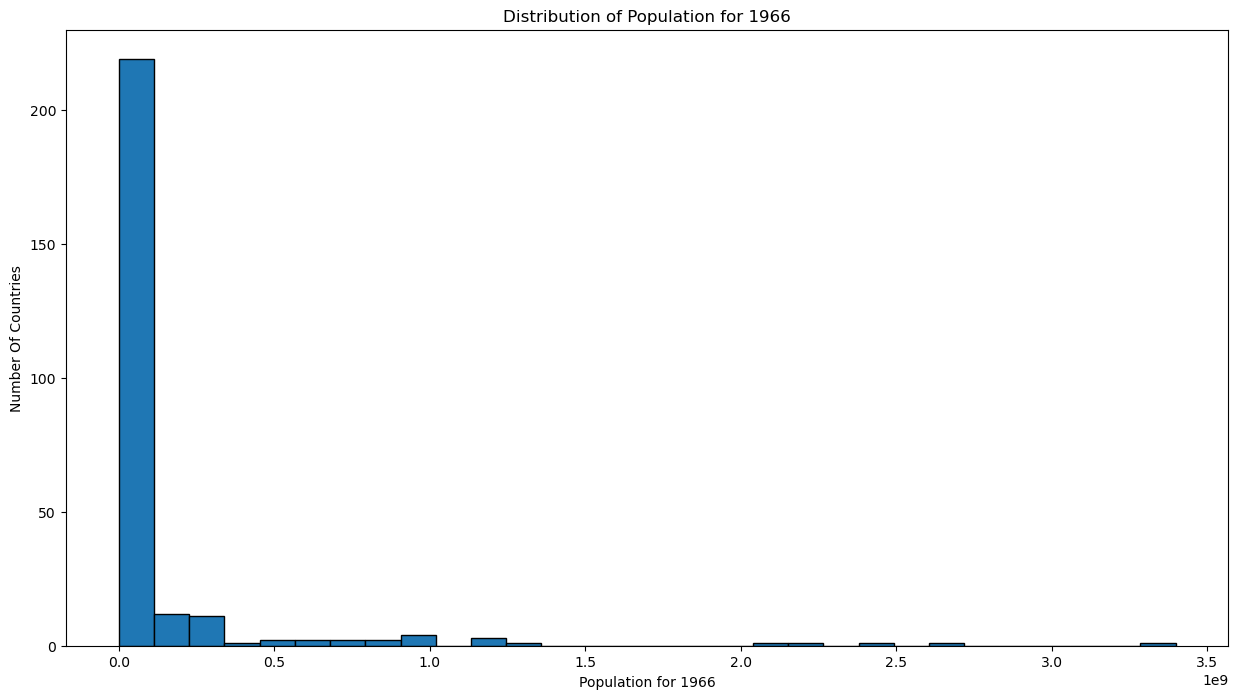

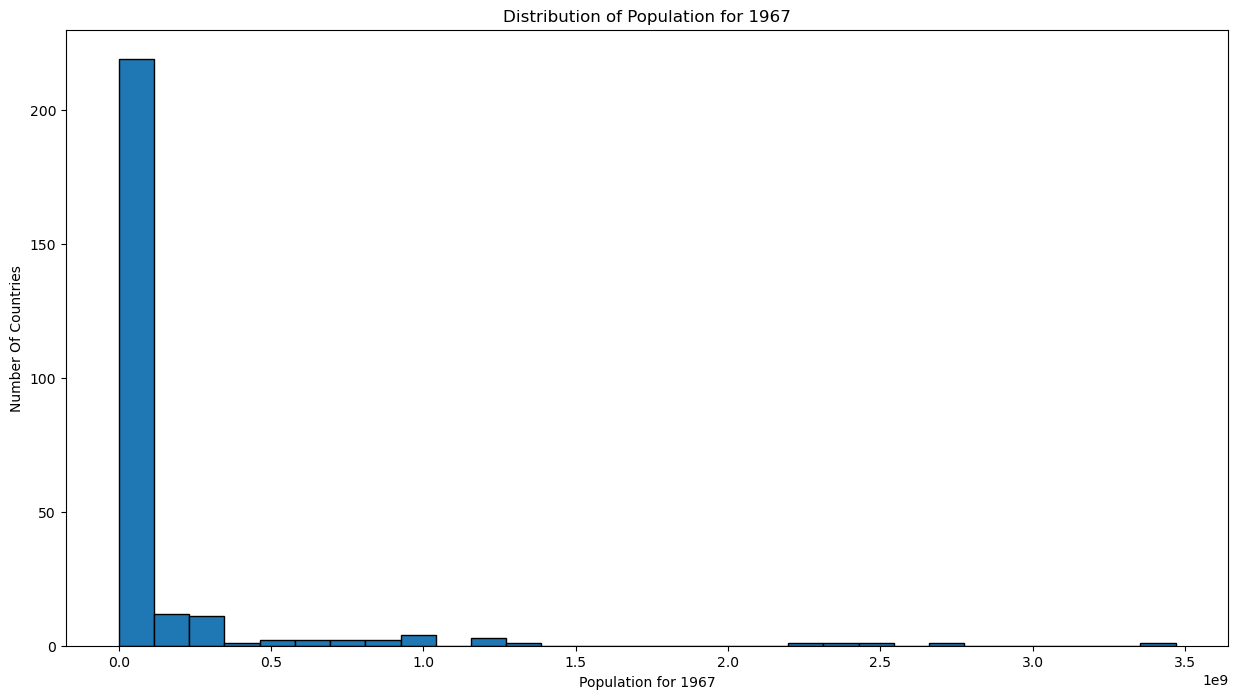

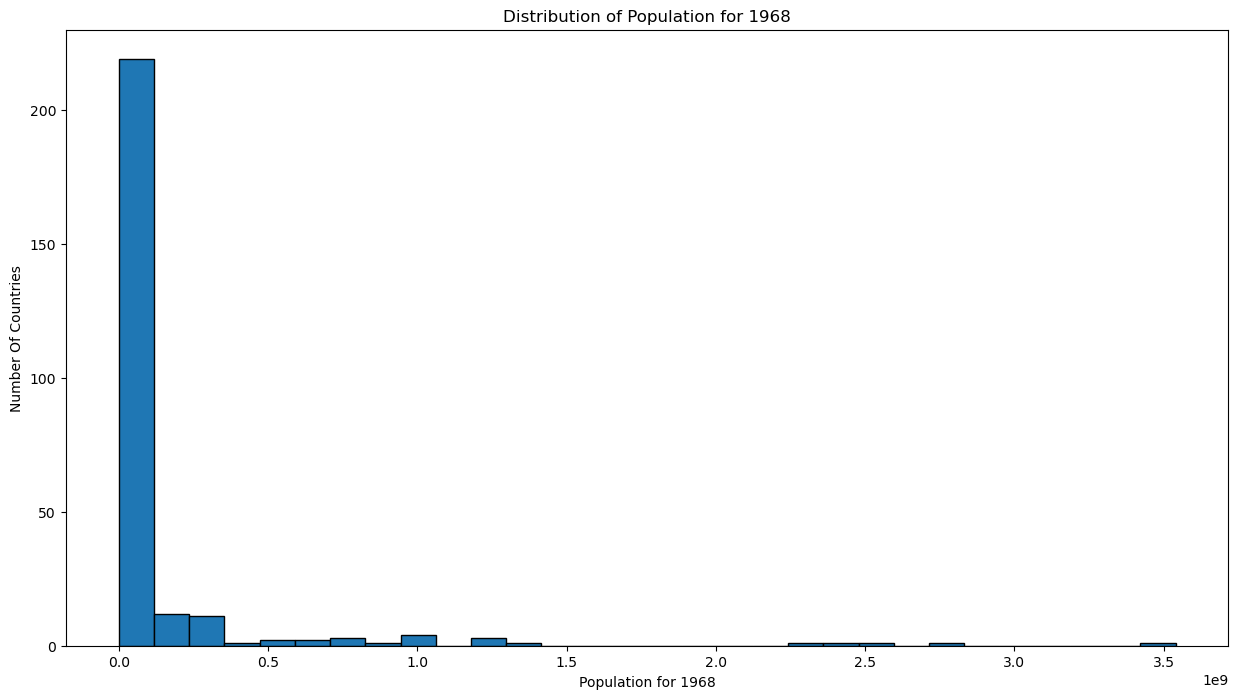

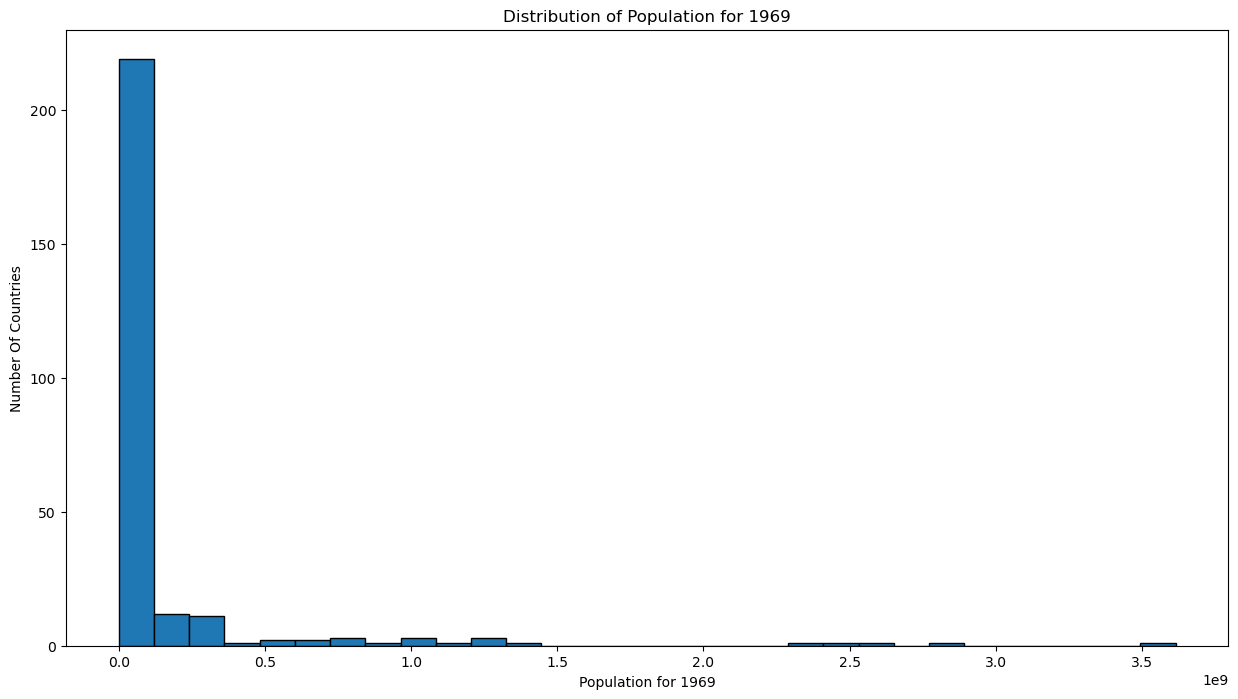

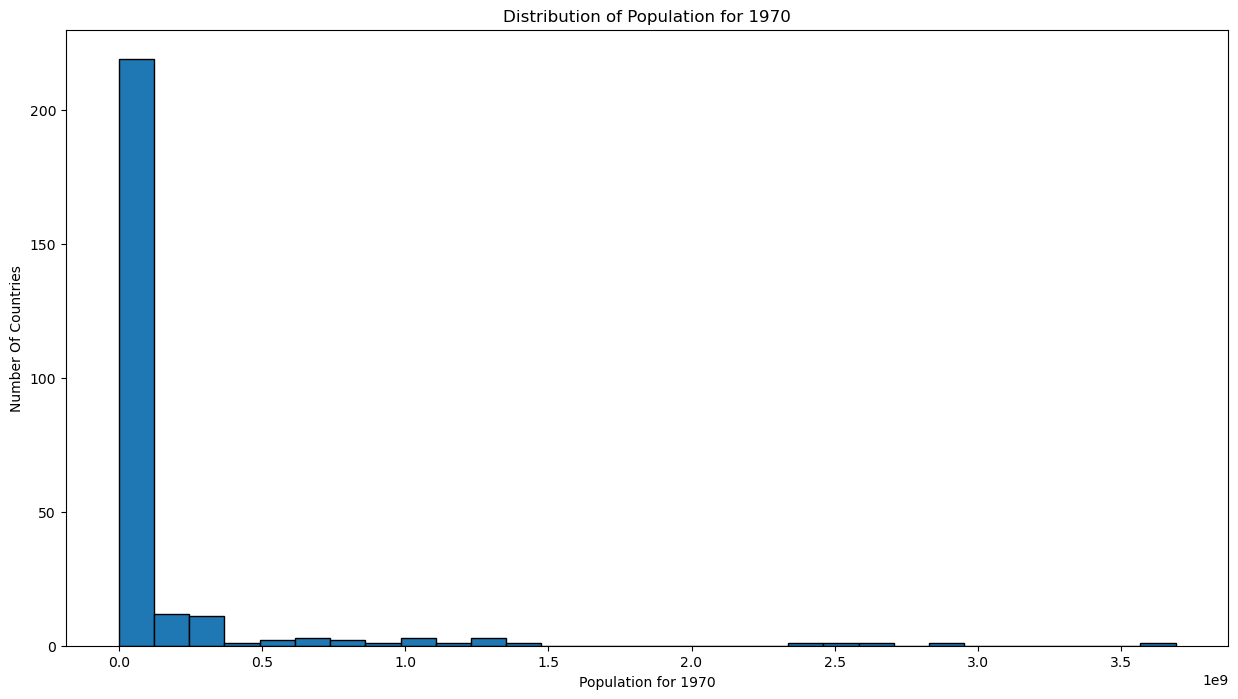

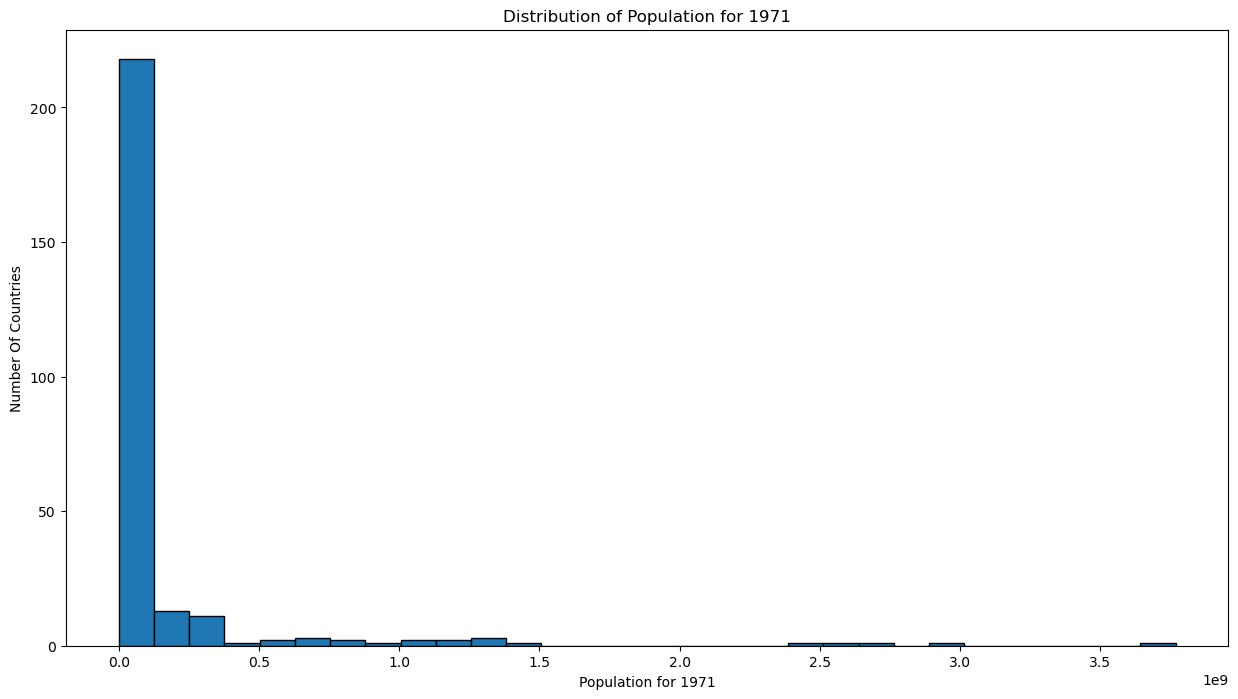

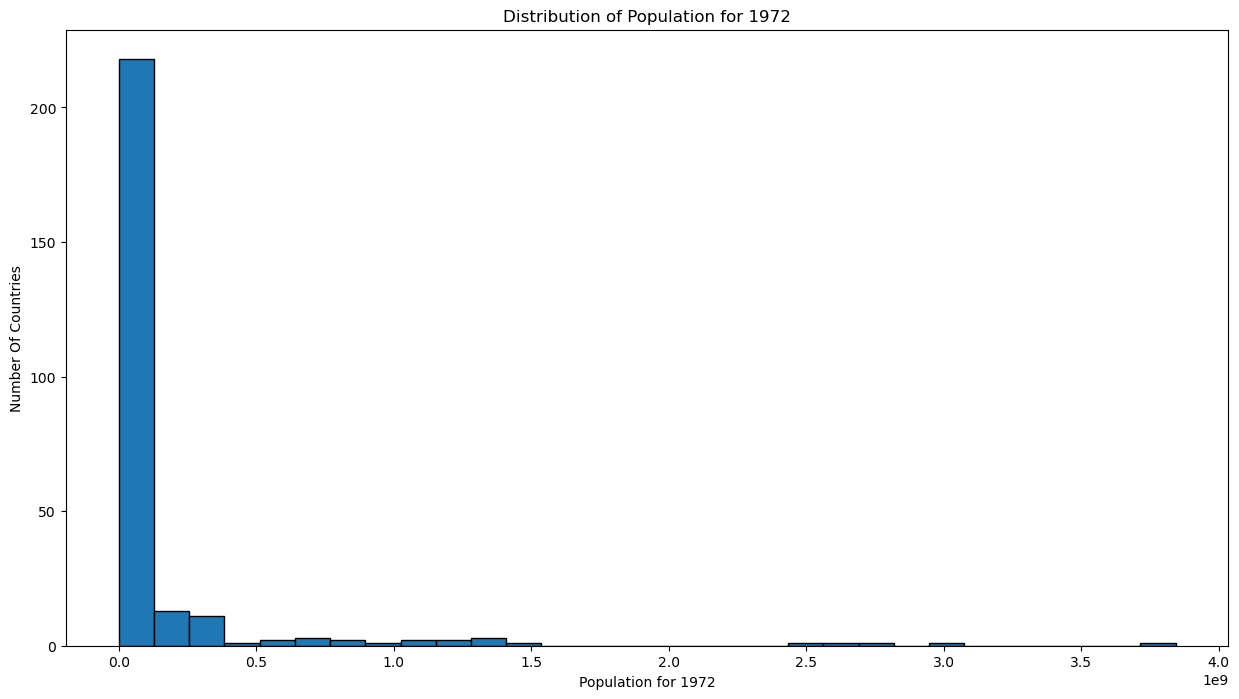

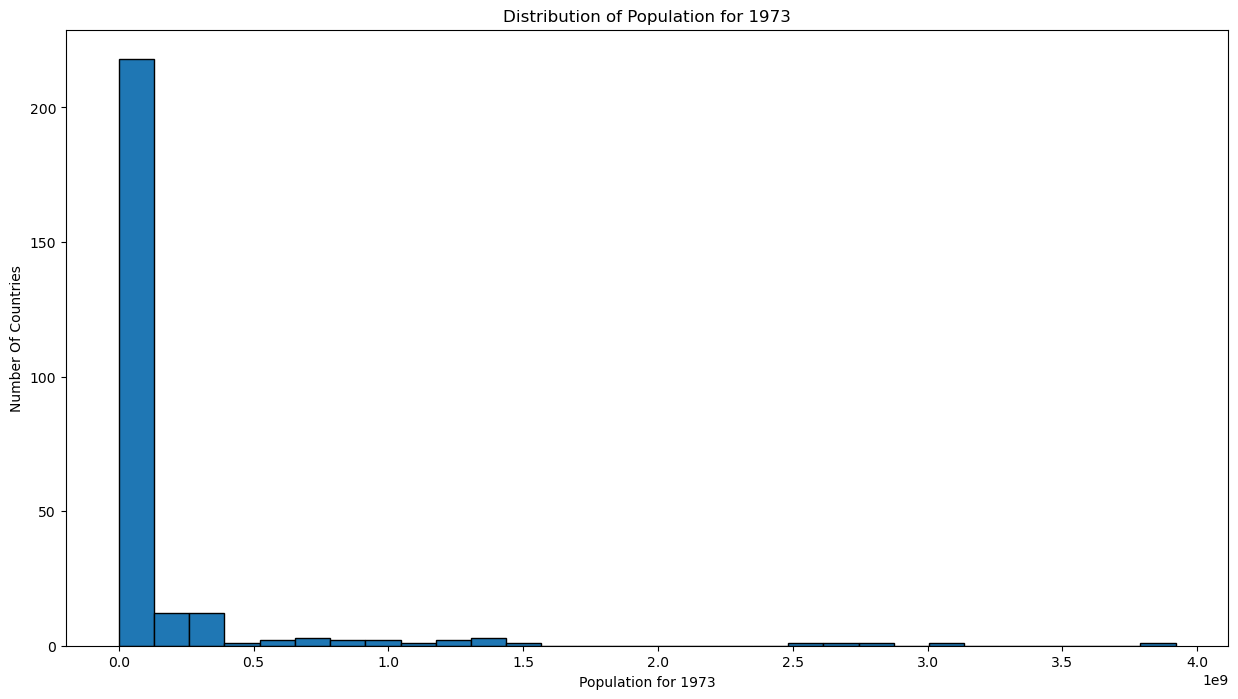

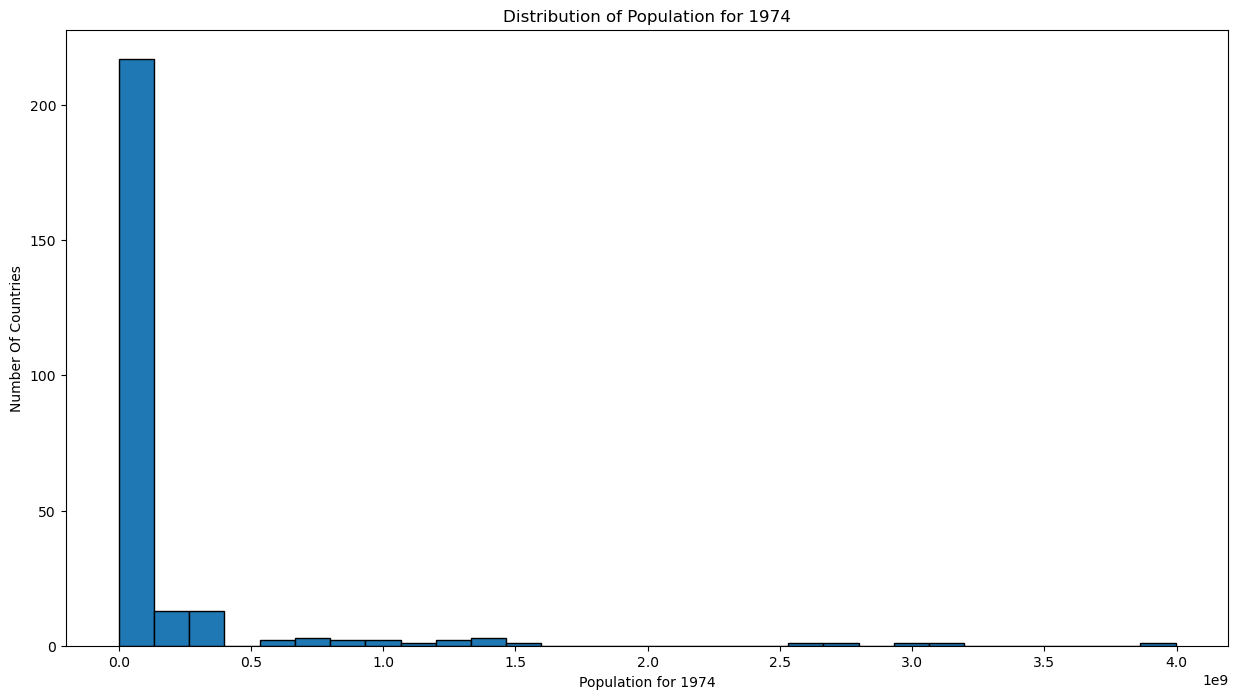

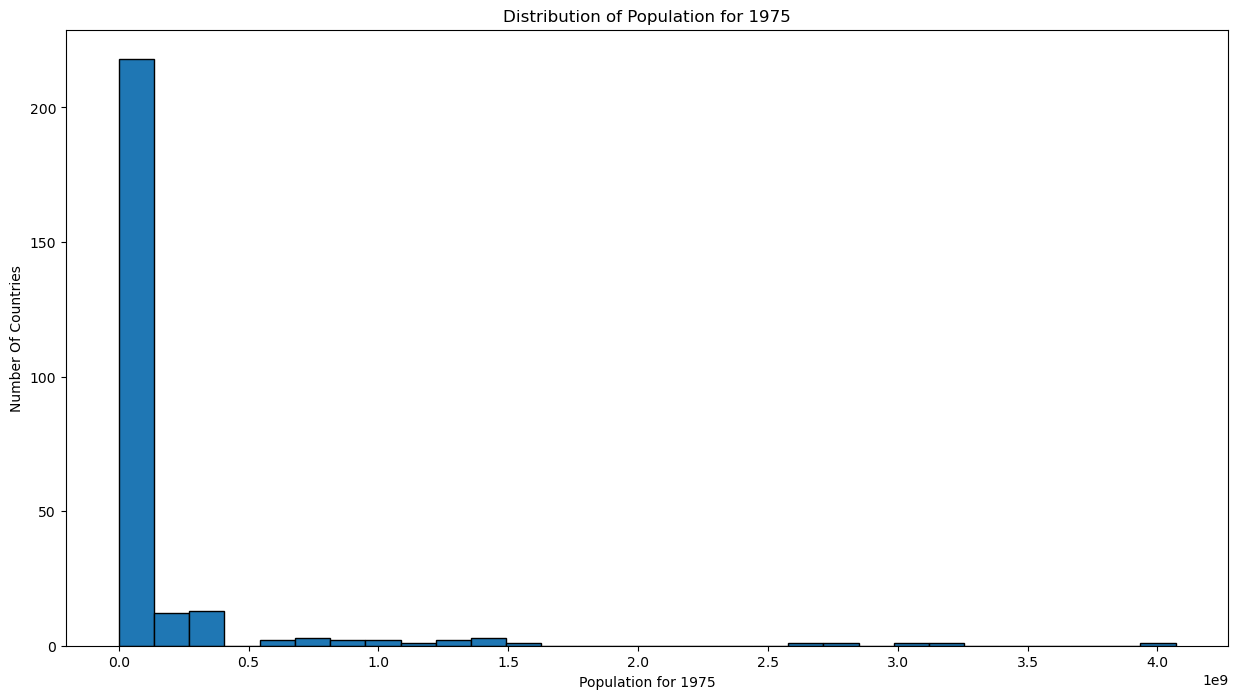

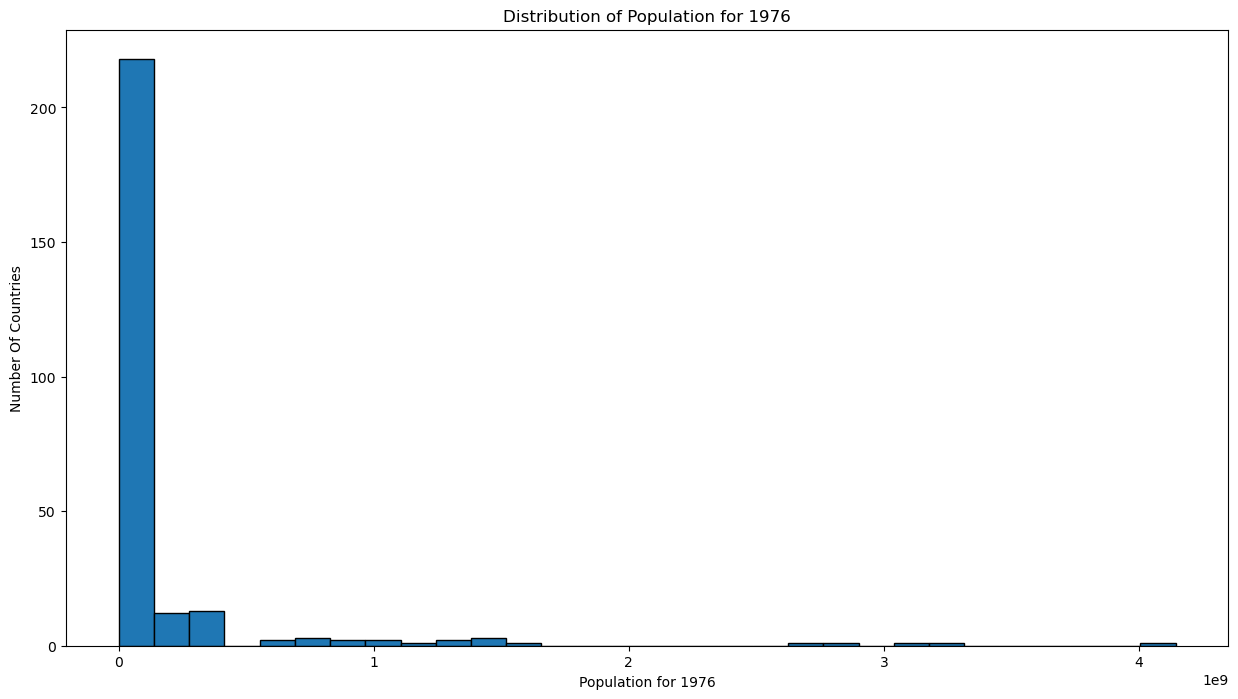

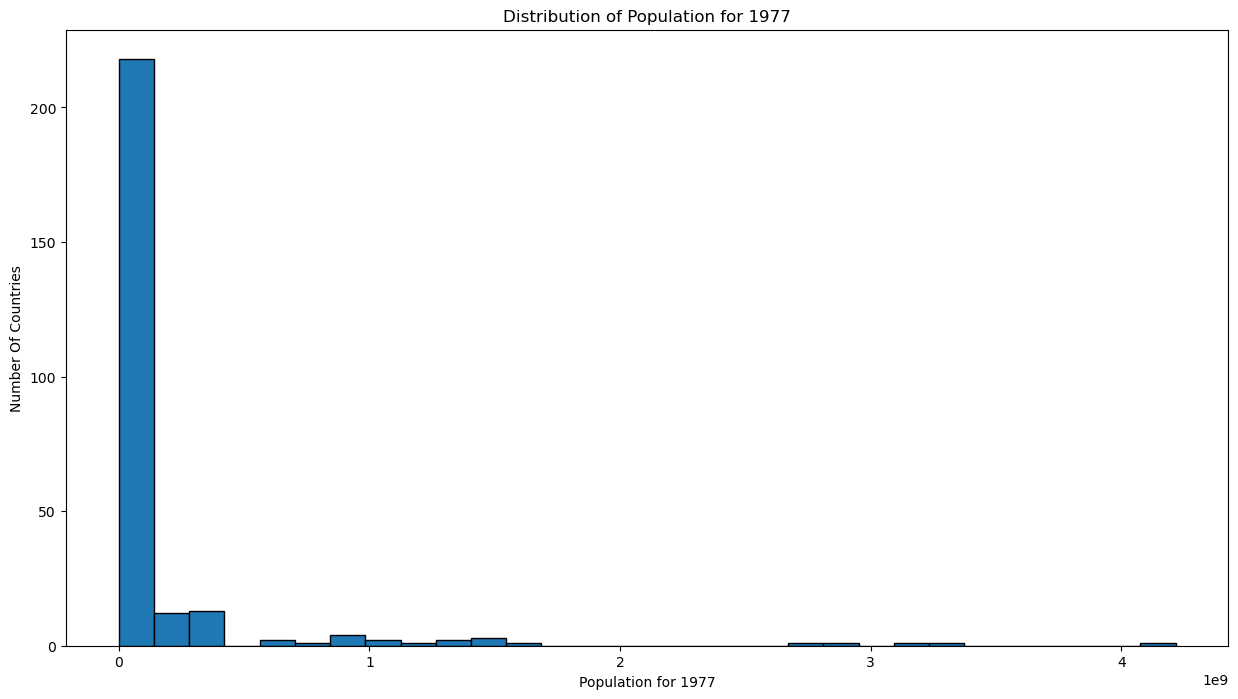

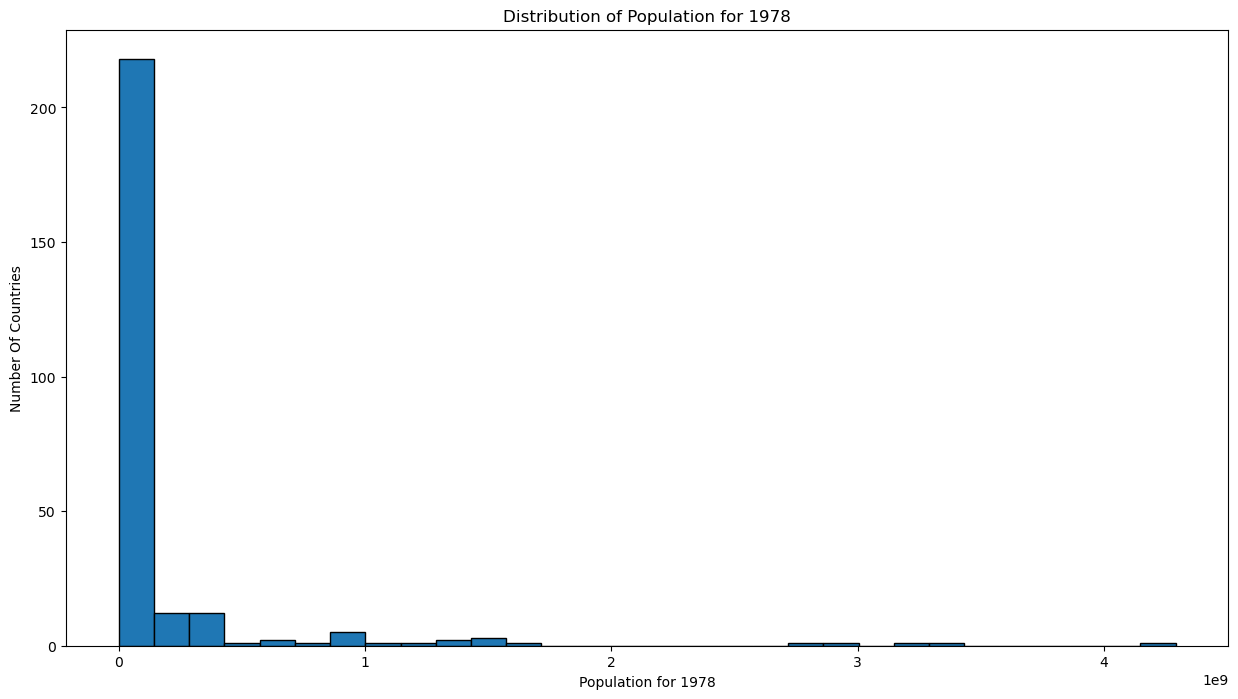

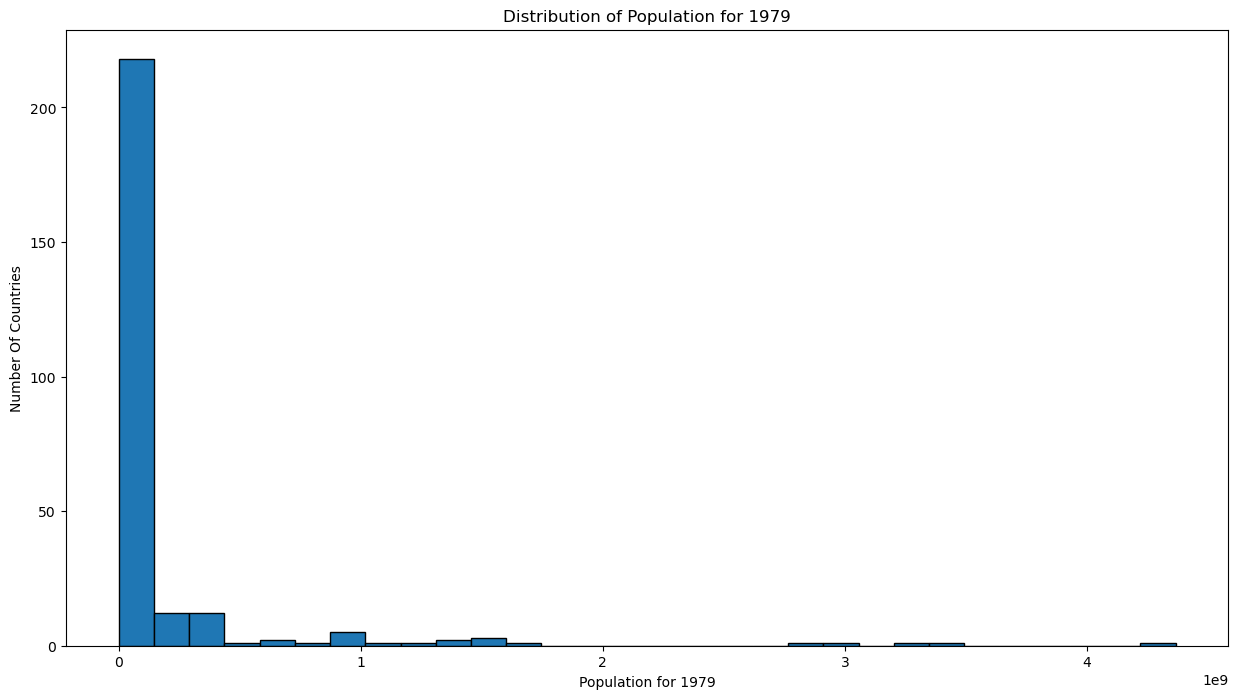

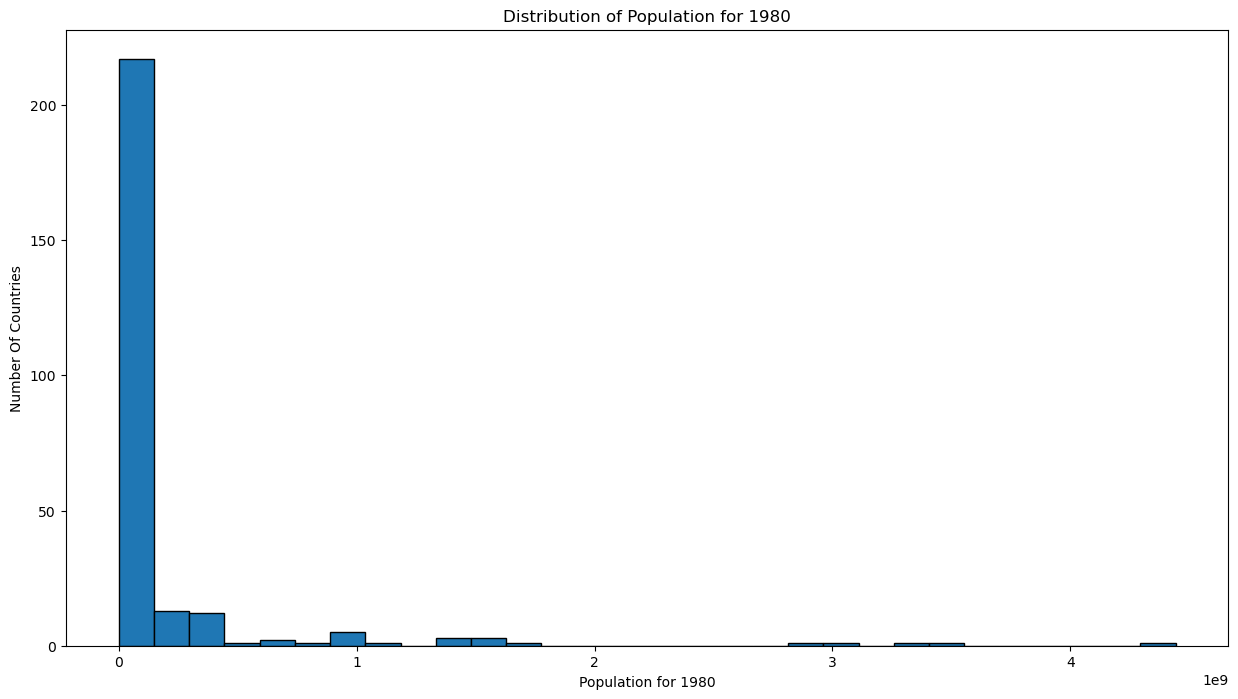

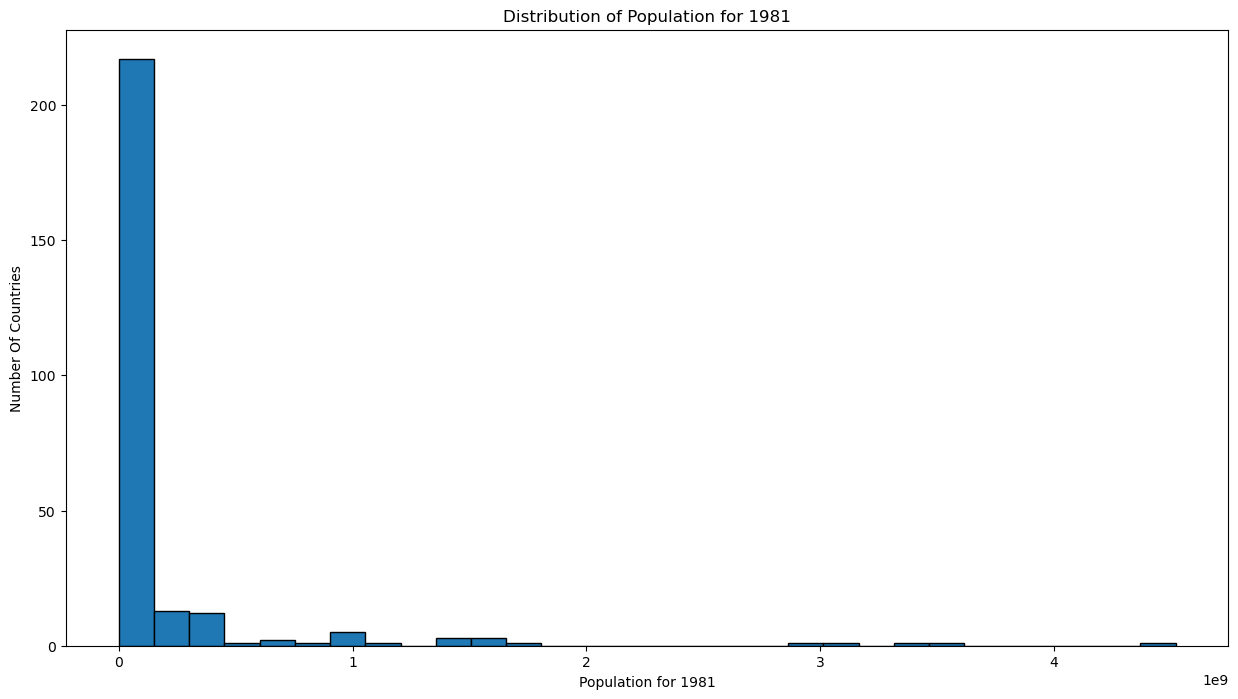

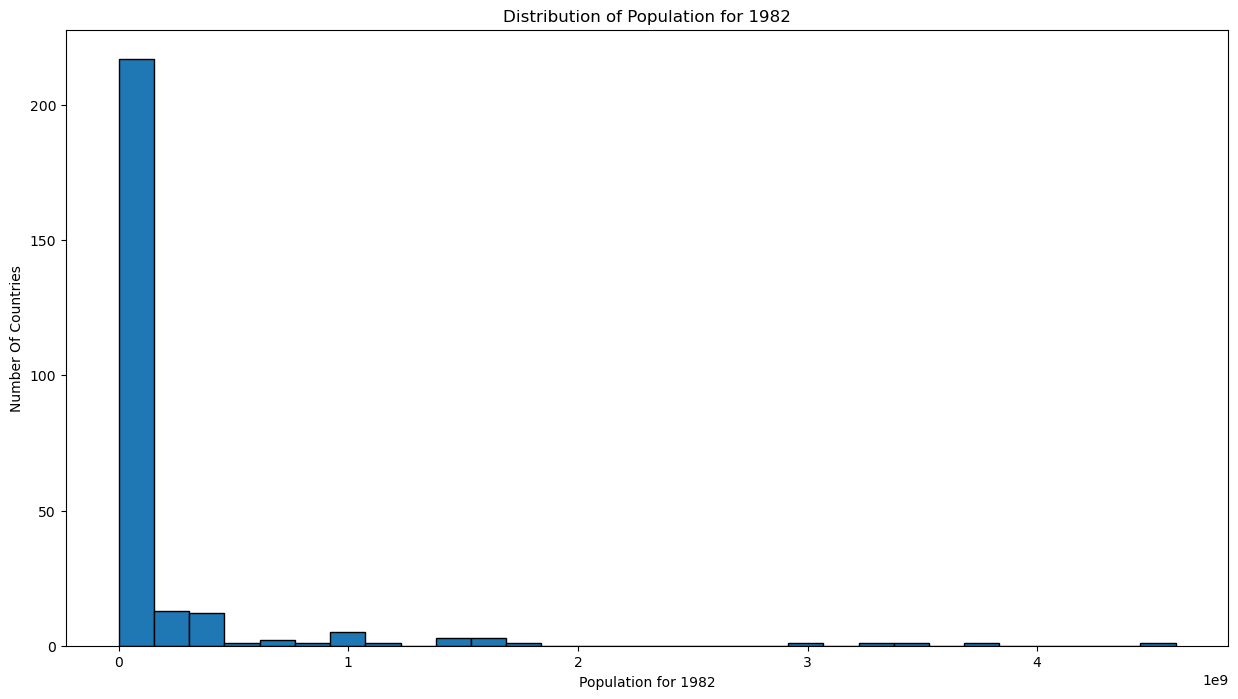

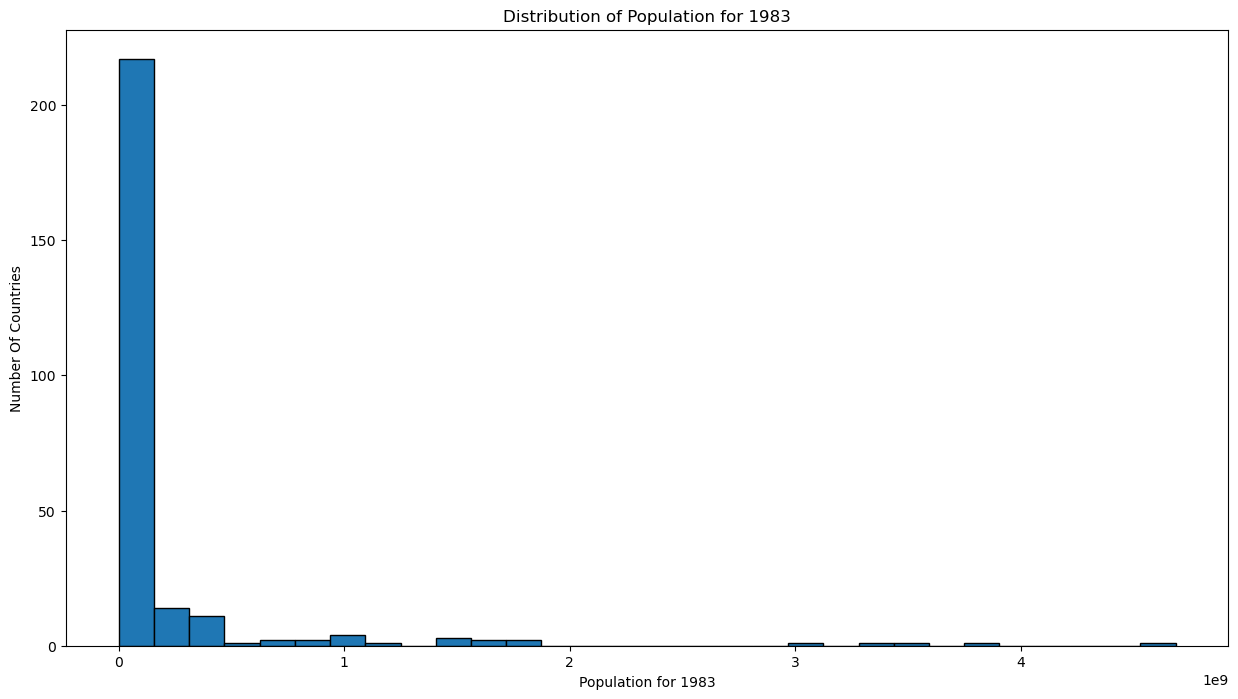

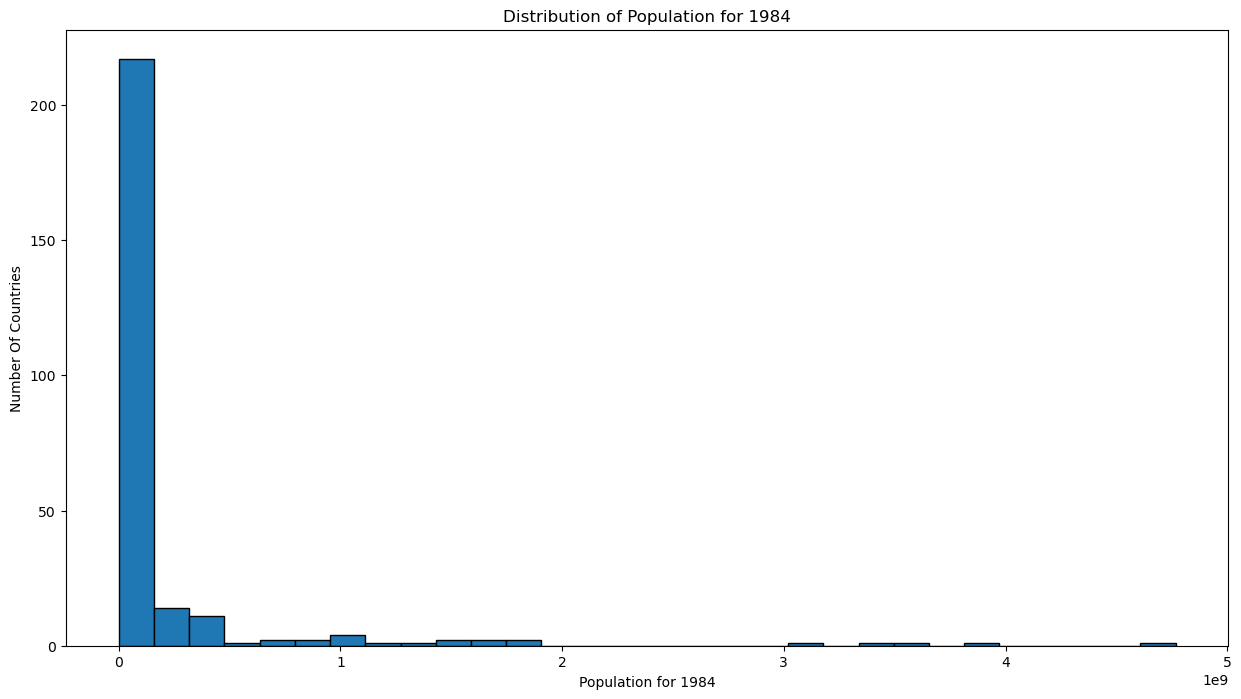

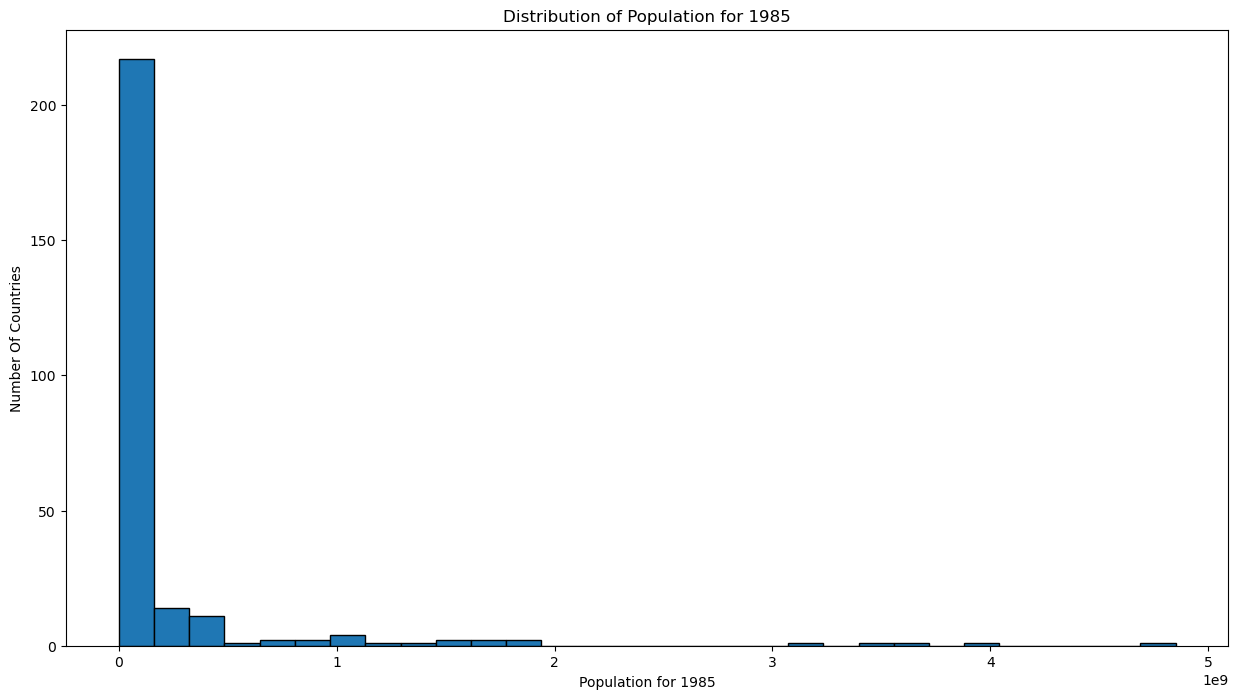

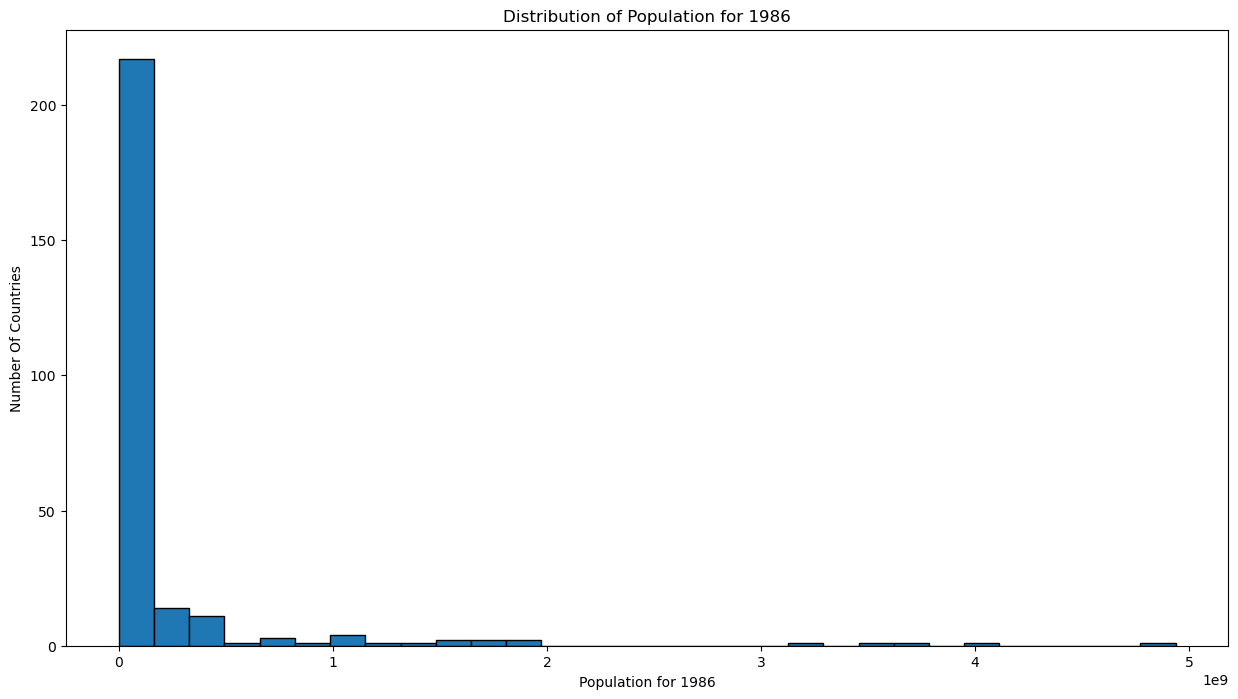

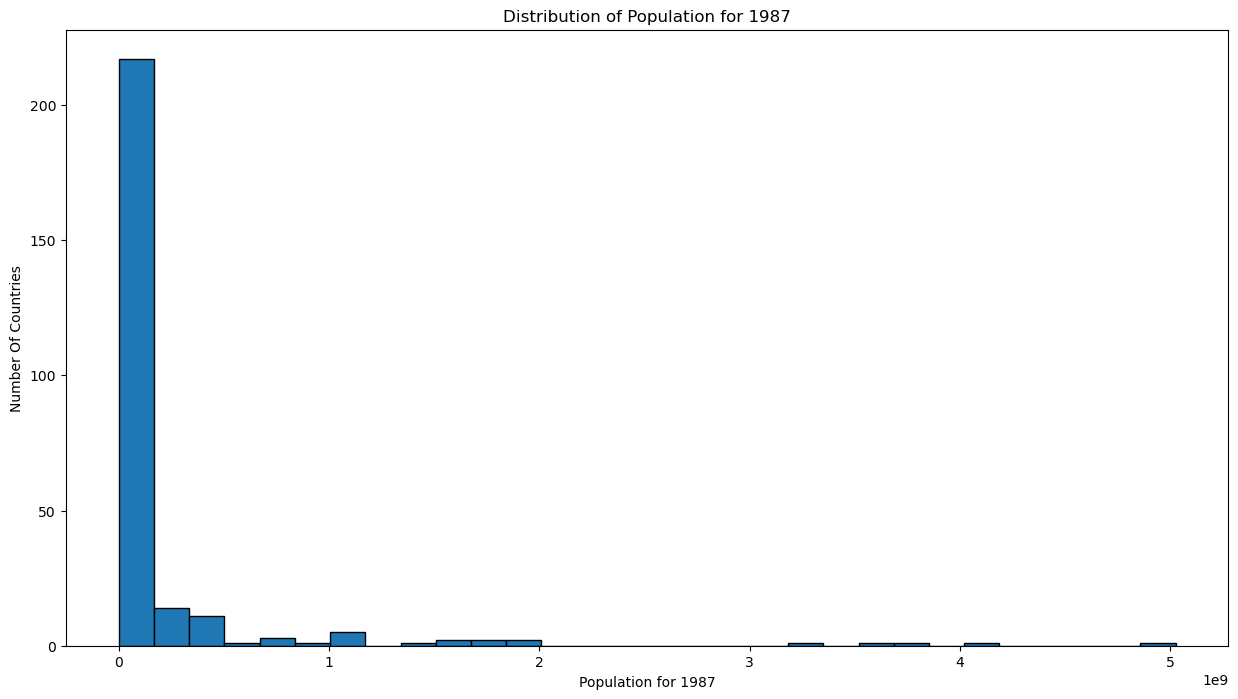

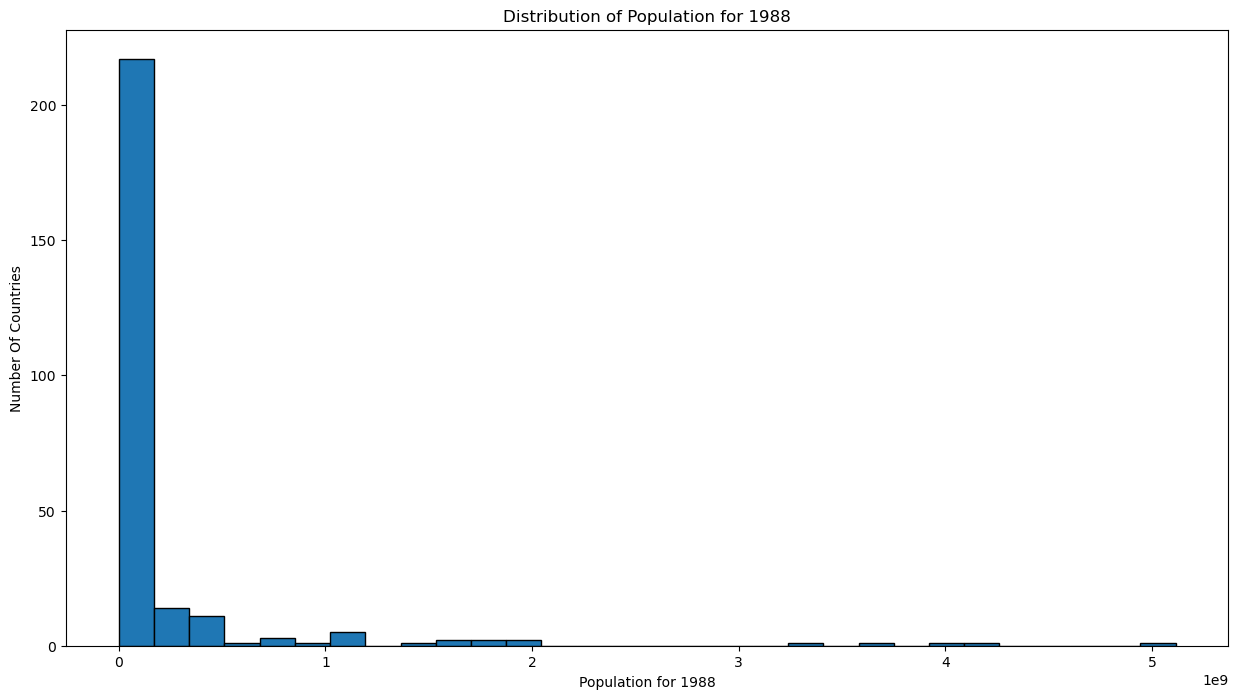

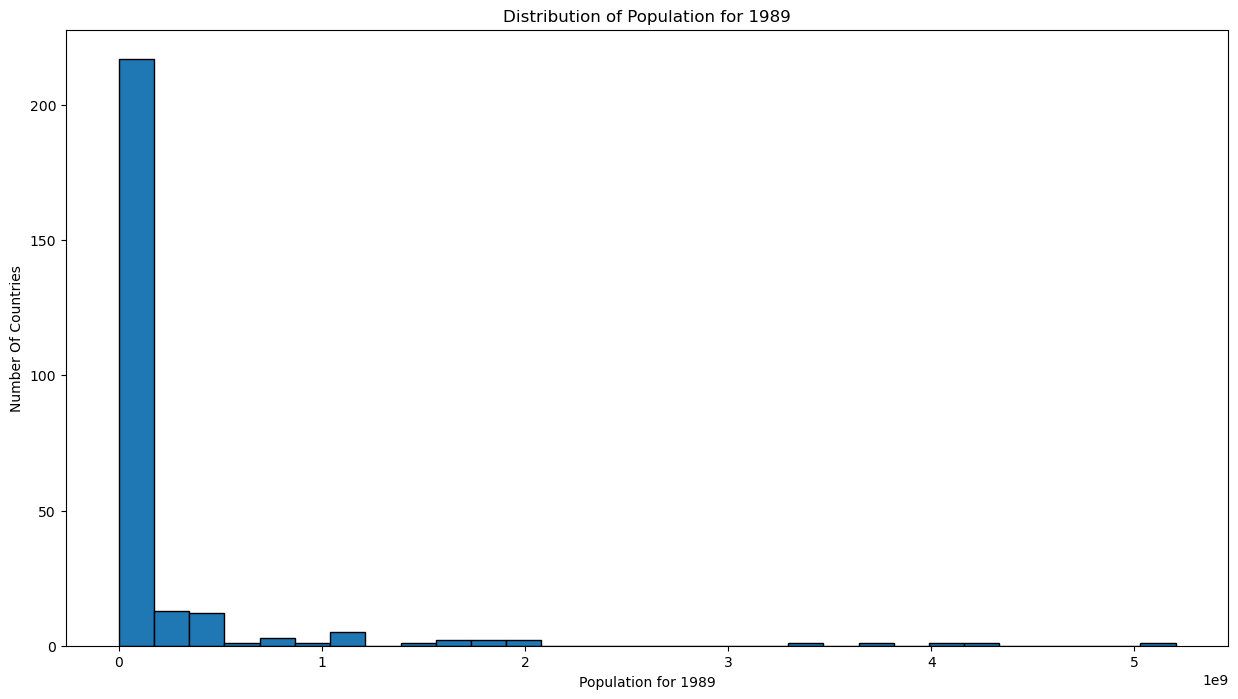

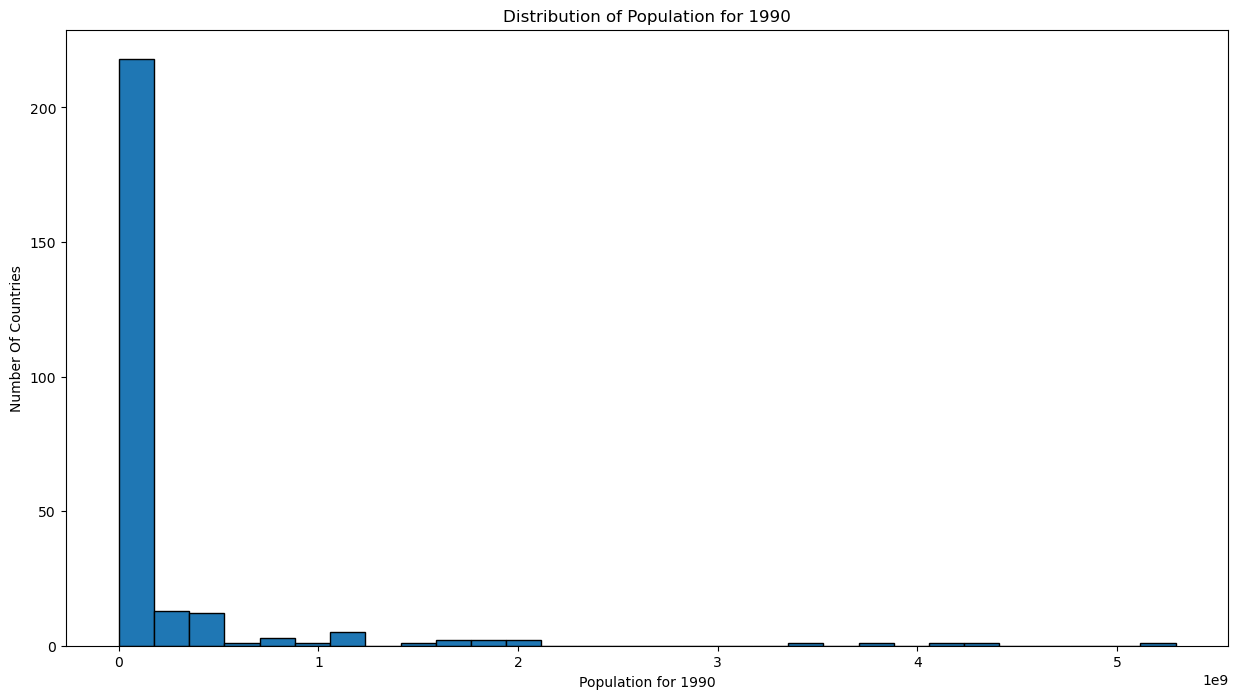

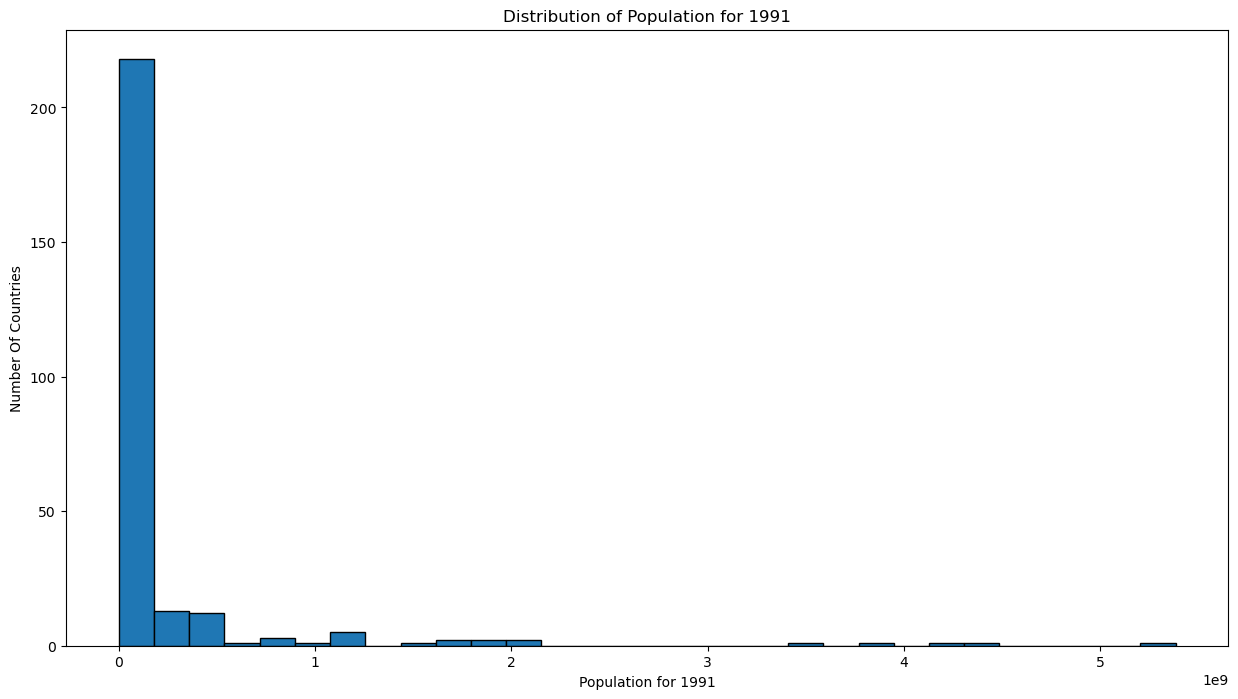

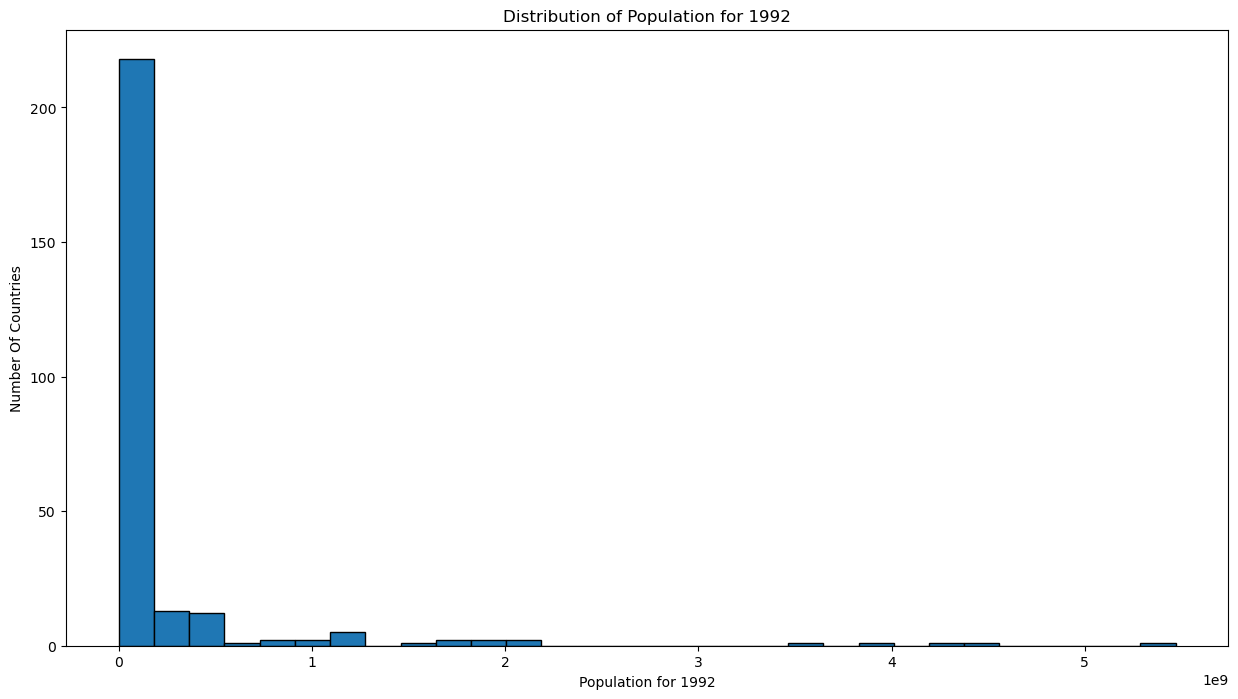

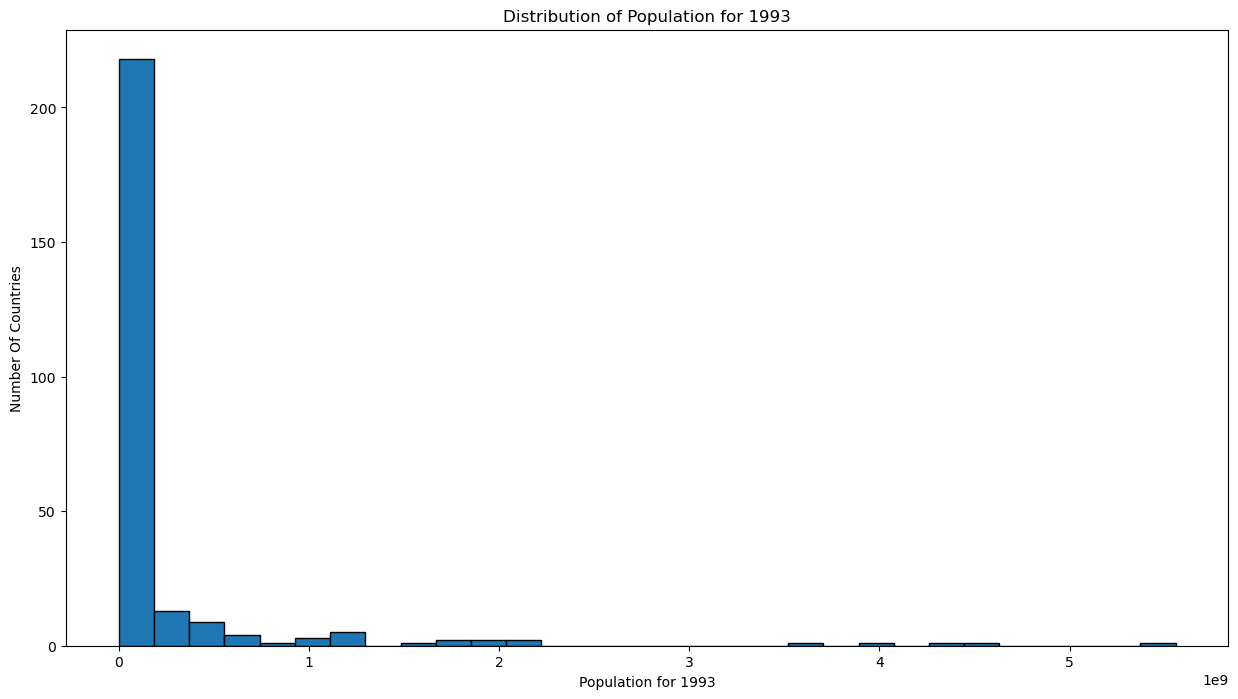

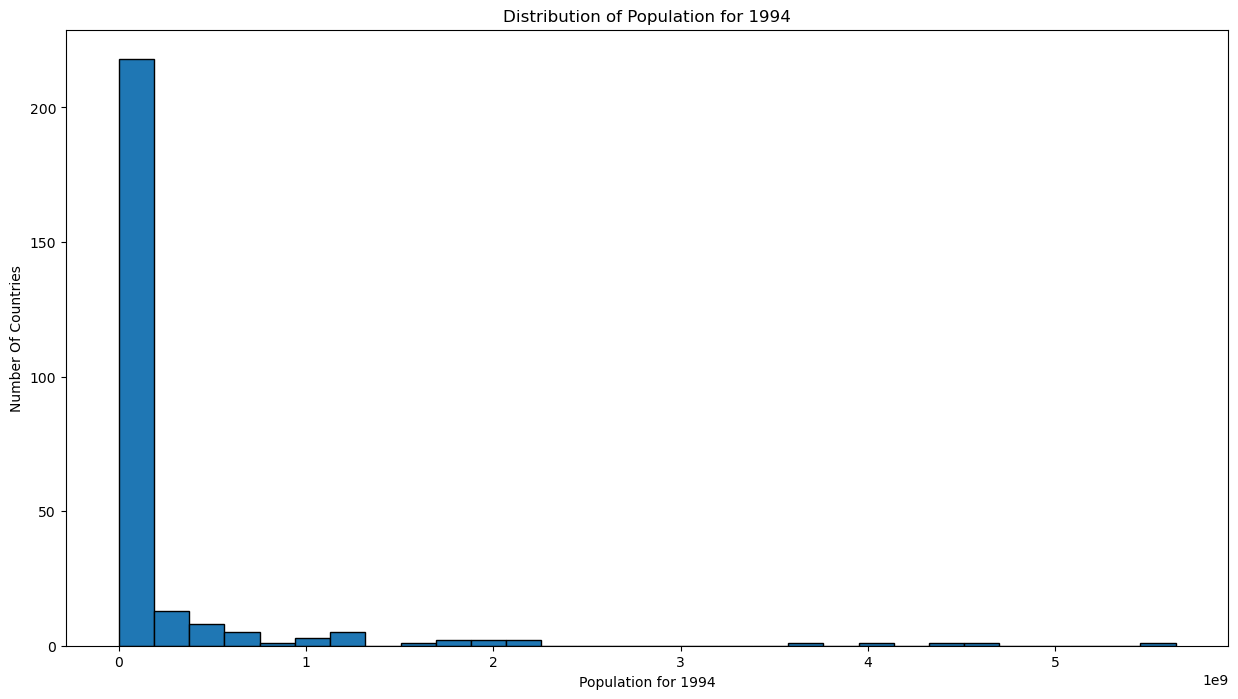

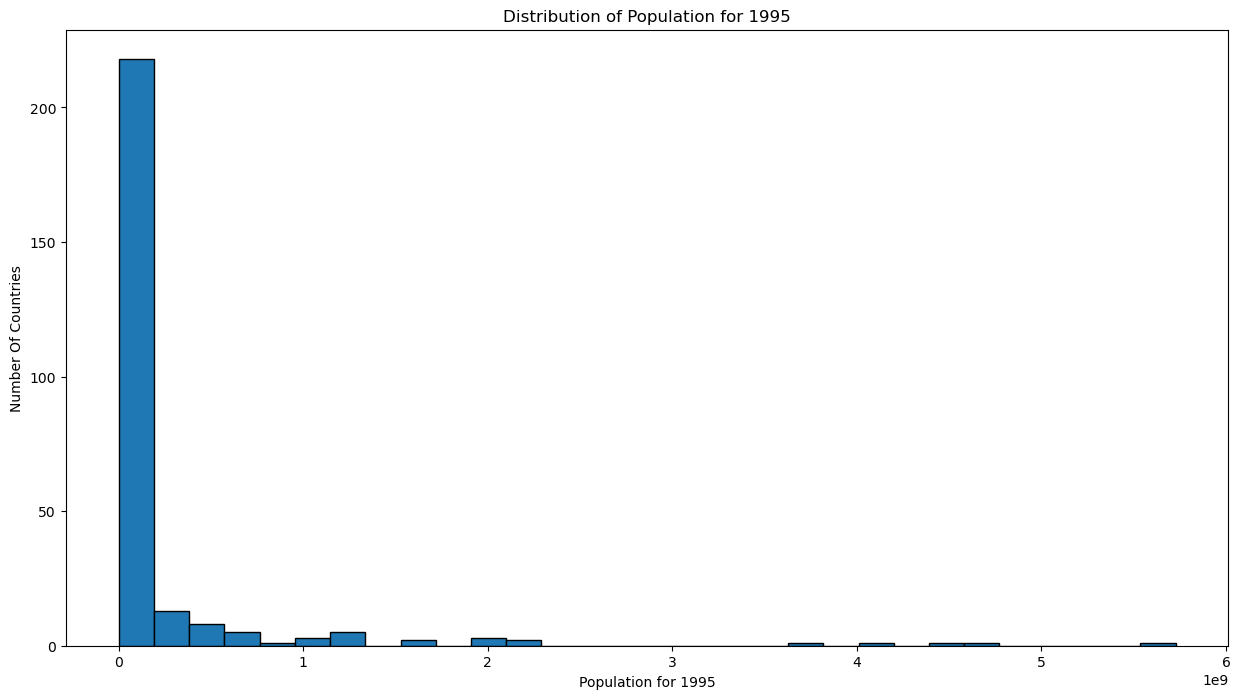

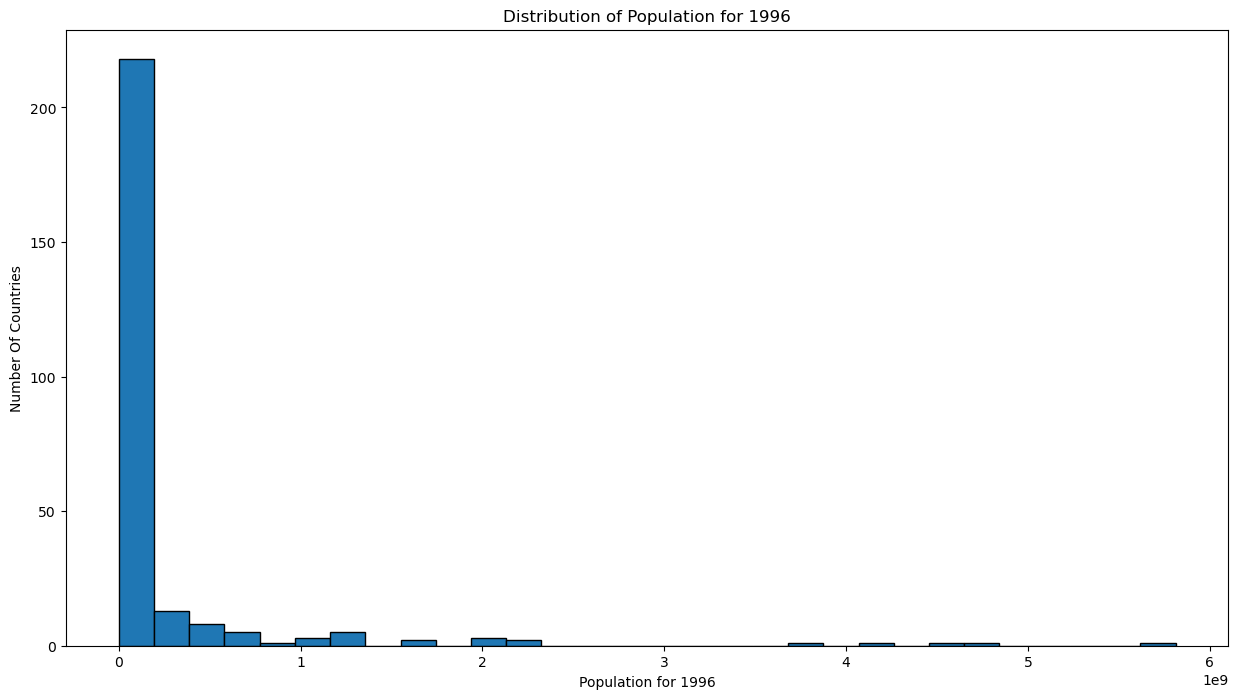

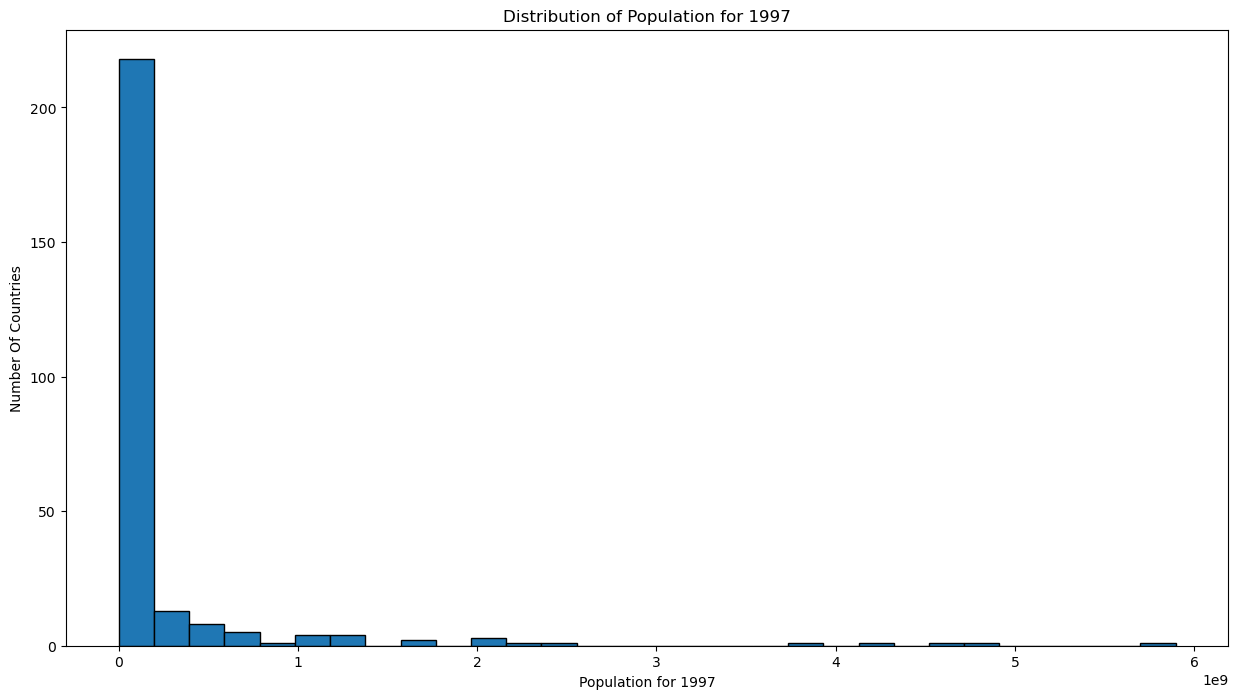

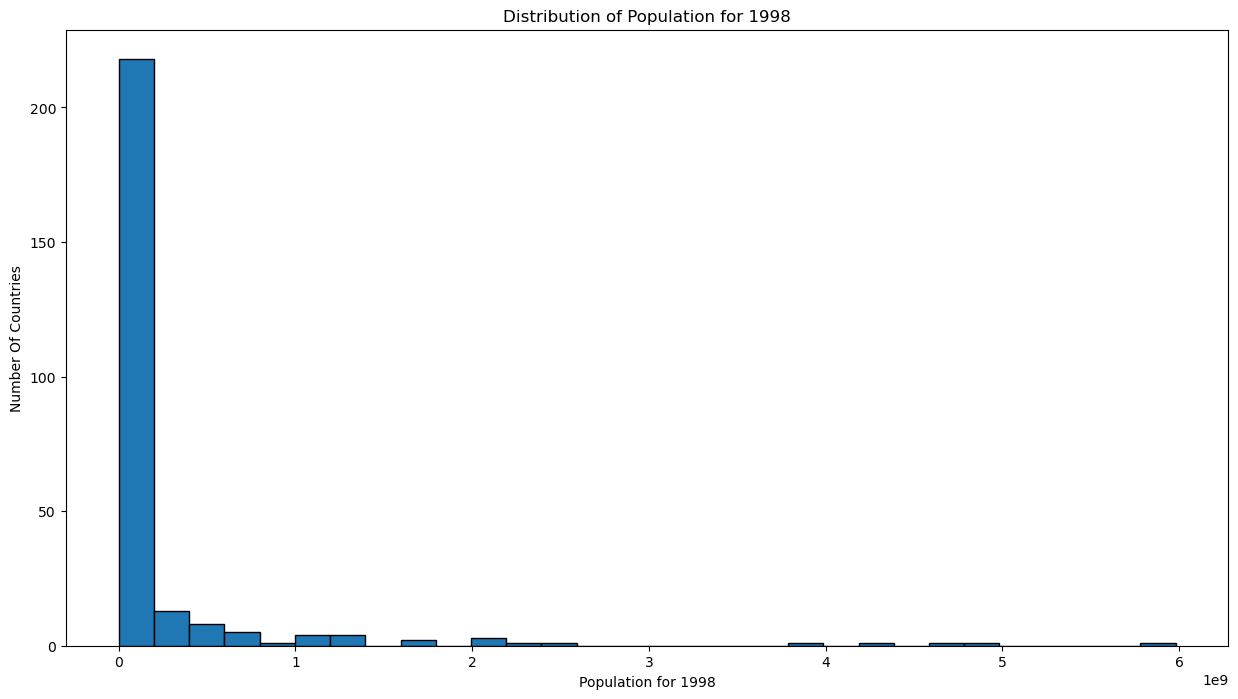

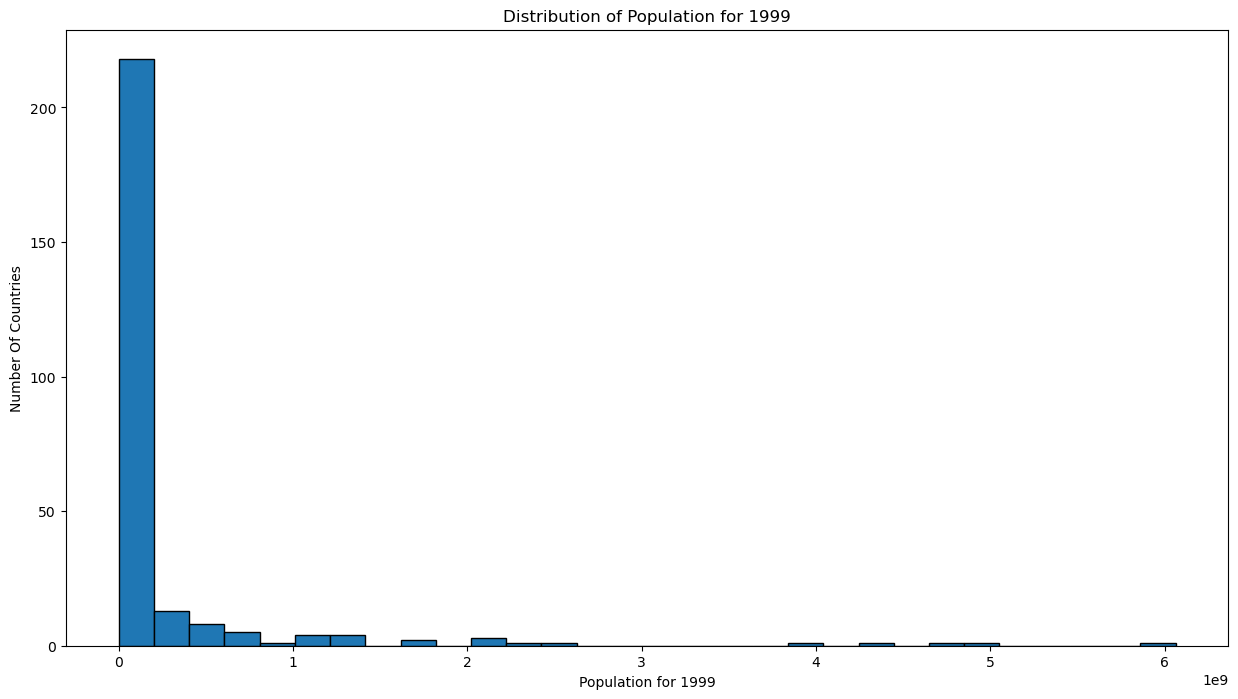

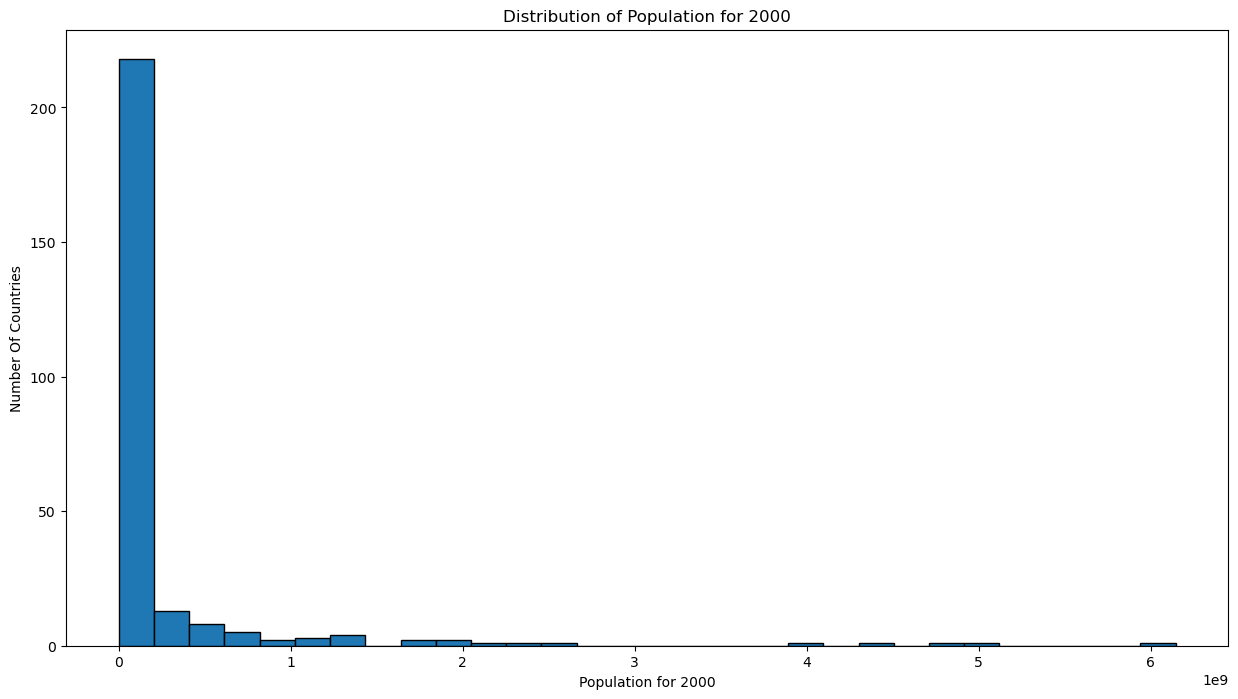

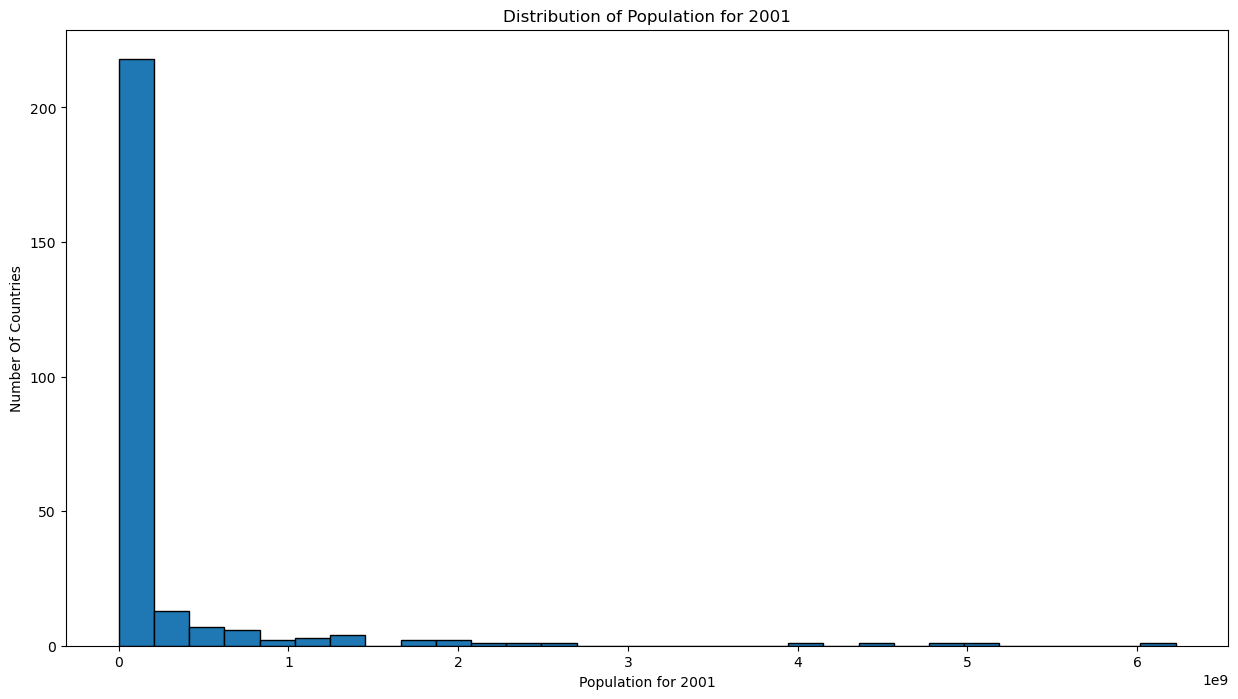

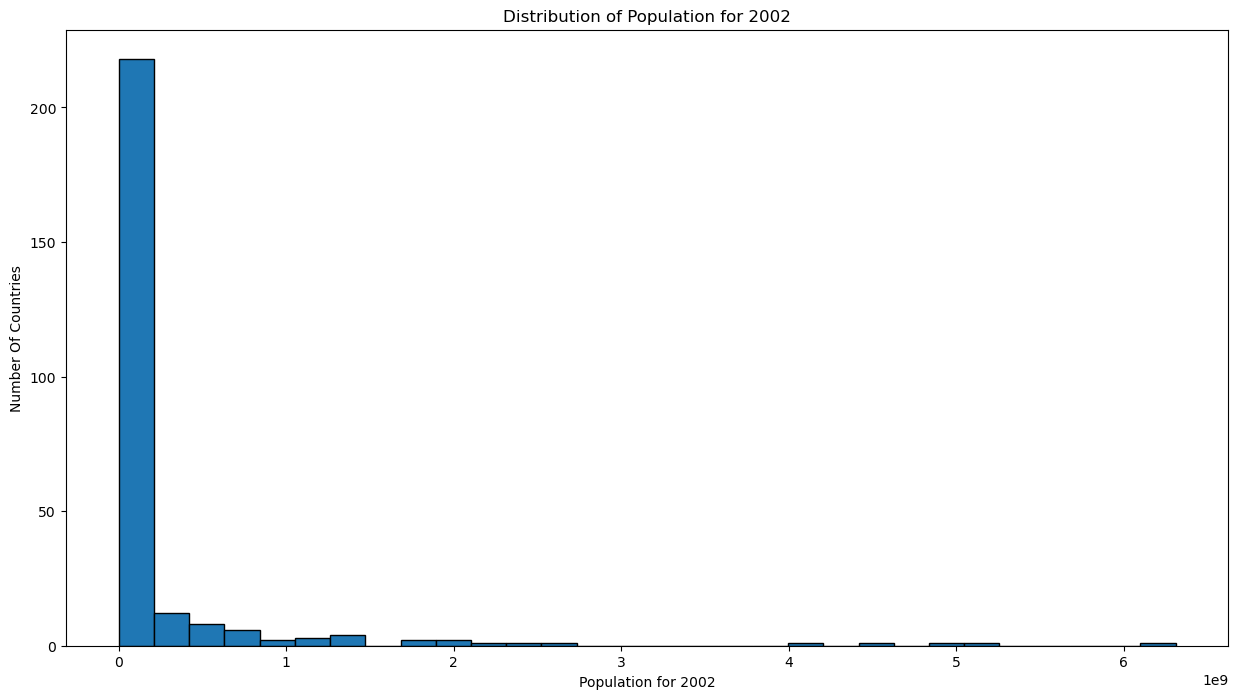

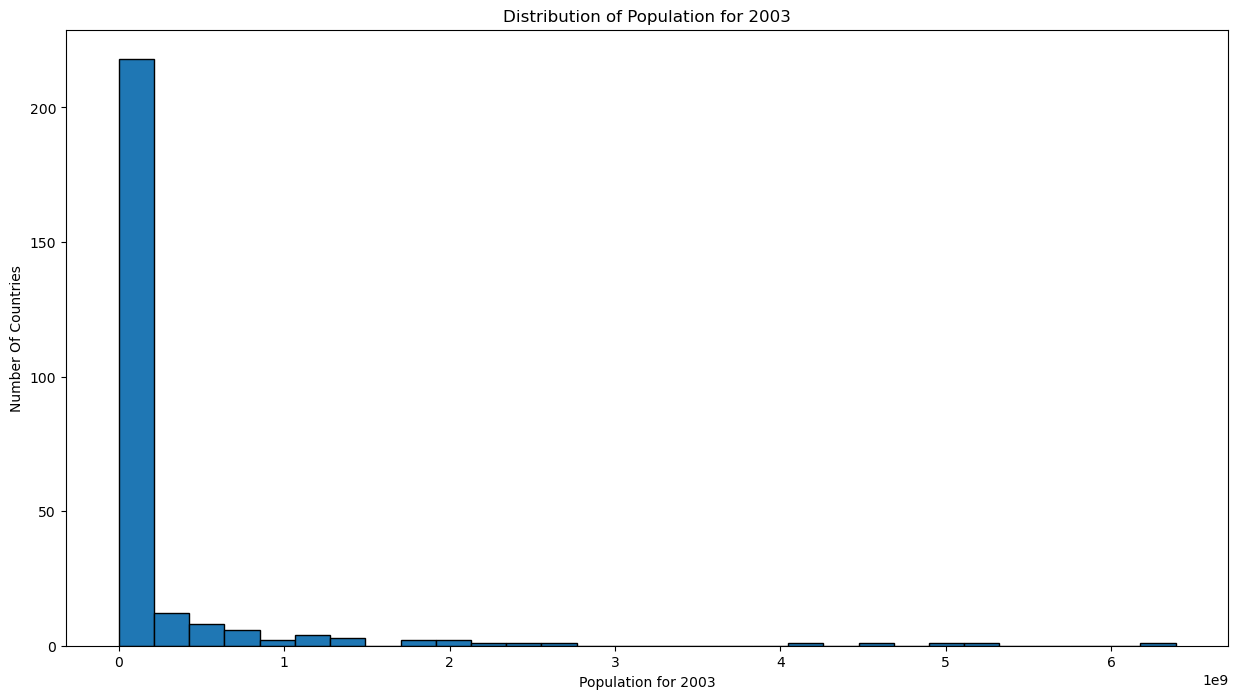

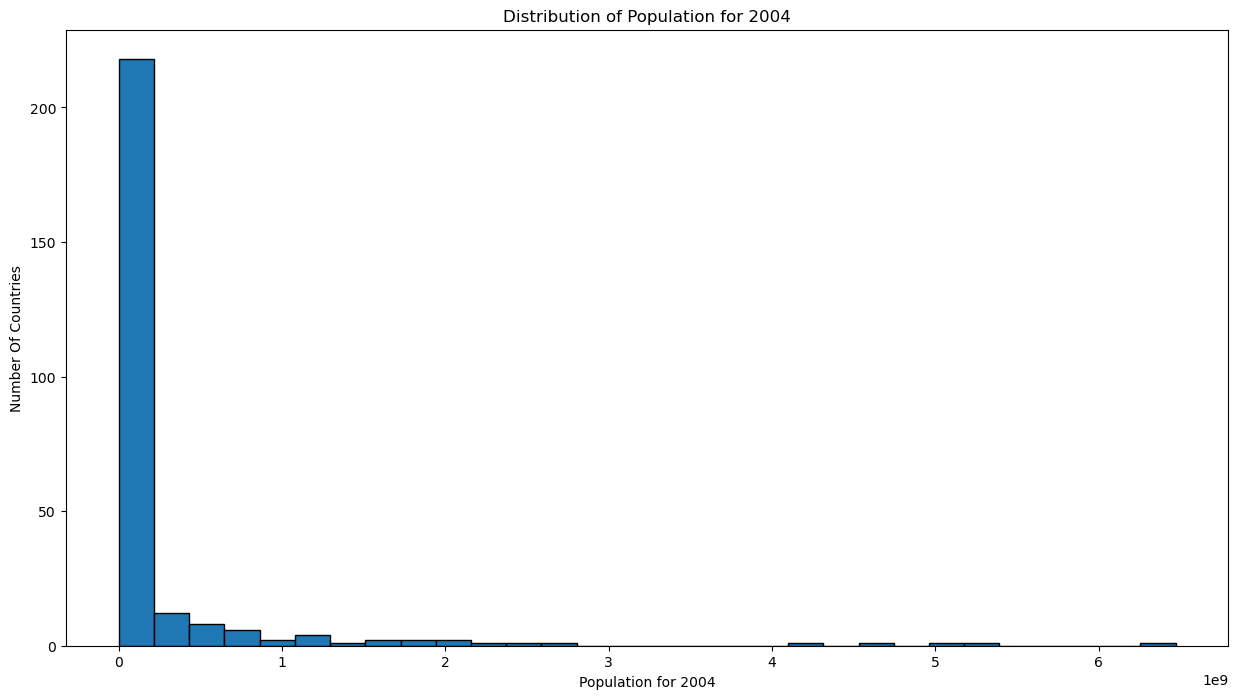

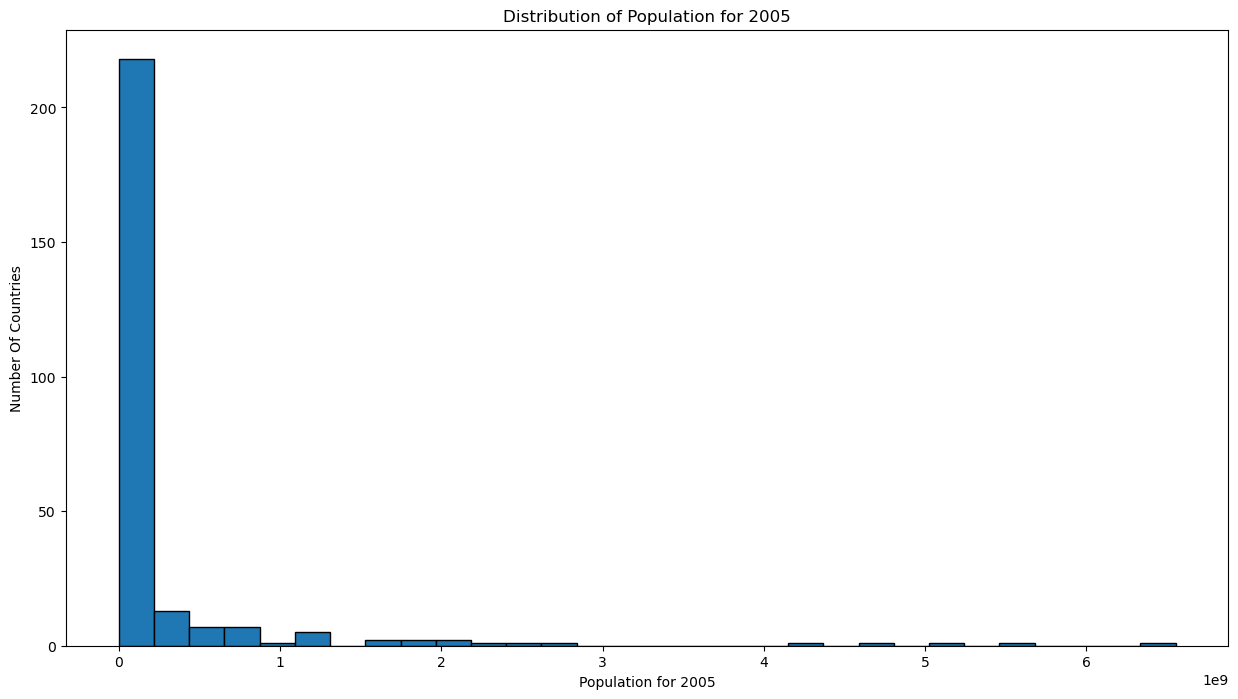

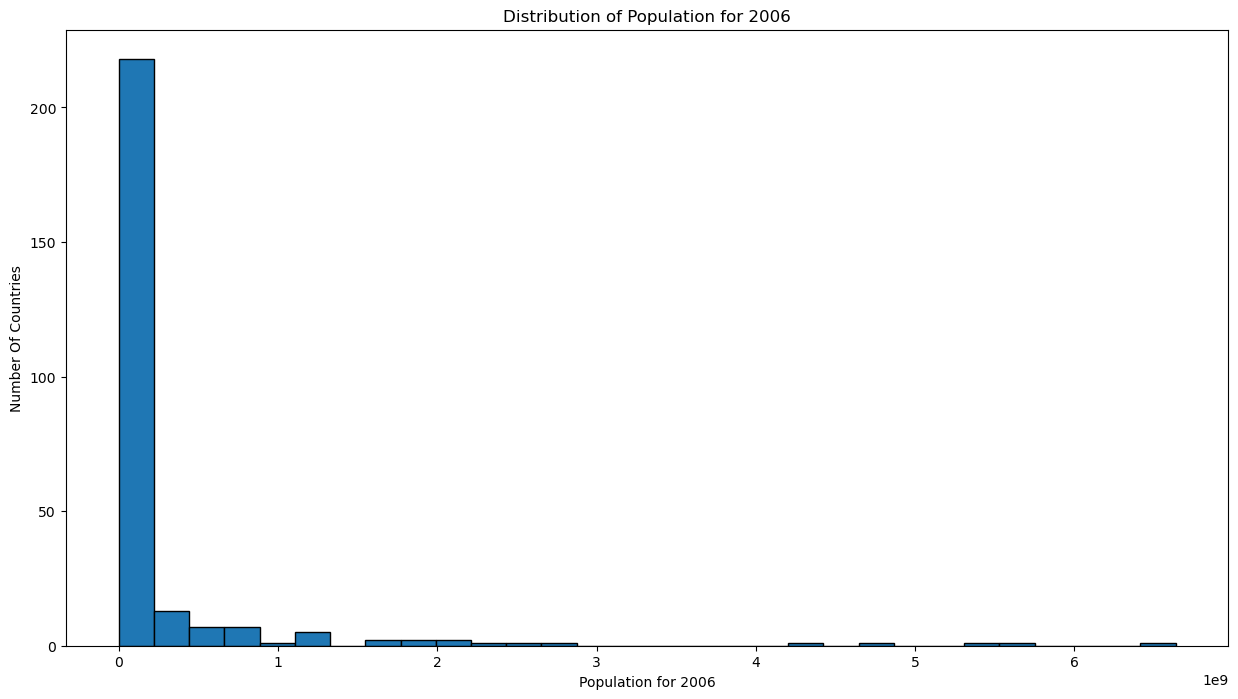

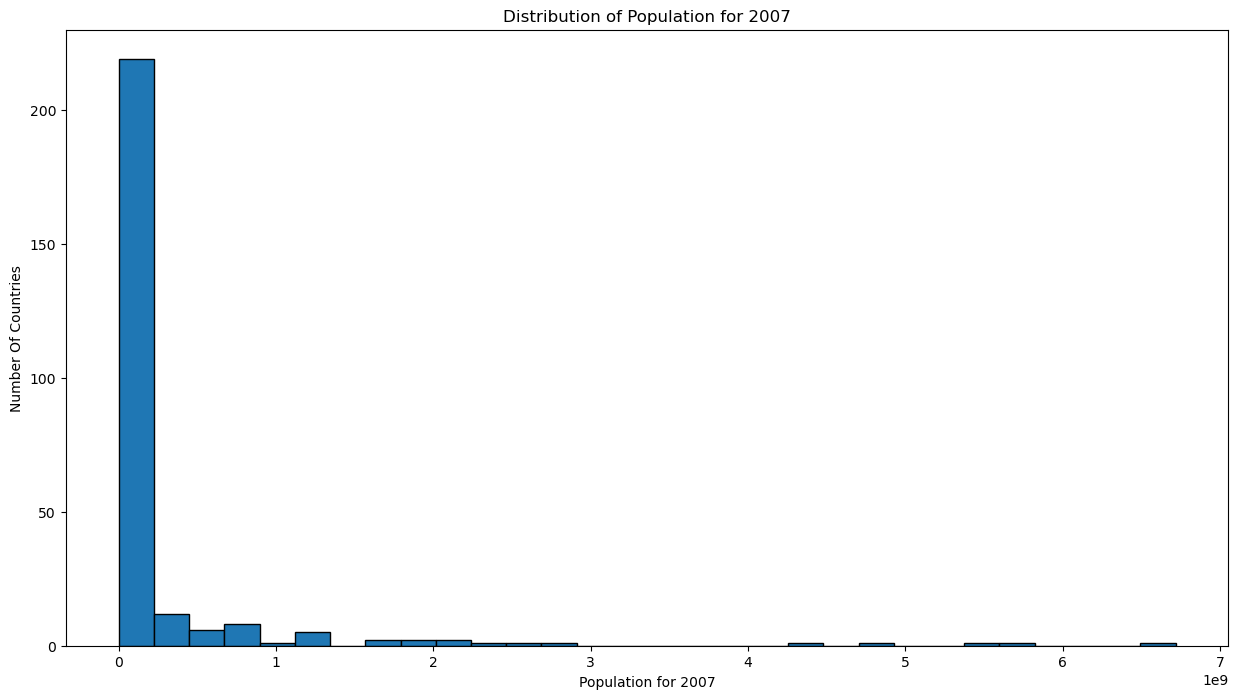

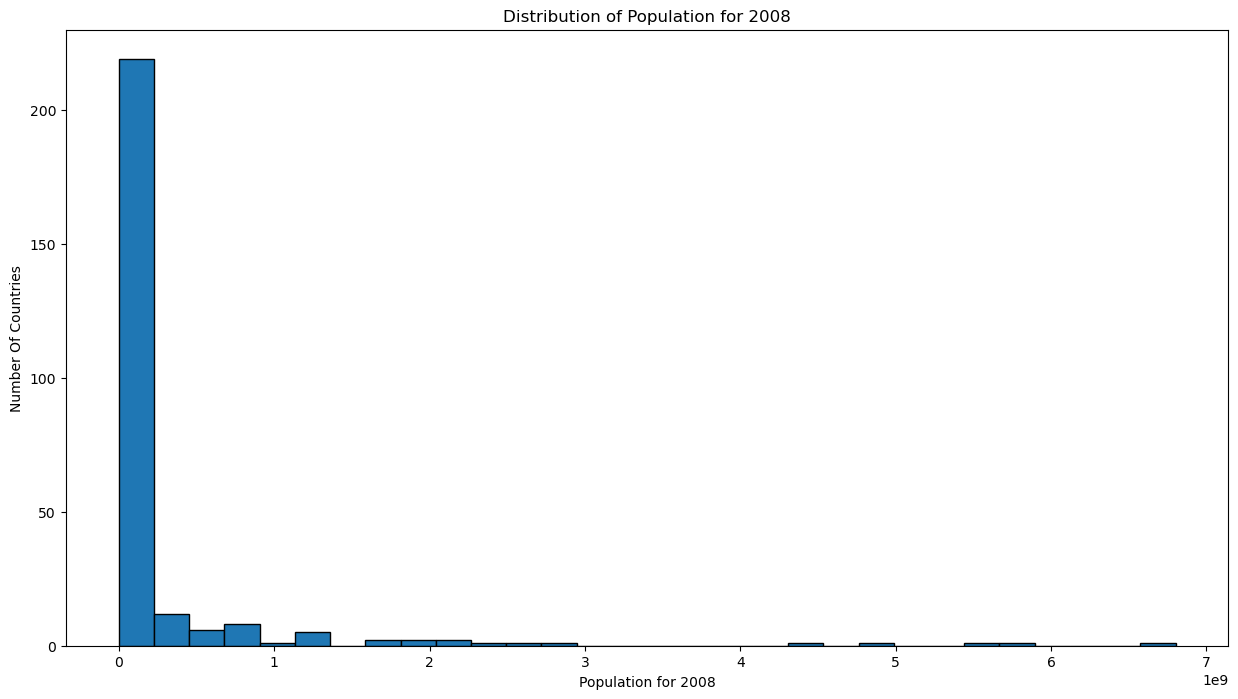

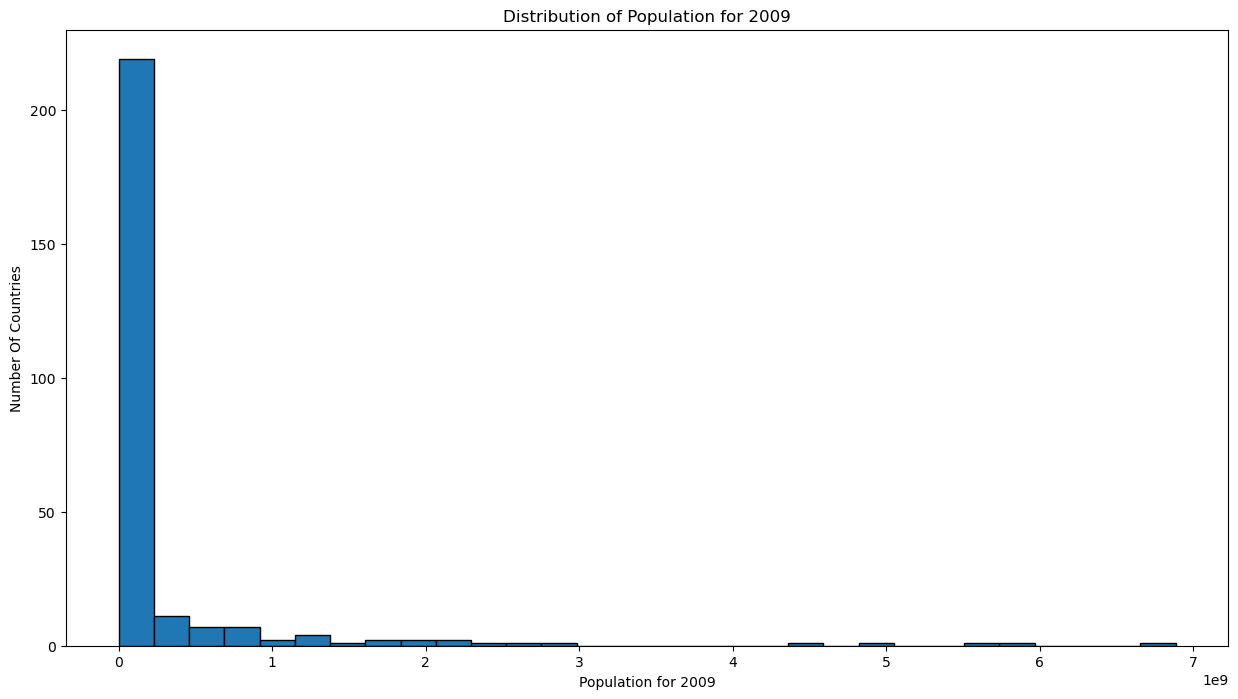

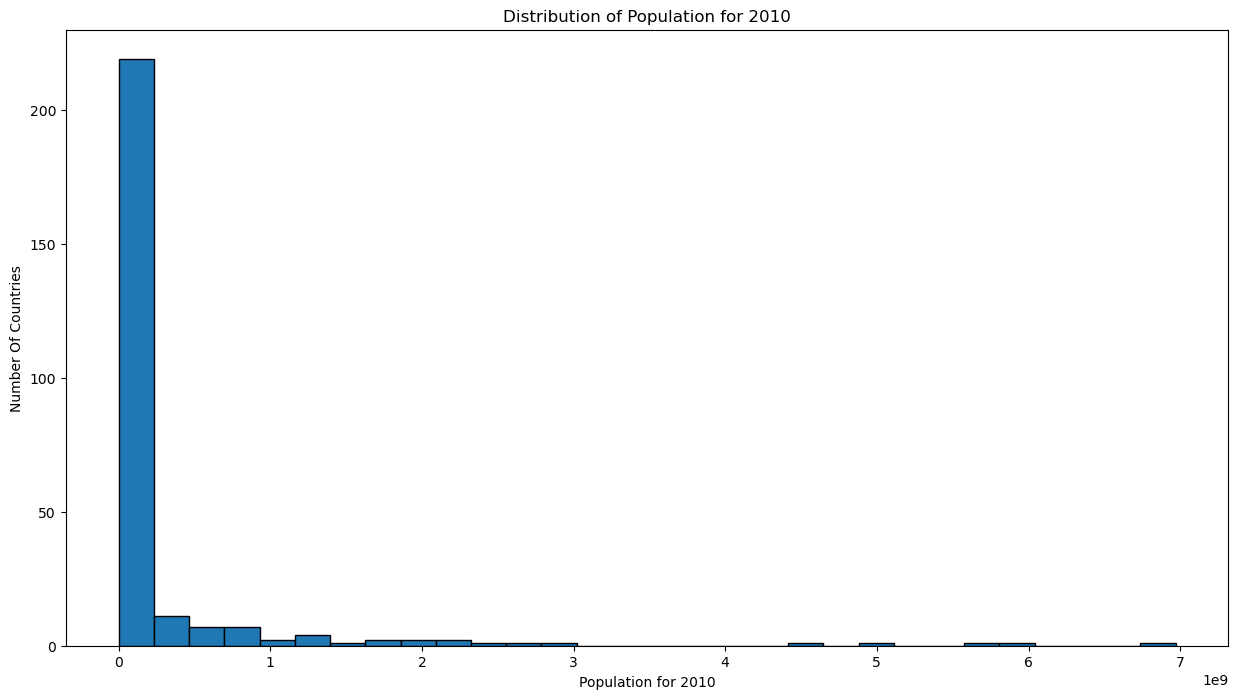

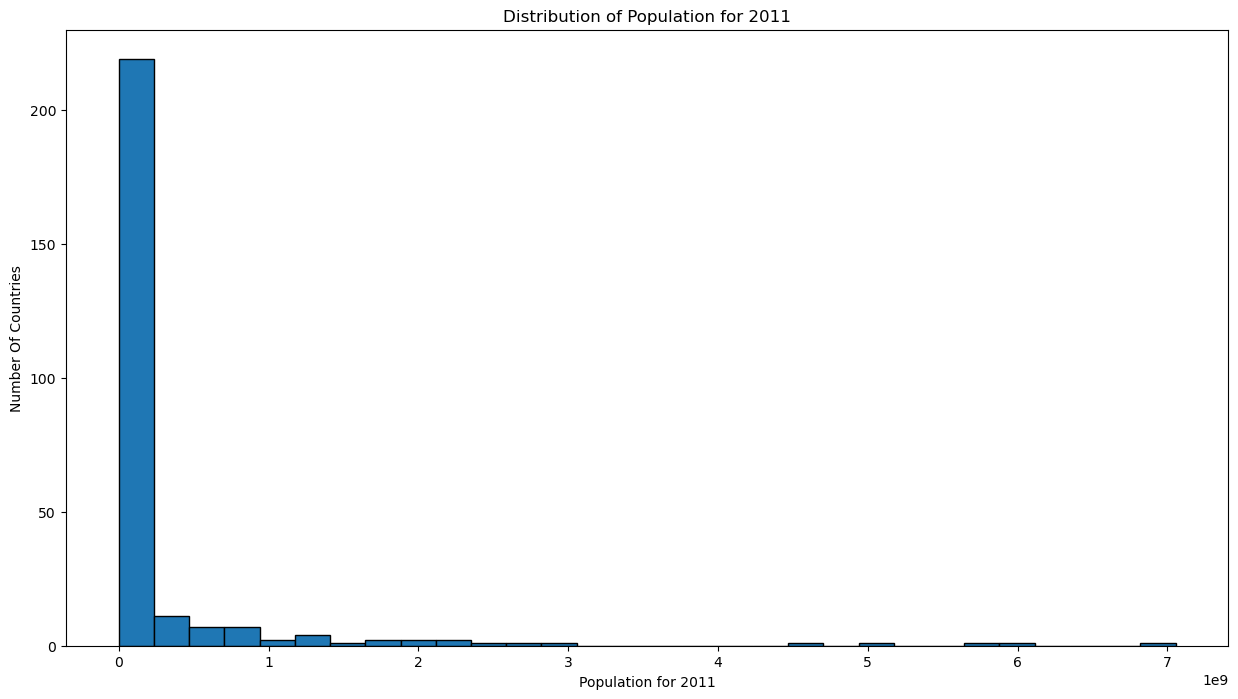

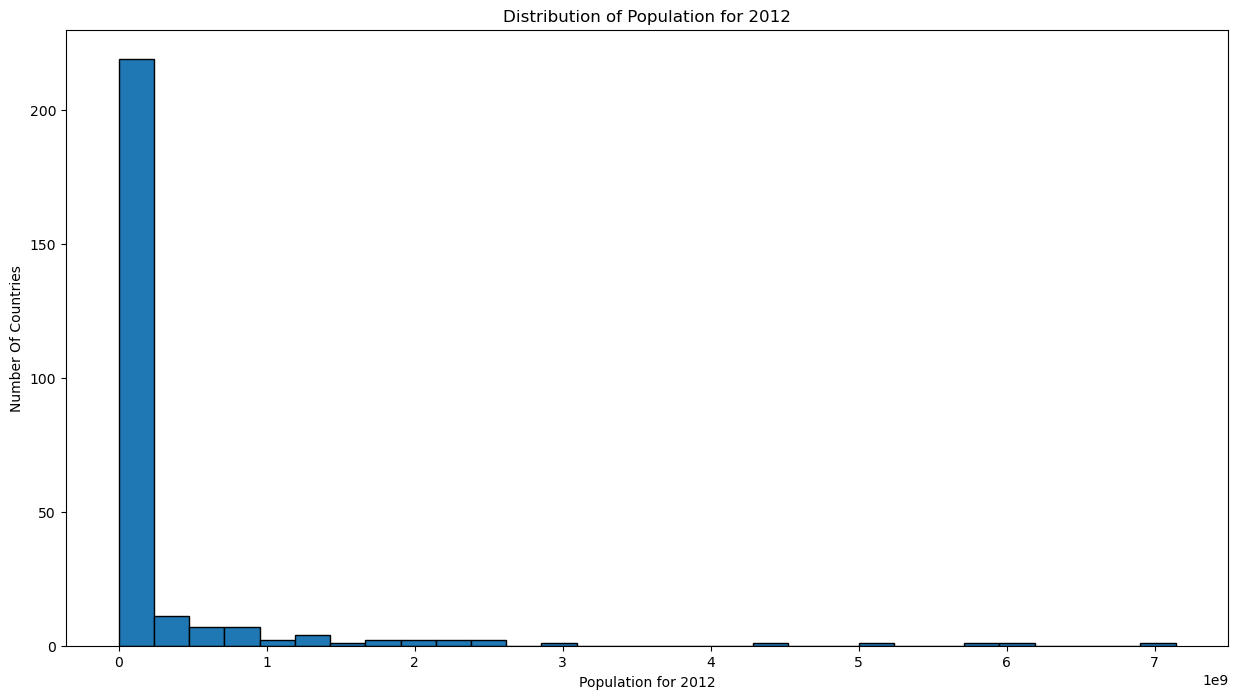

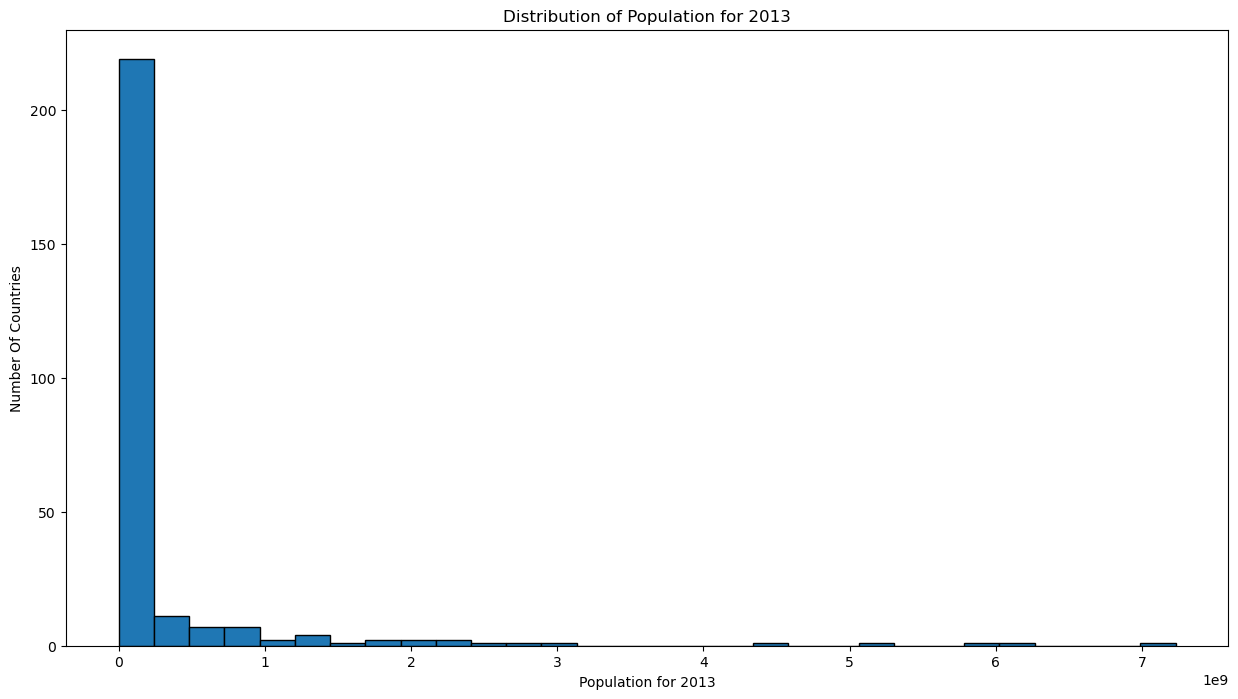

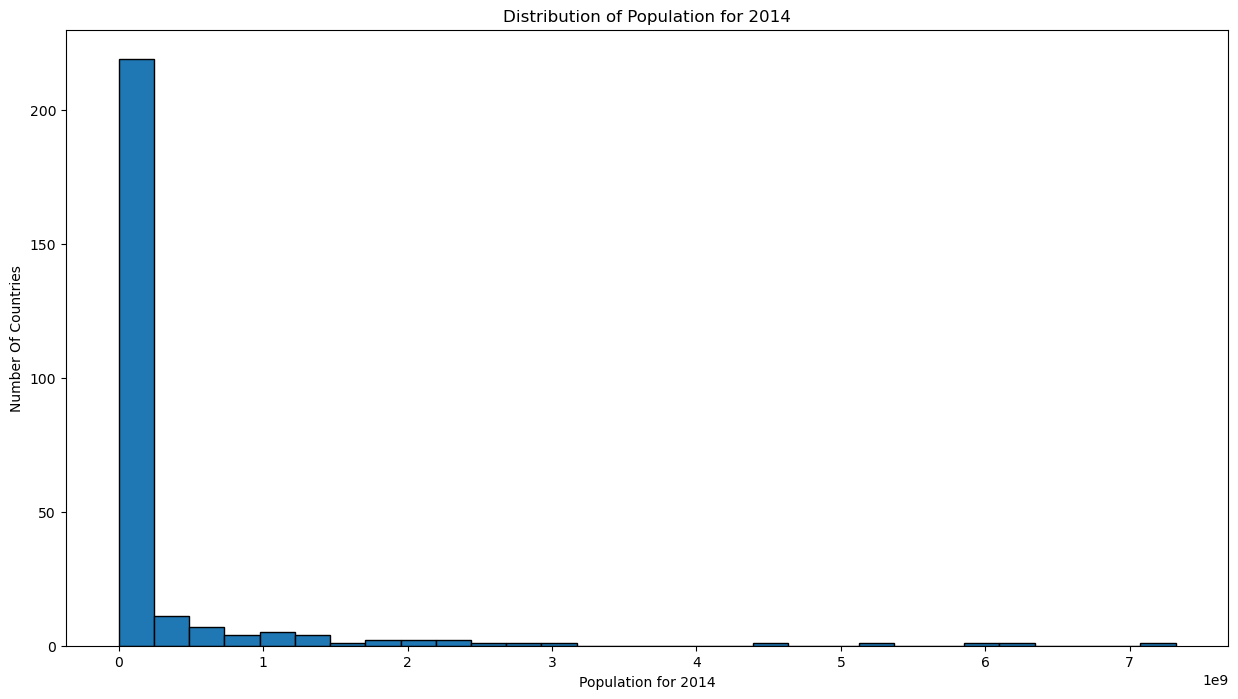

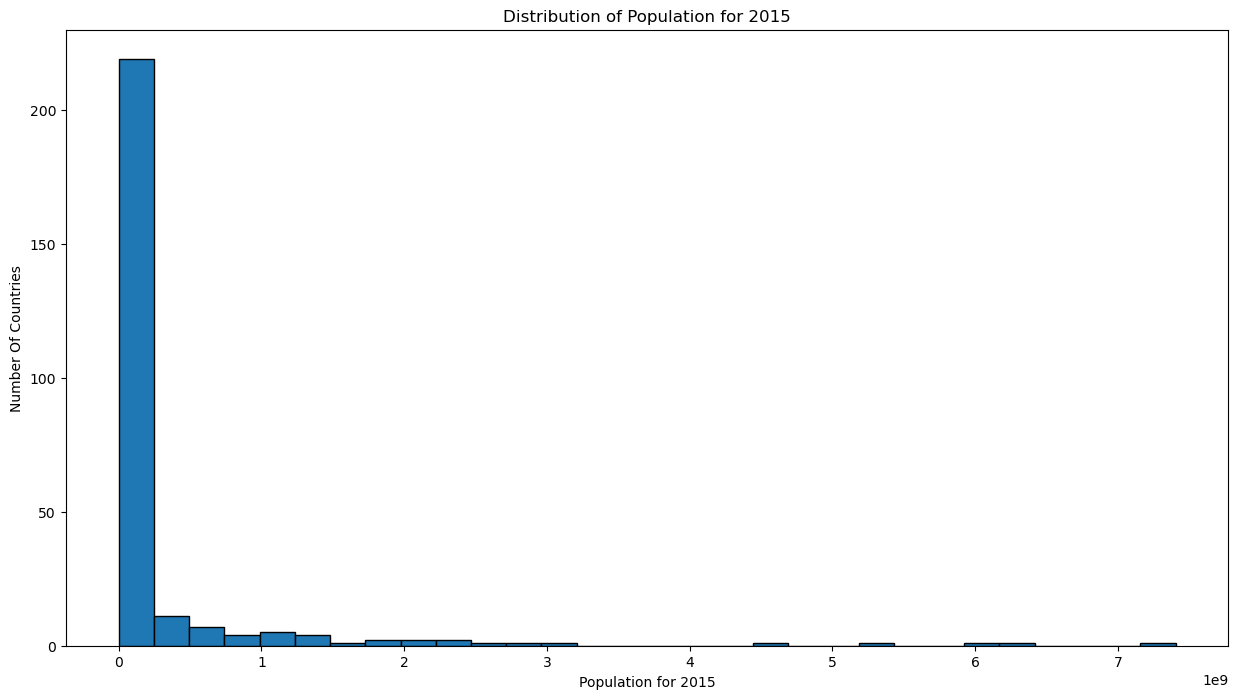

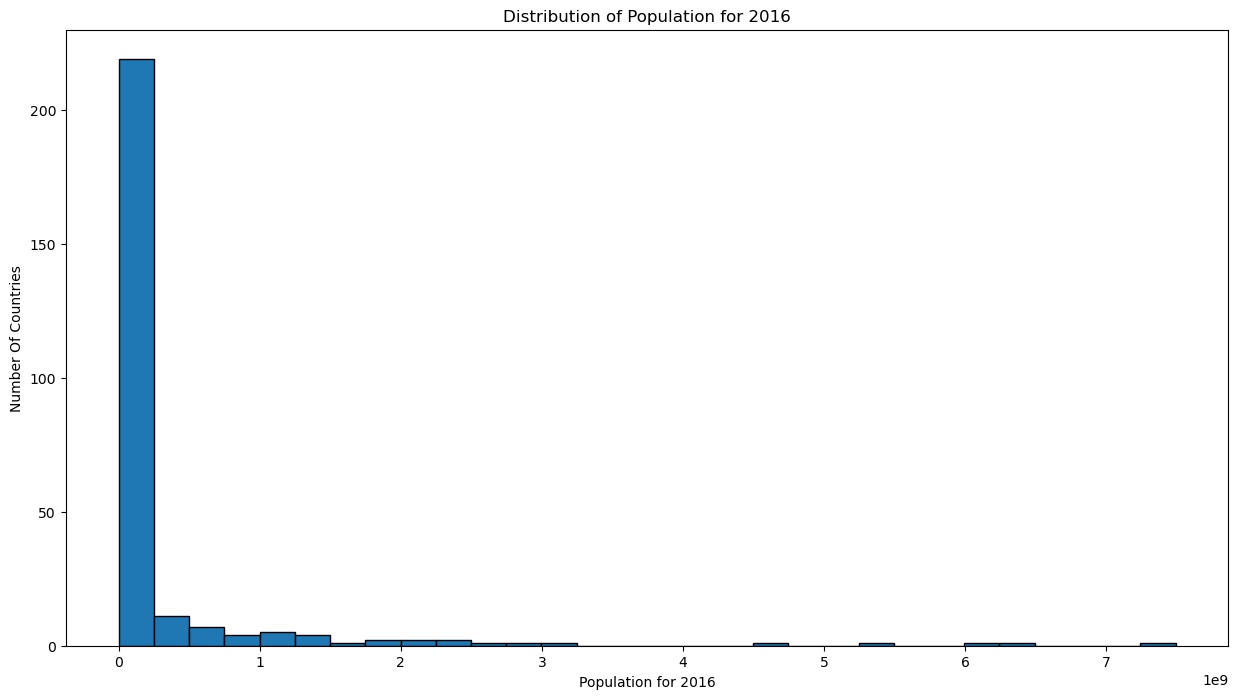

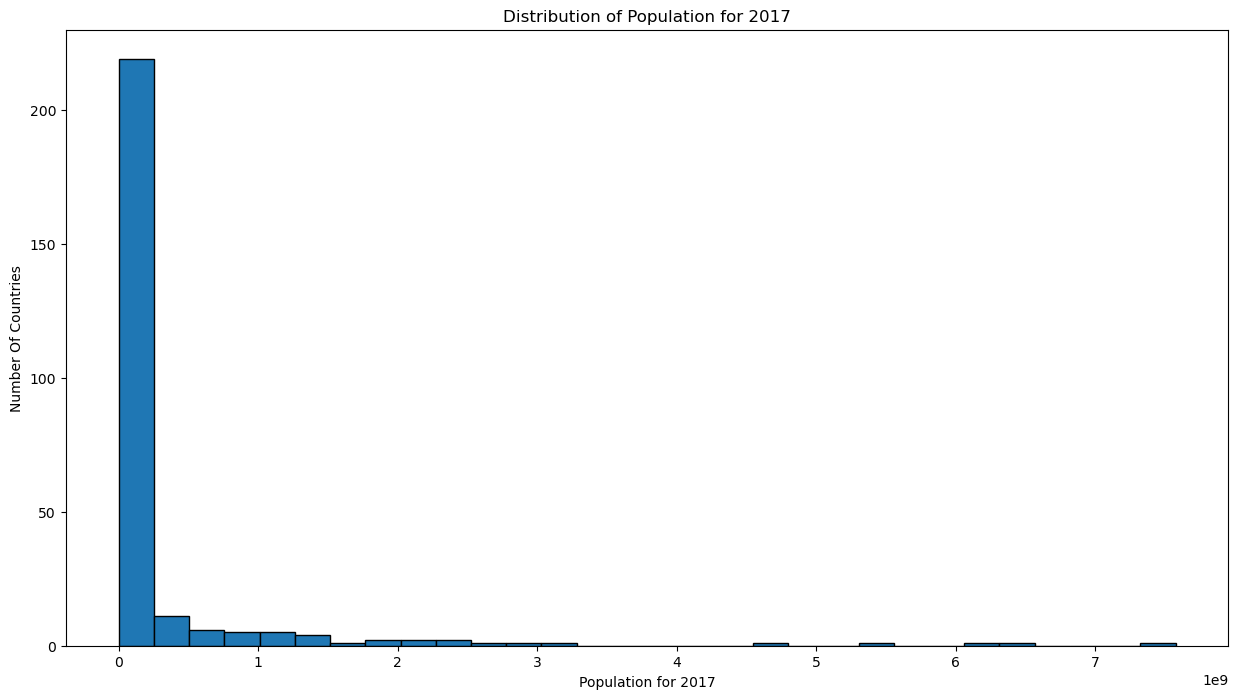

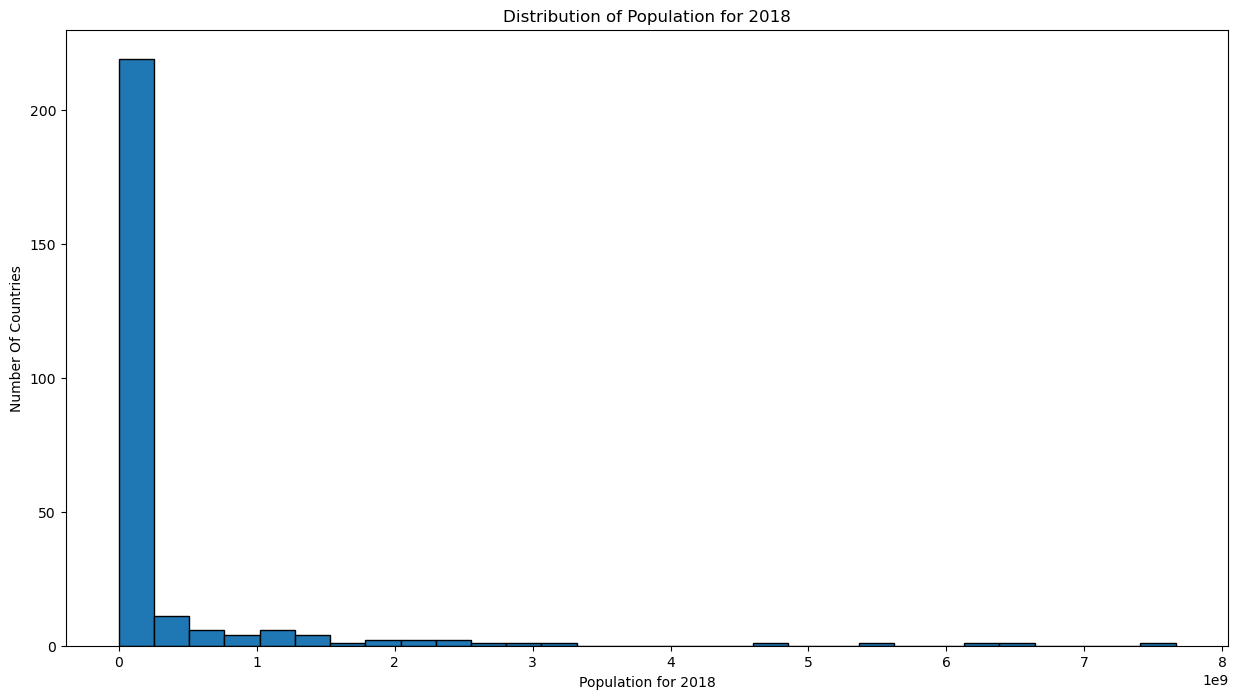

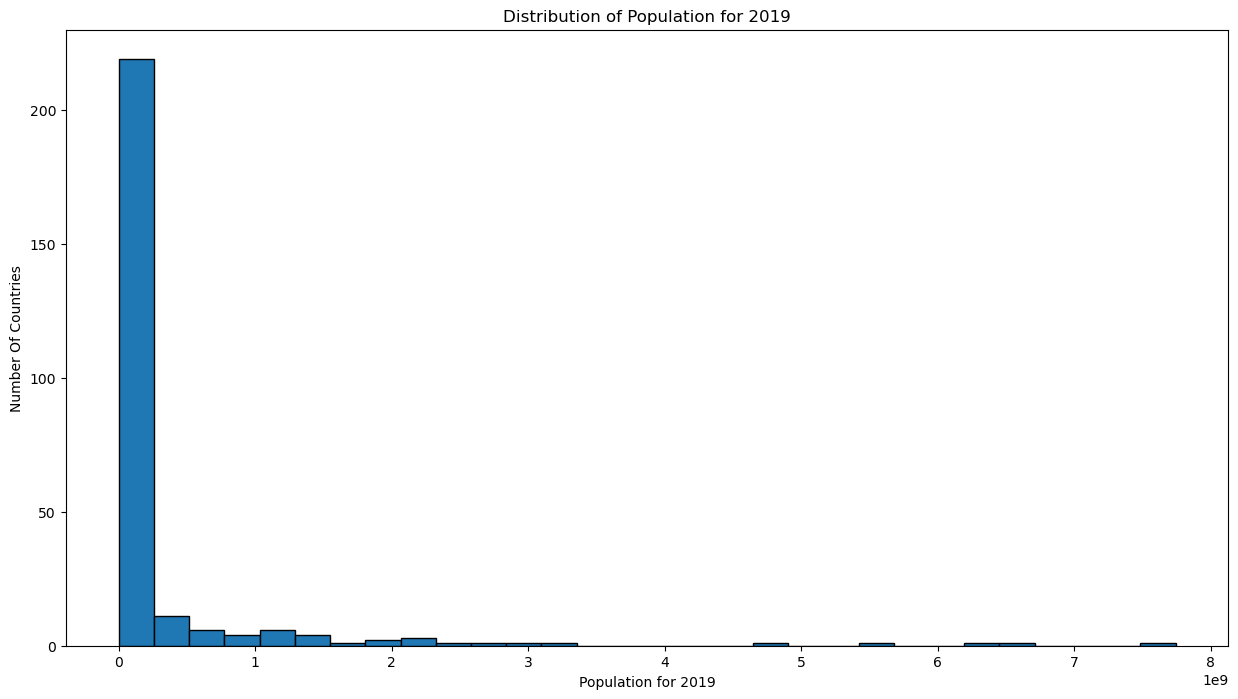

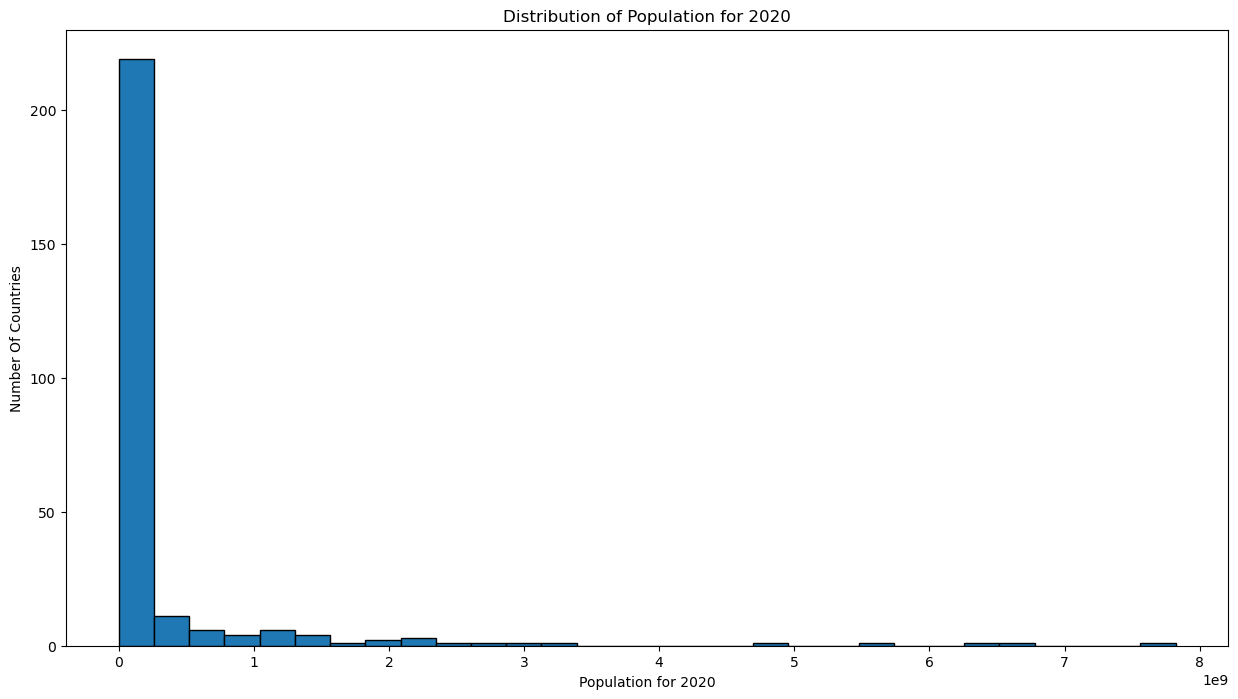

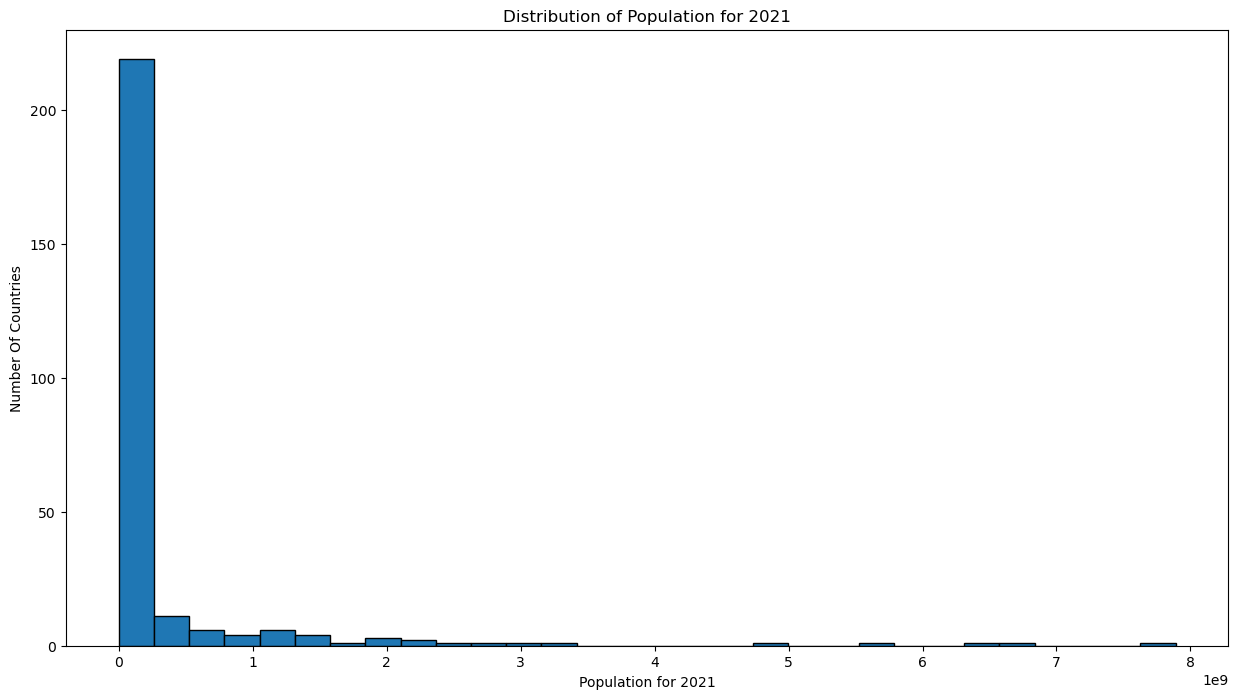

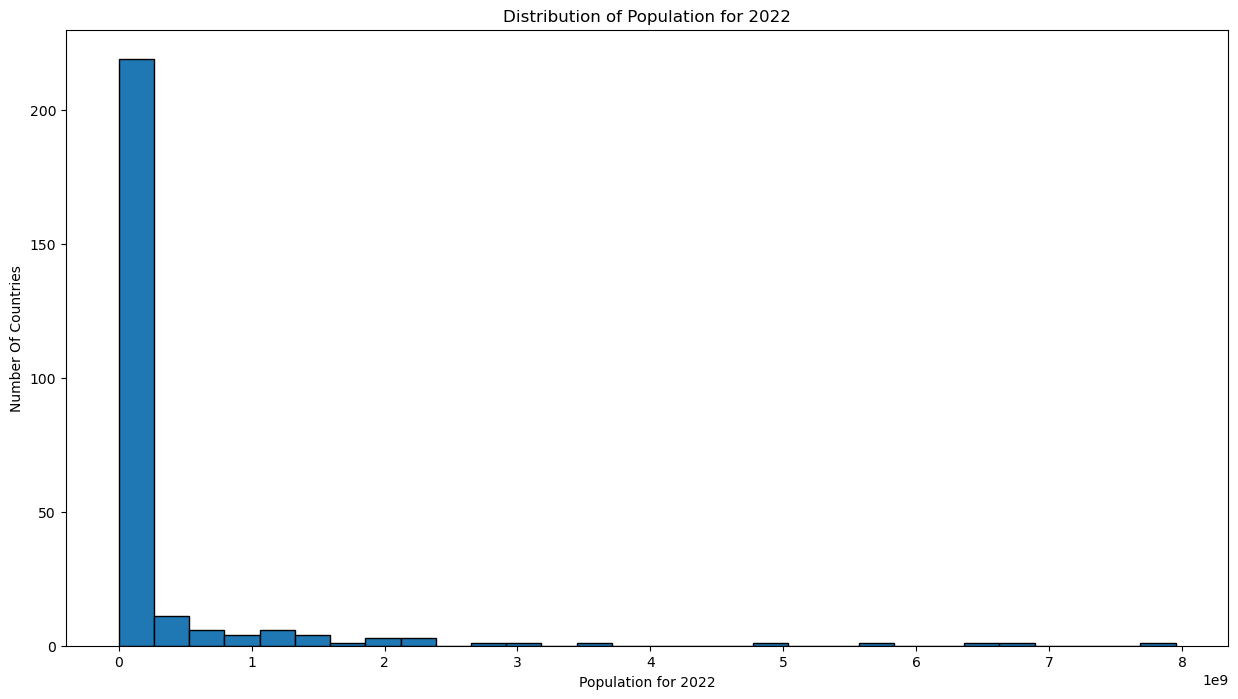

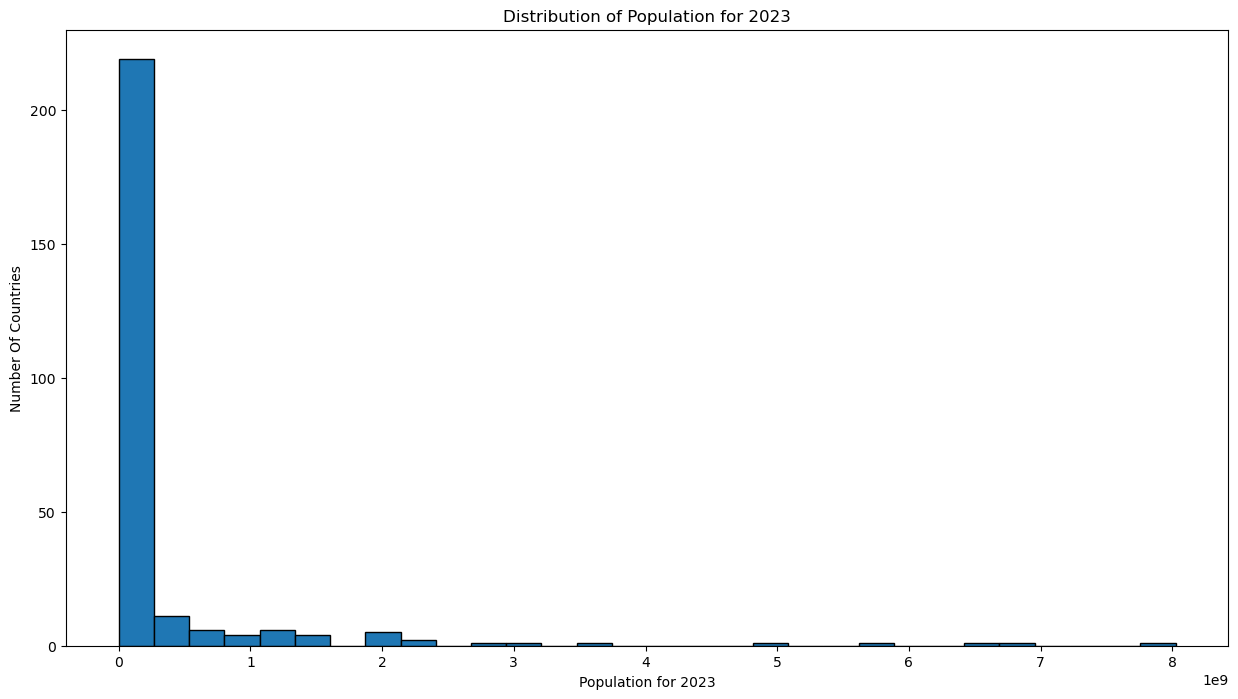

In [77]:
# After the first column, consider the other columns because they are numerical
years = Cleaned_Dataset.columns[1:]  

# Create a histogram for the population distribution in each year 
for year in years:
    plt.figure(figsize=(15, 8))
    plt.hist(Cleaned_Dataset[year], bins=30, edgecolor='black')
    plt.xlabel(f'Population for {year}')
    plt.ylabel('Number Of Countries')
    plt.title(f'Distribution of Population for {year}')
    plt.show()


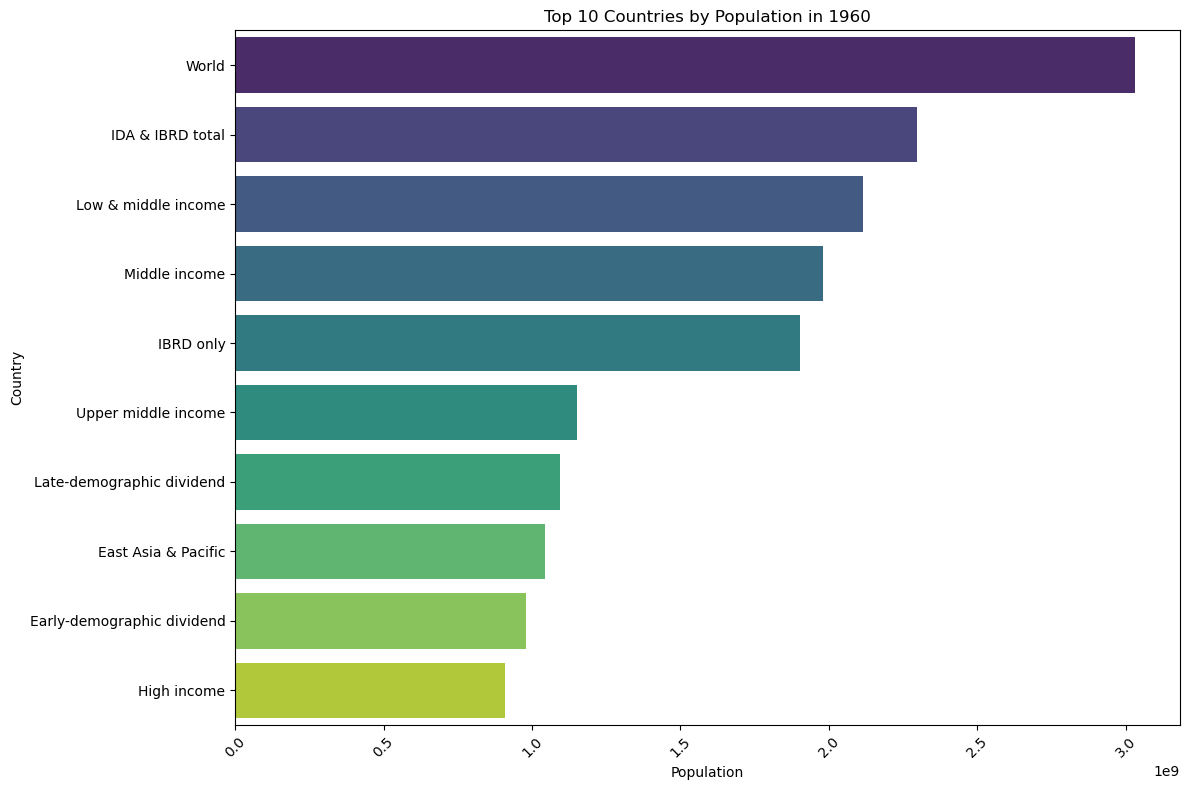

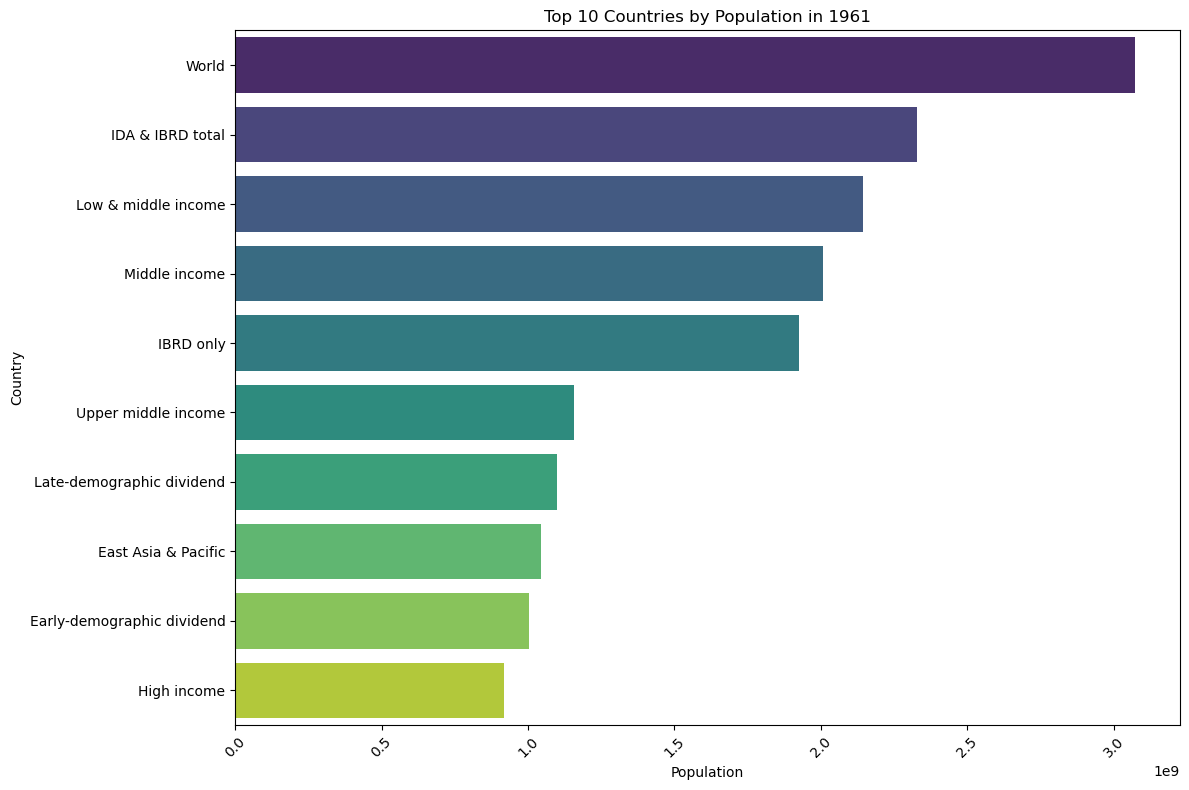

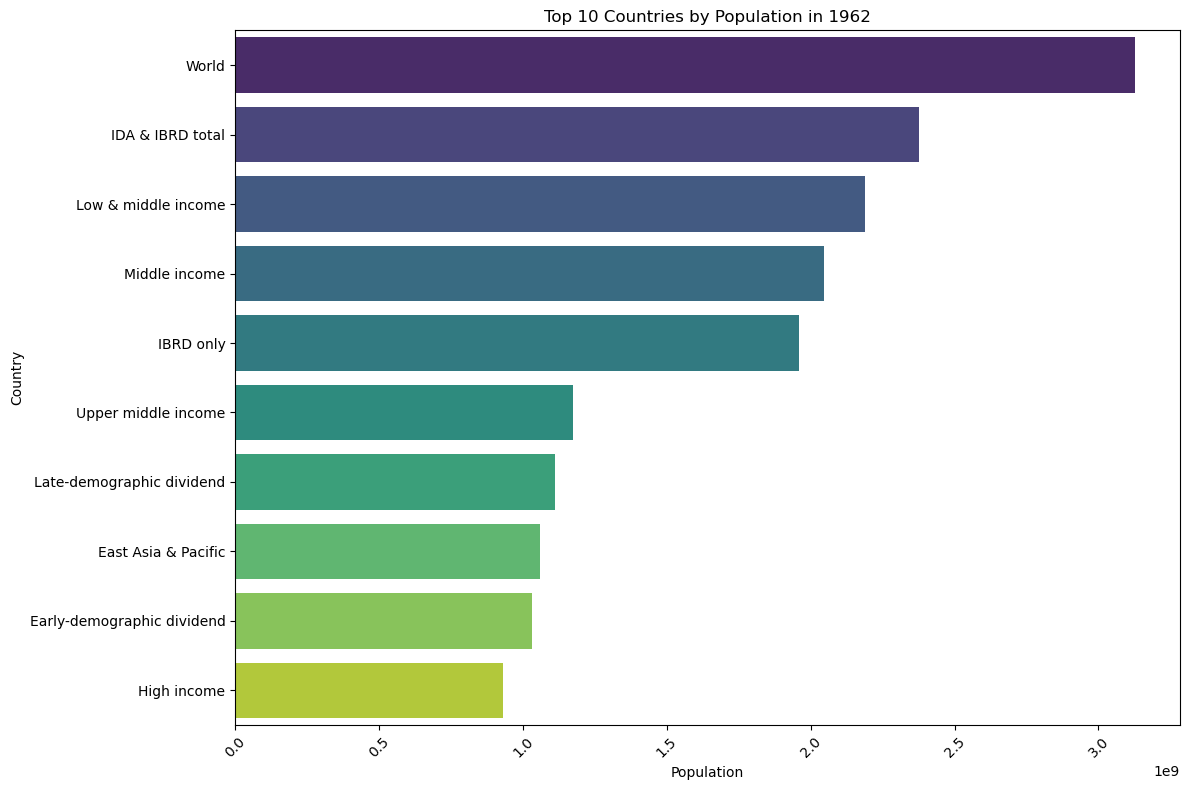

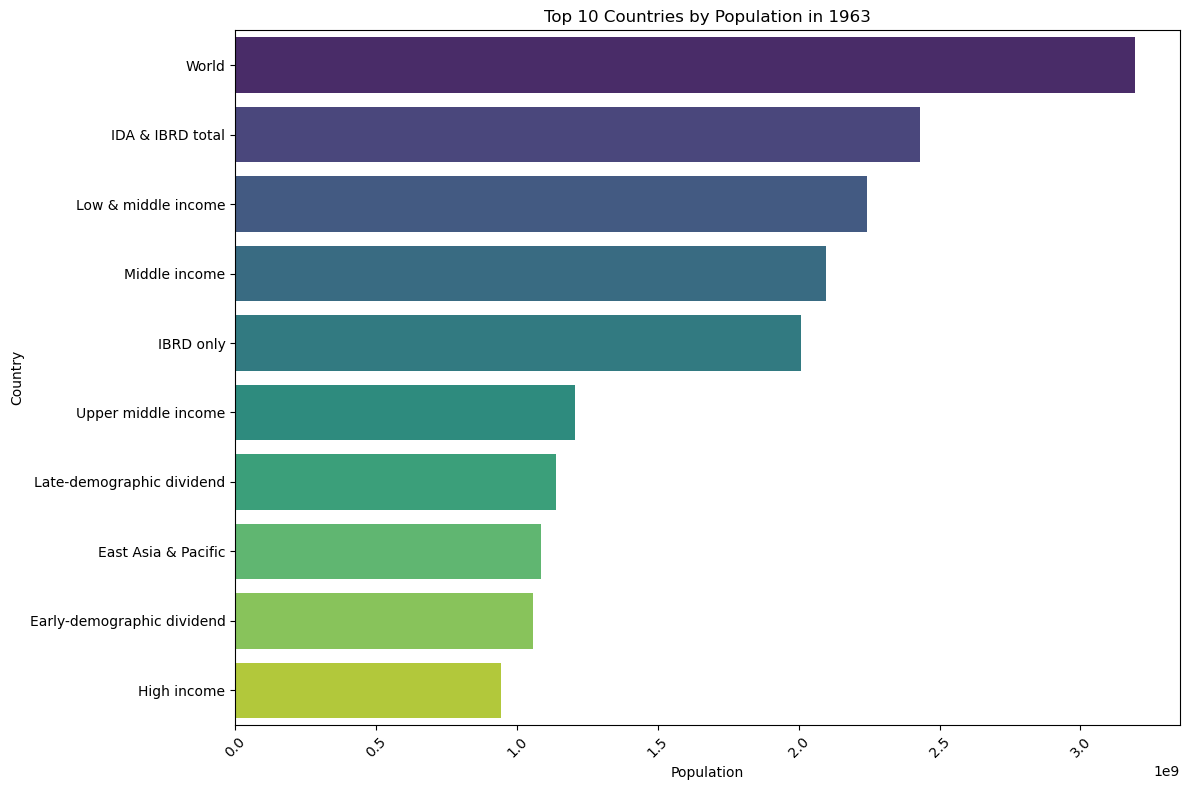

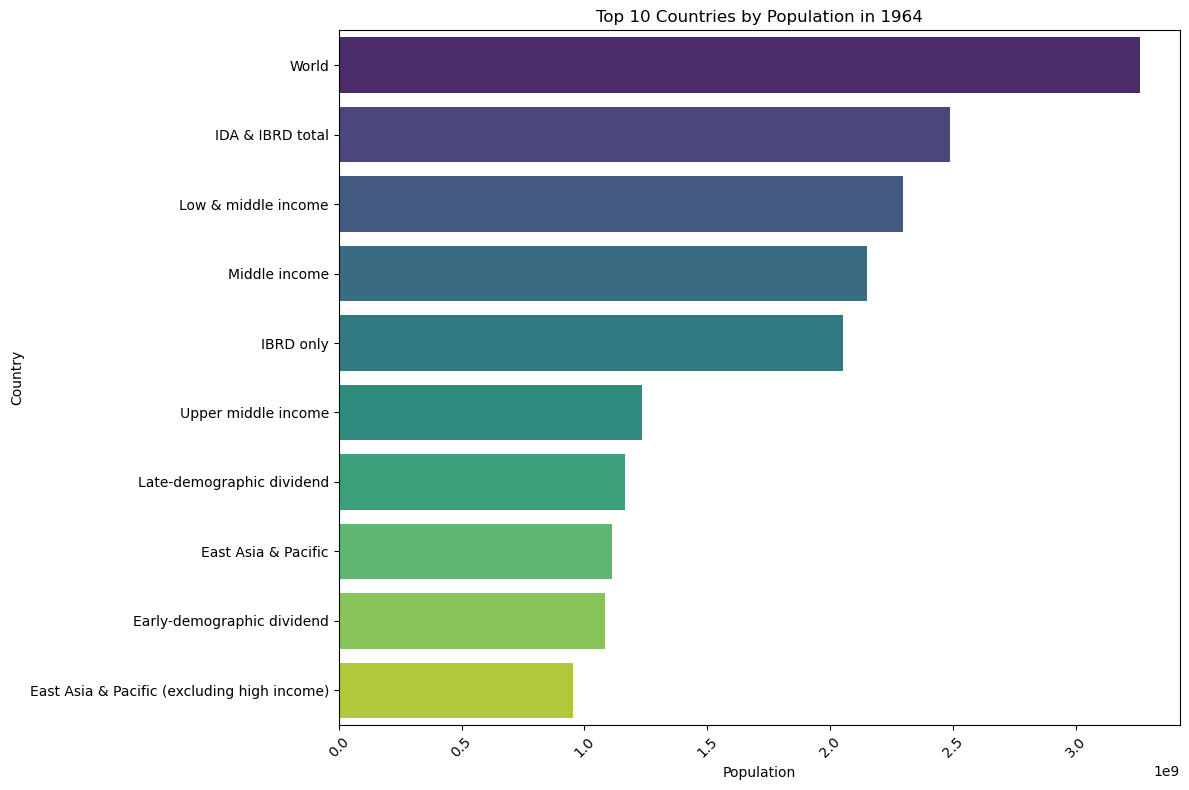

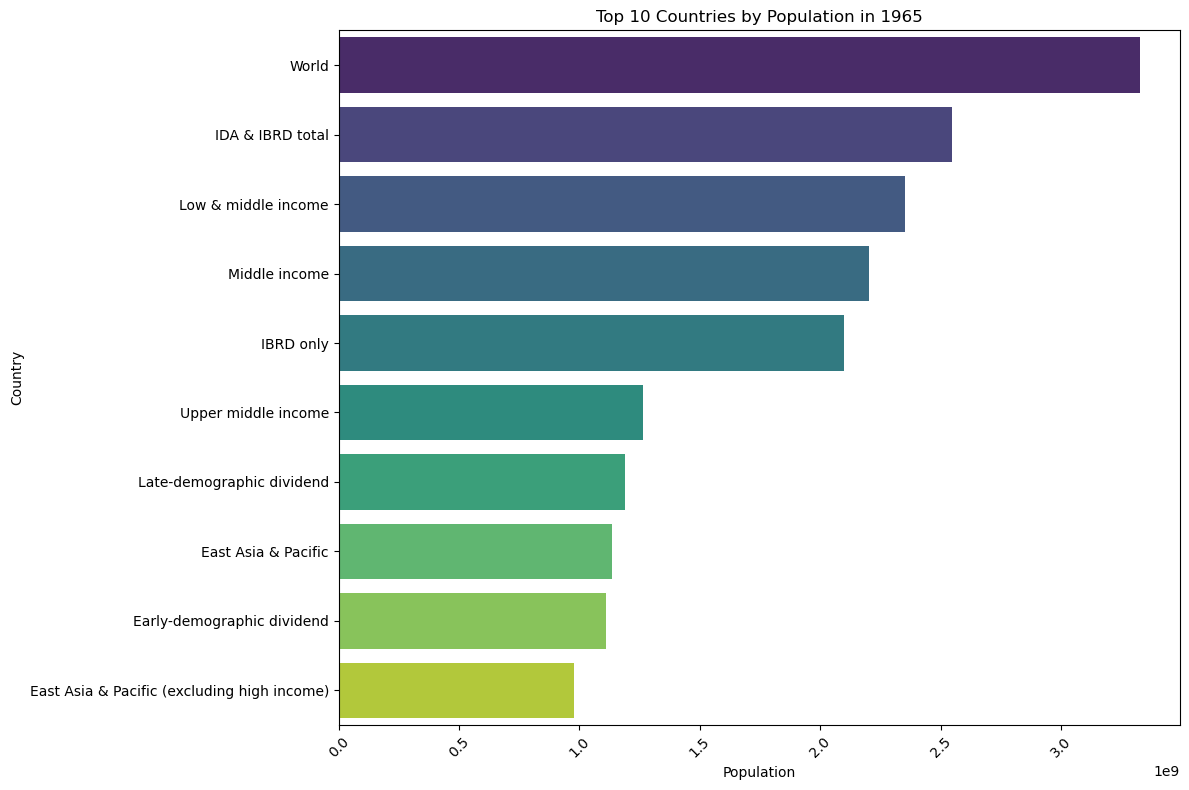

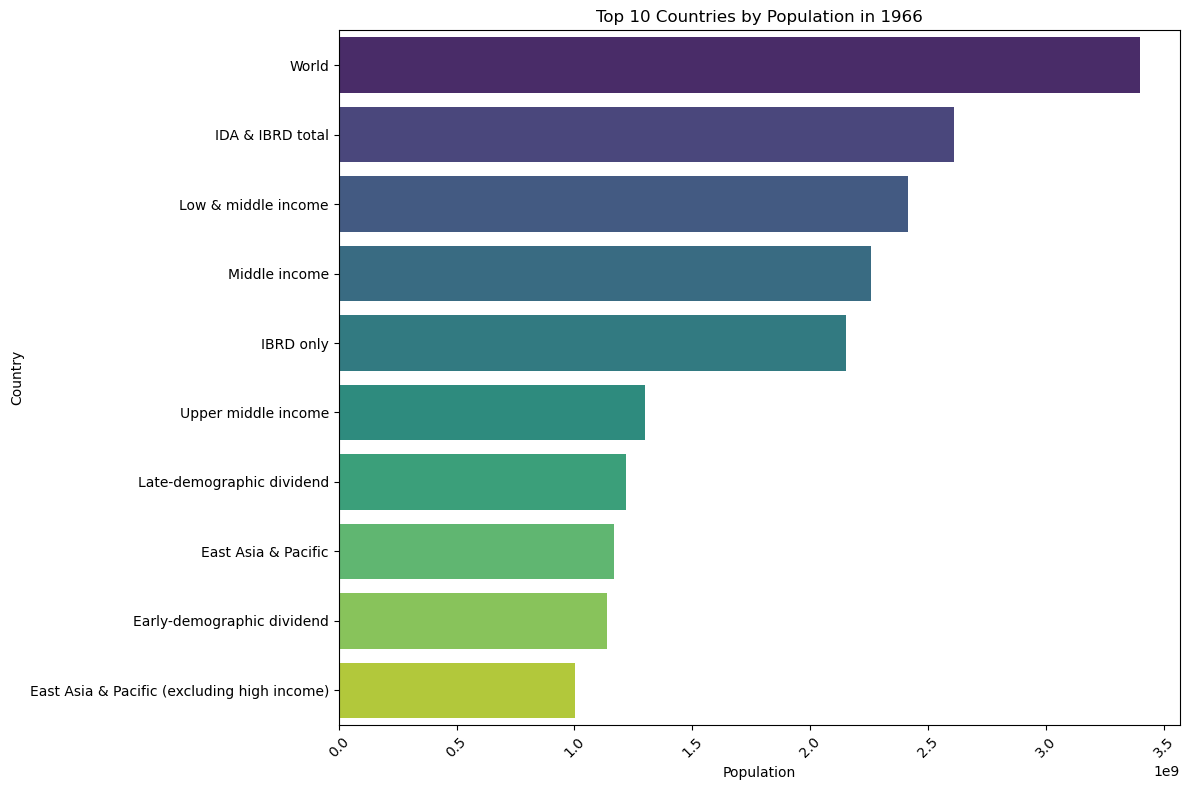

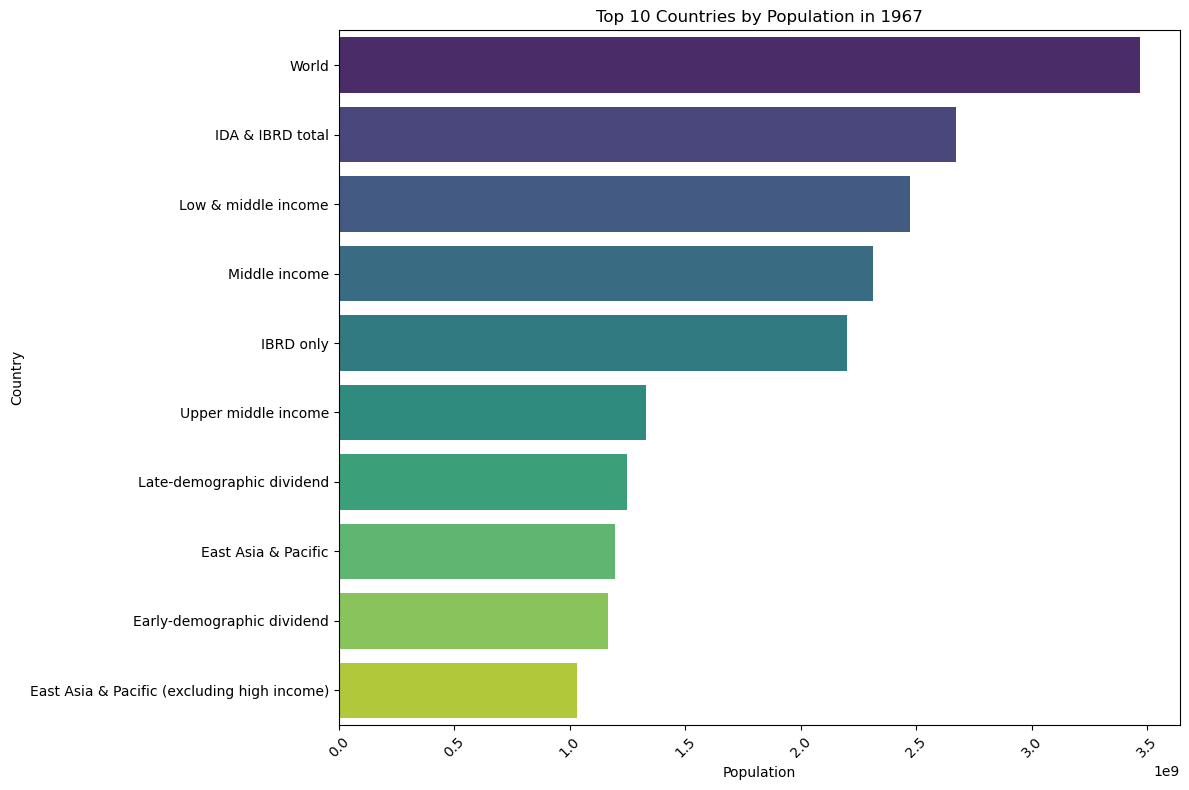

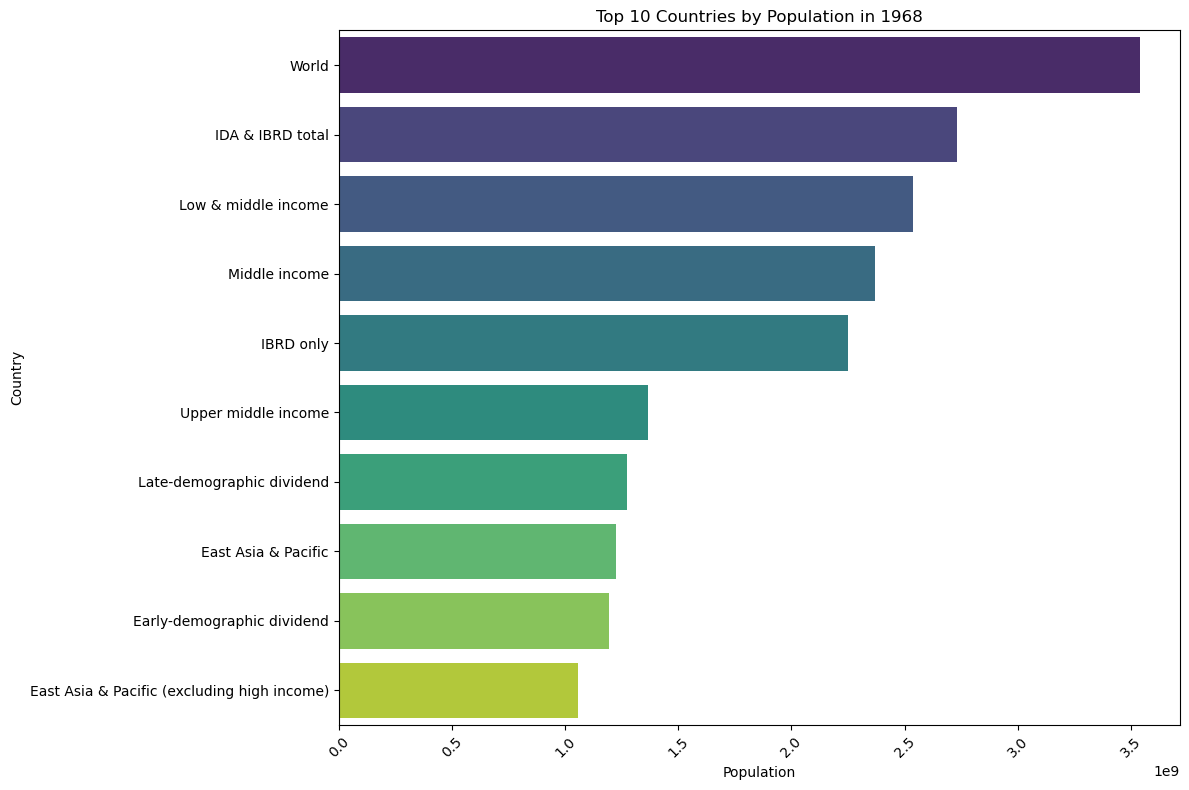

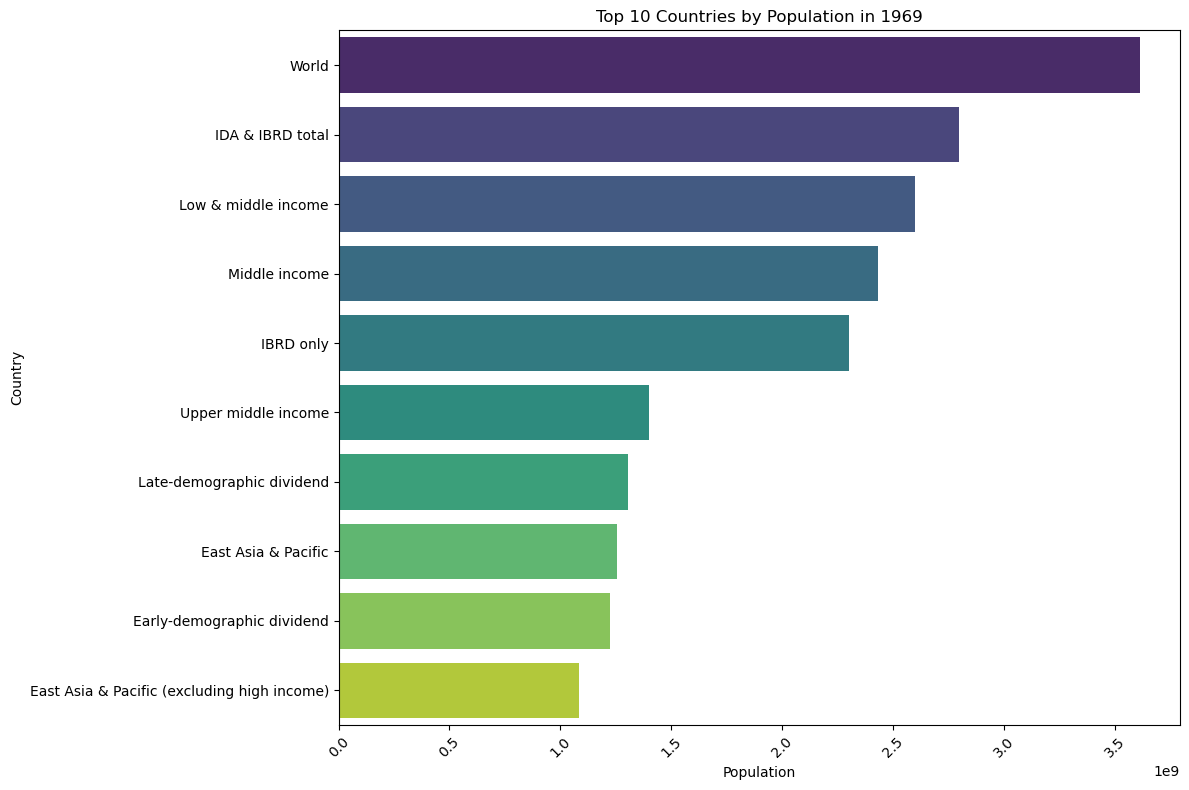

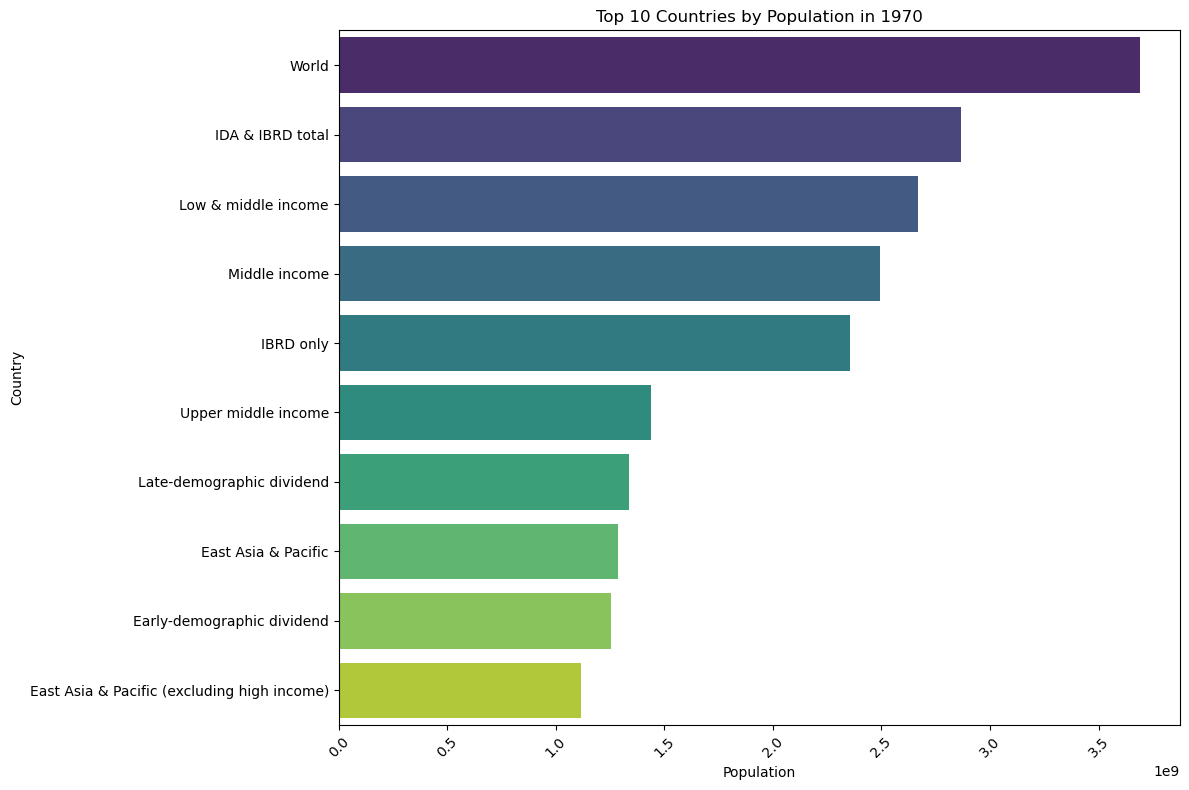

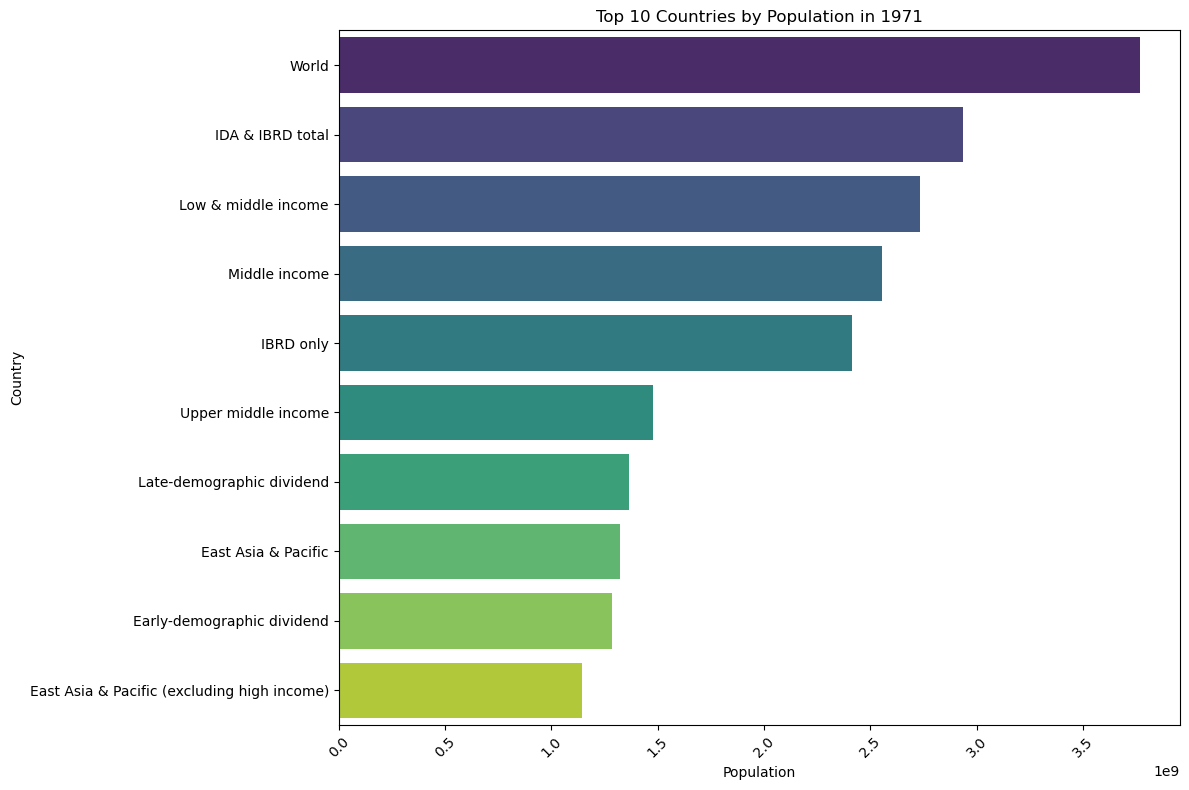

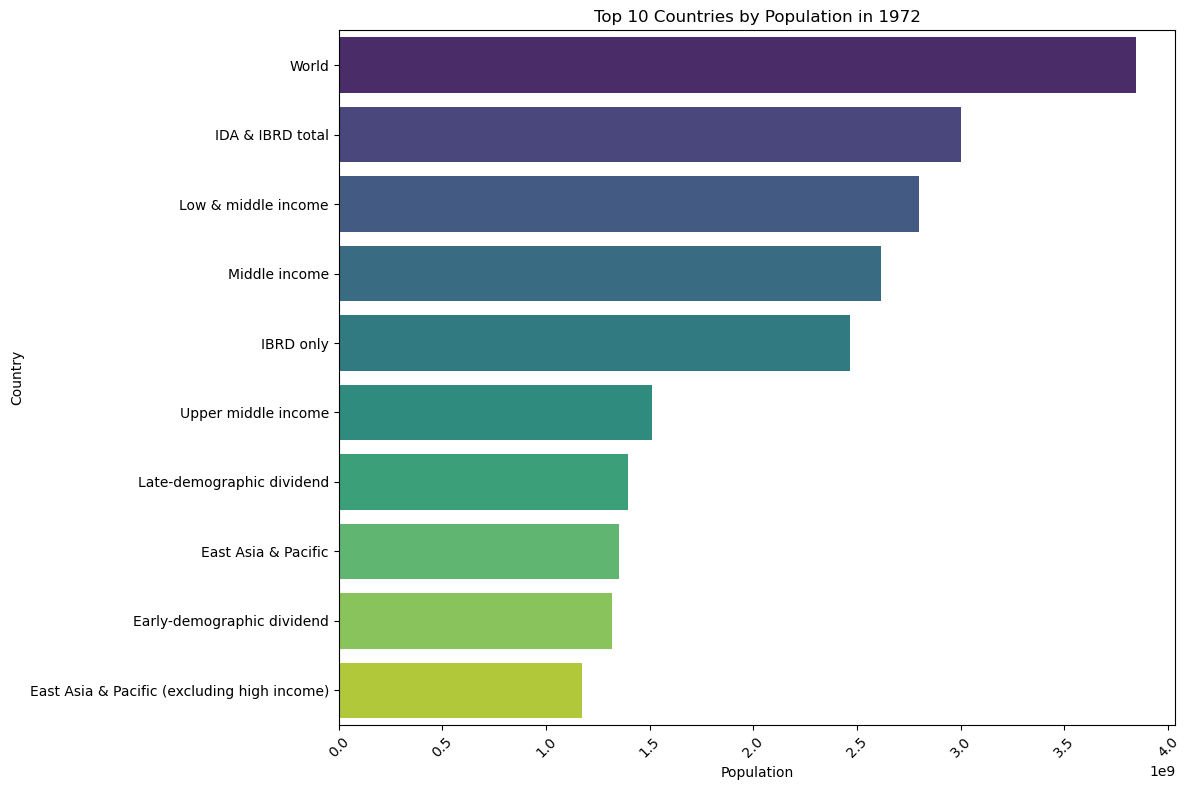

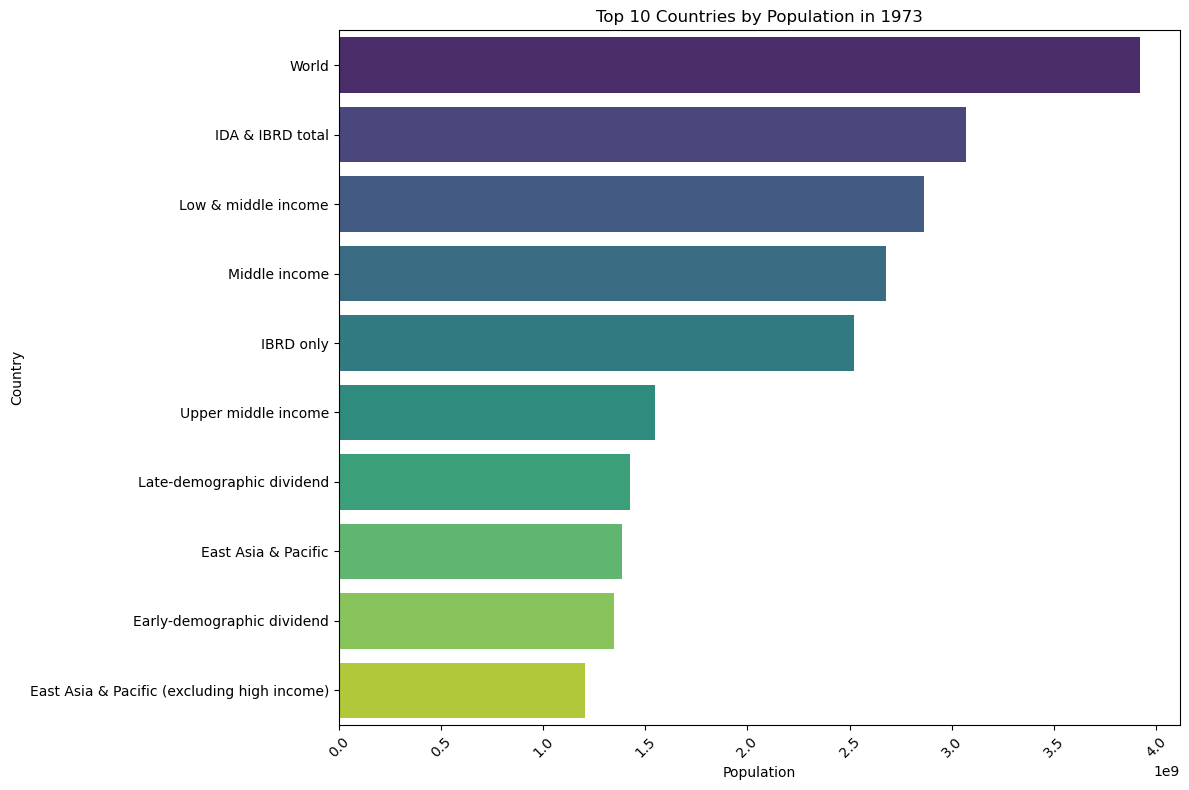

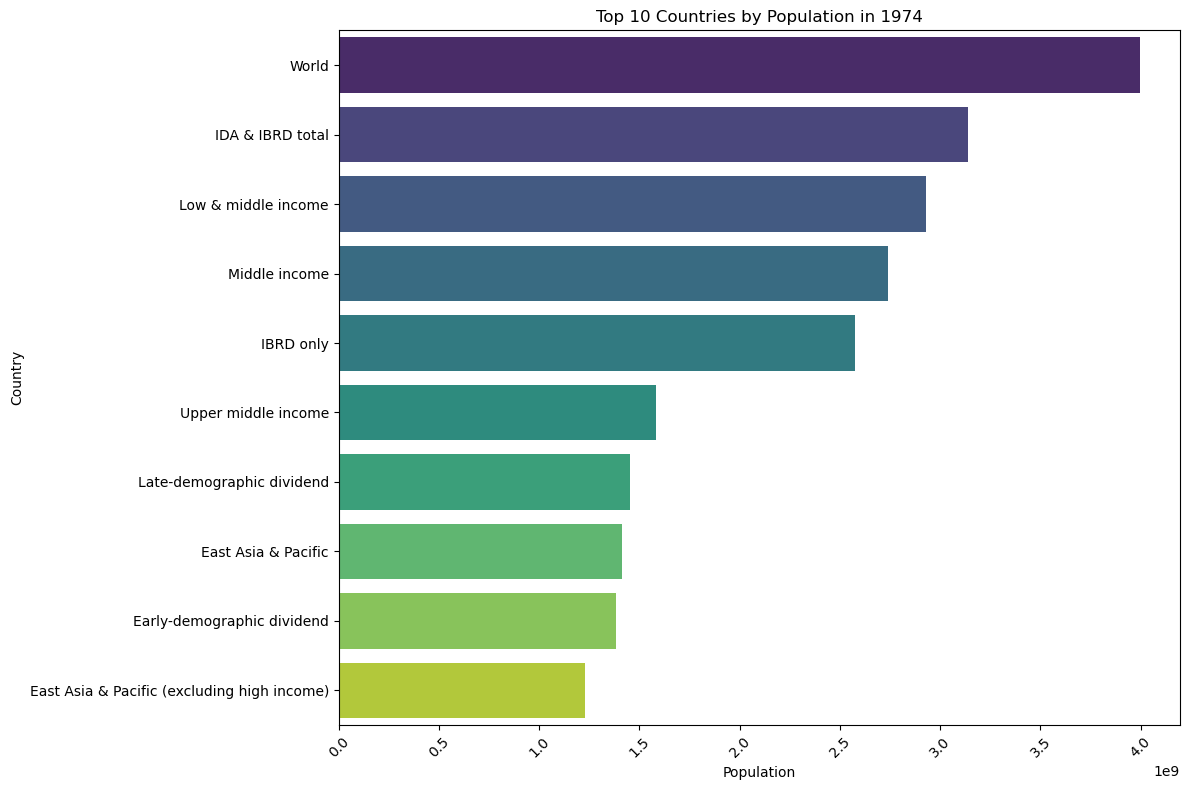

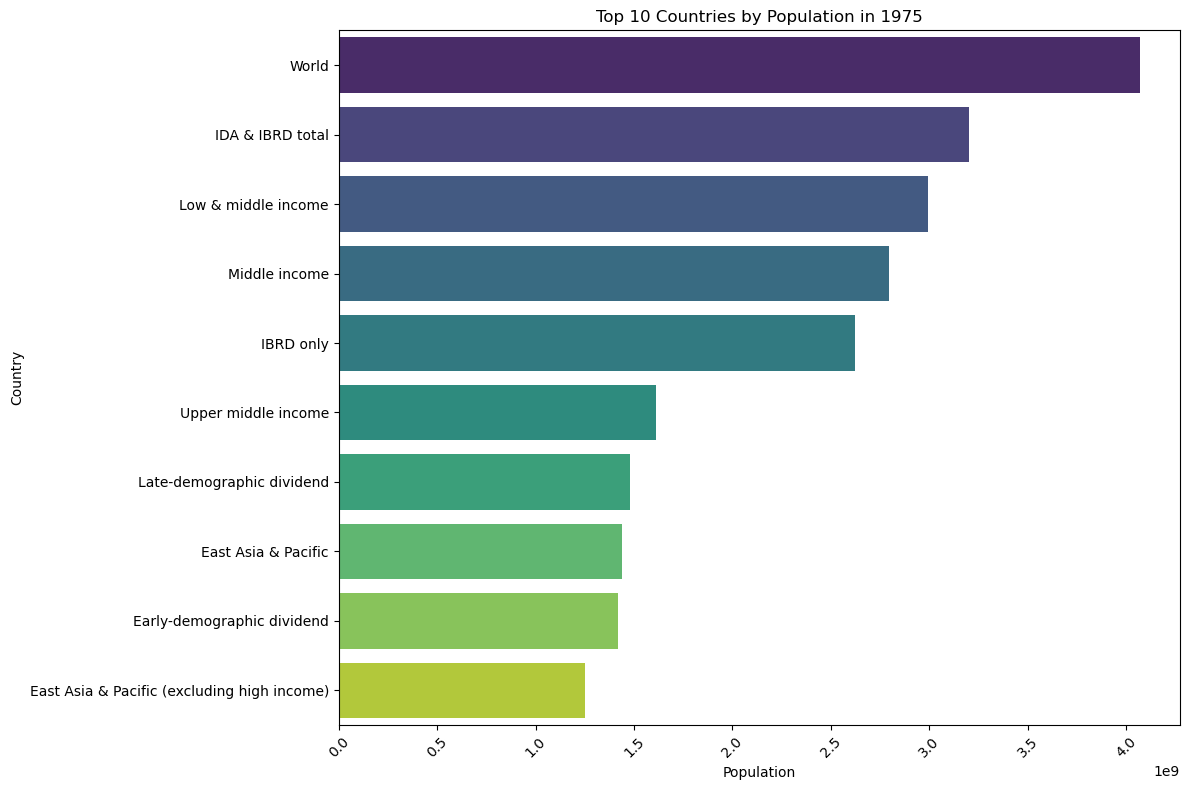

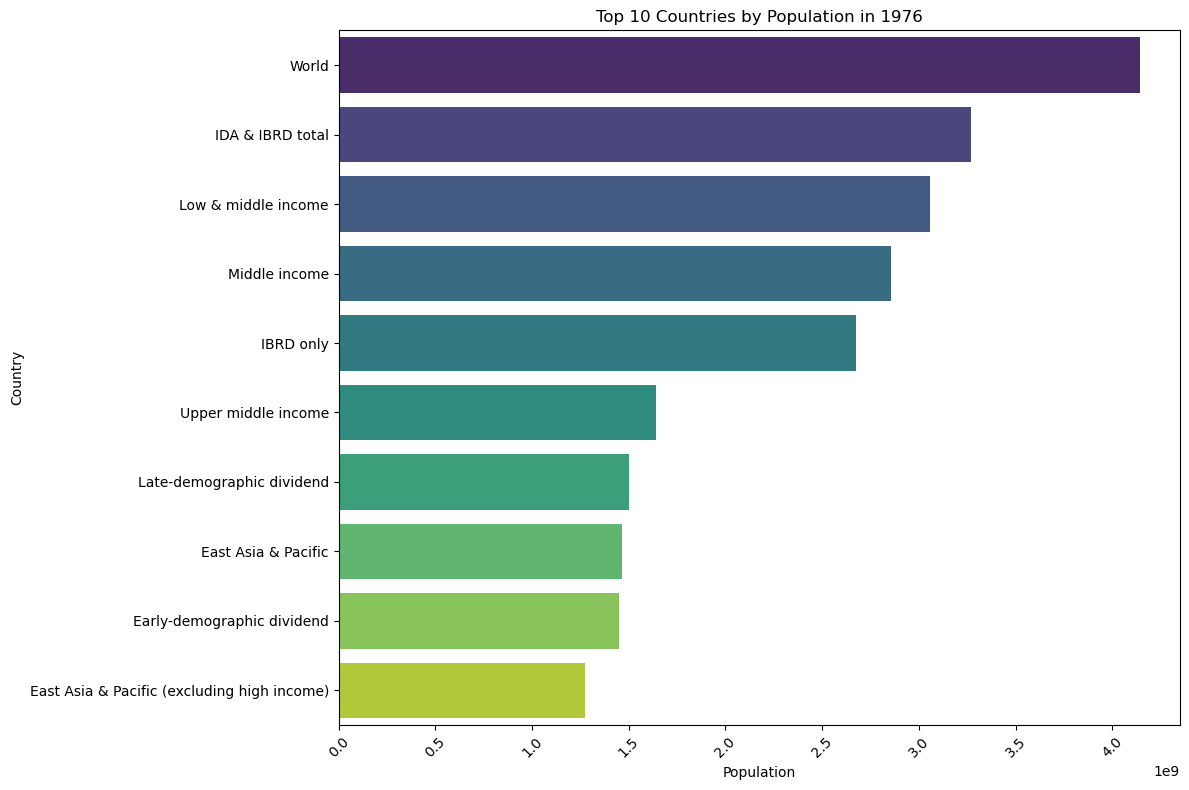

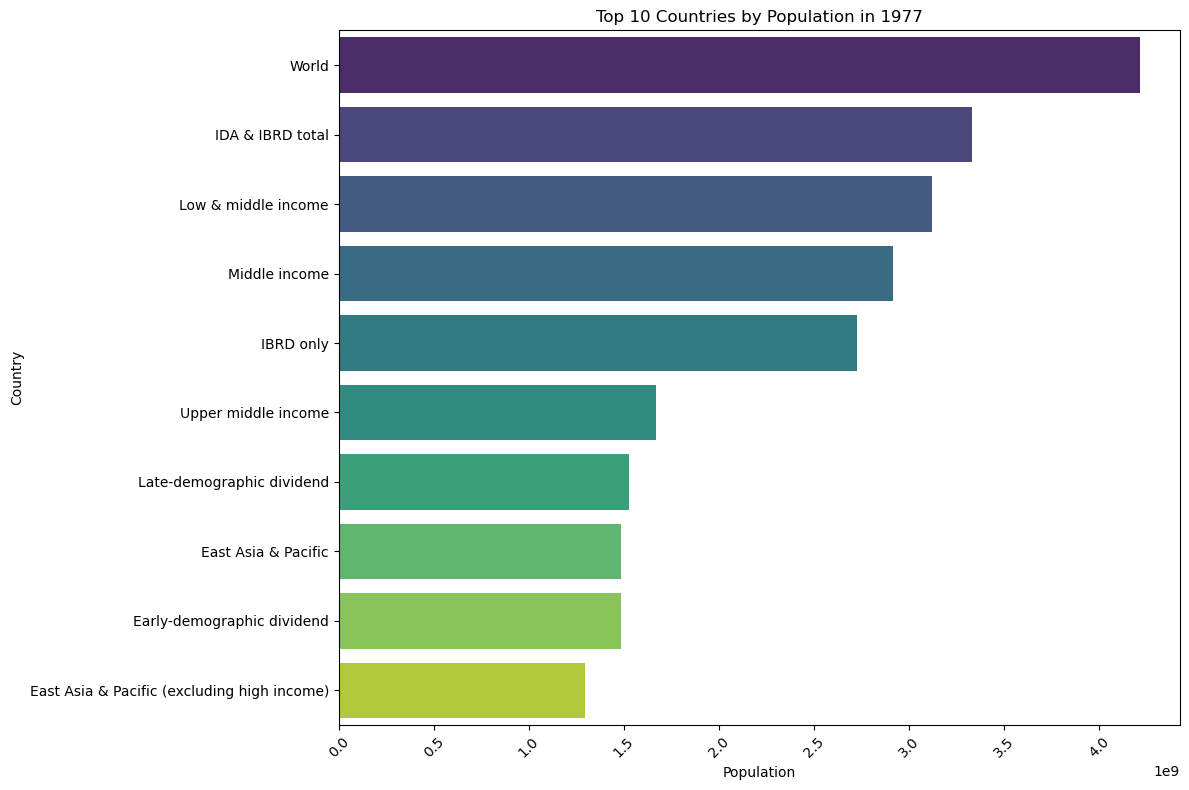

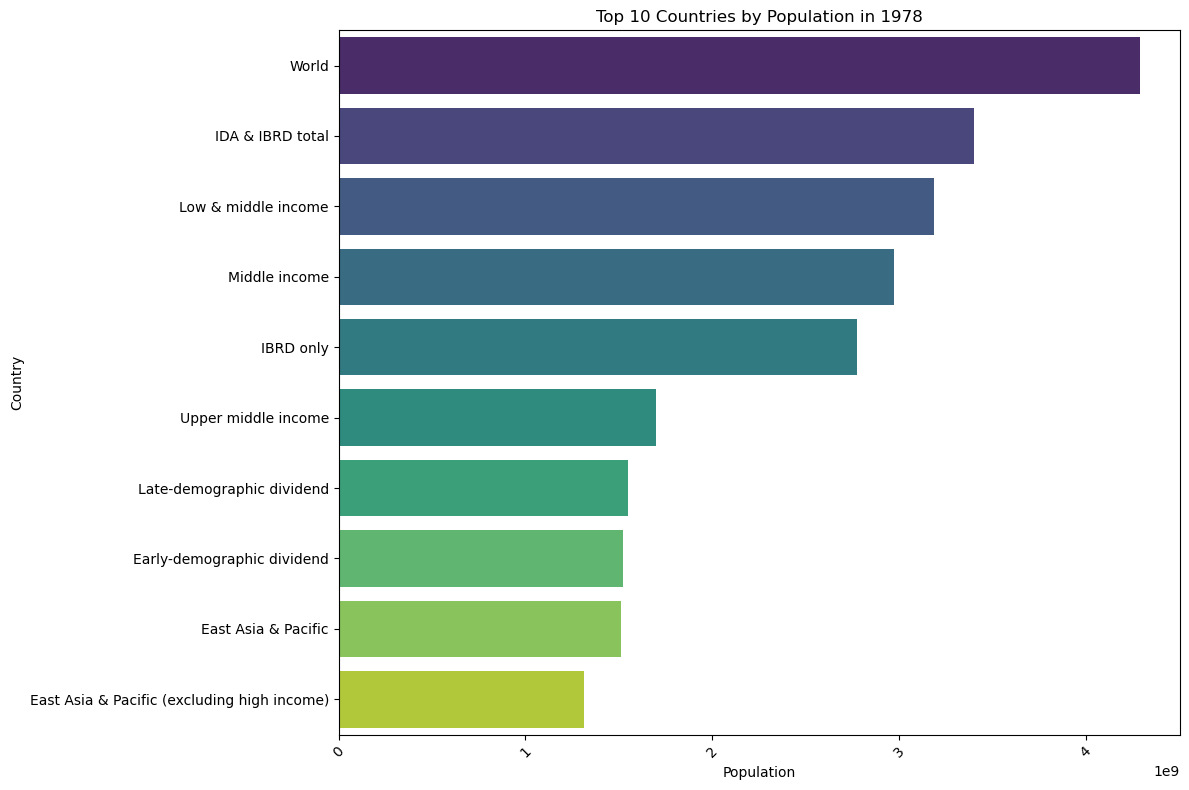

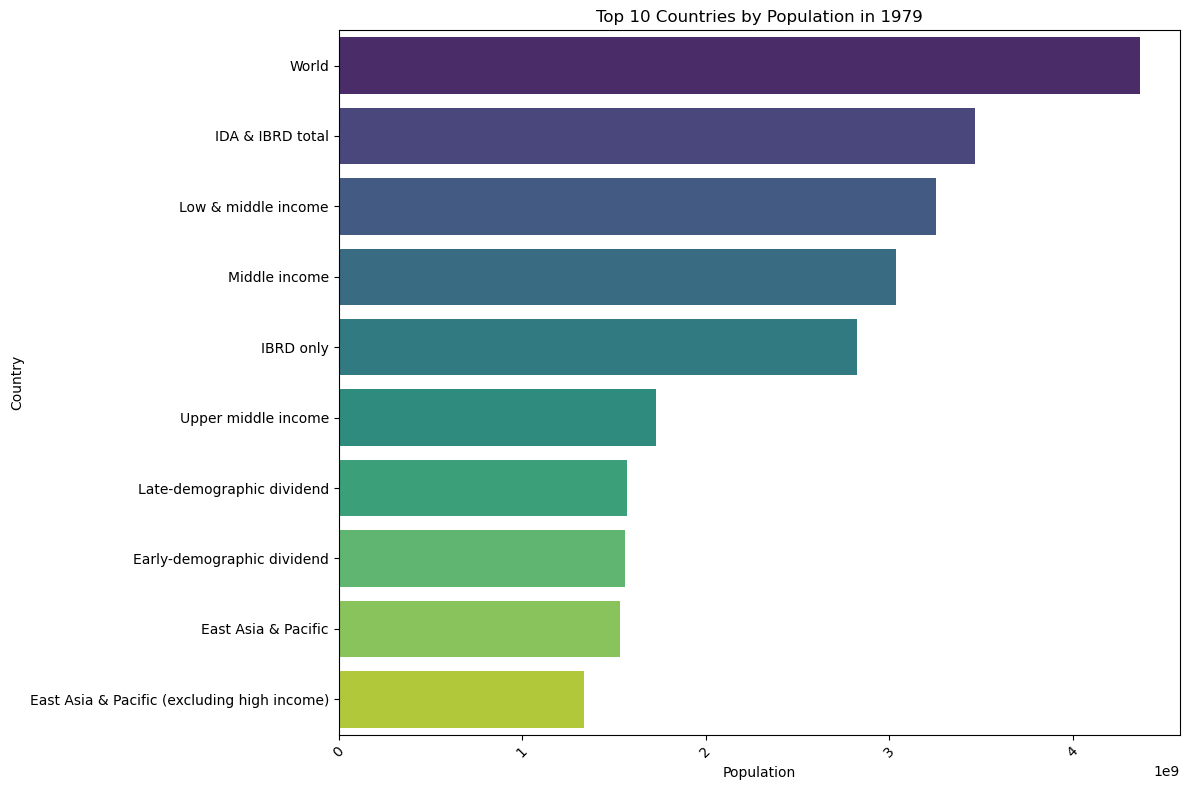

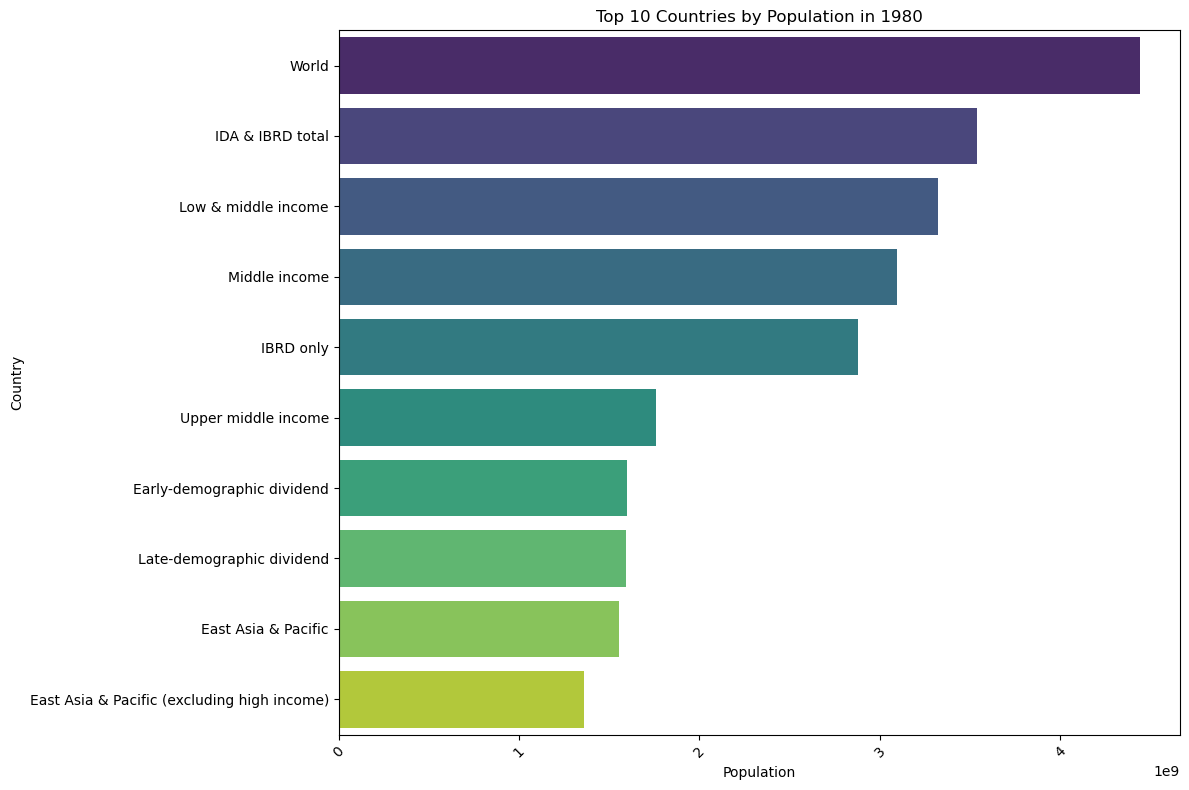

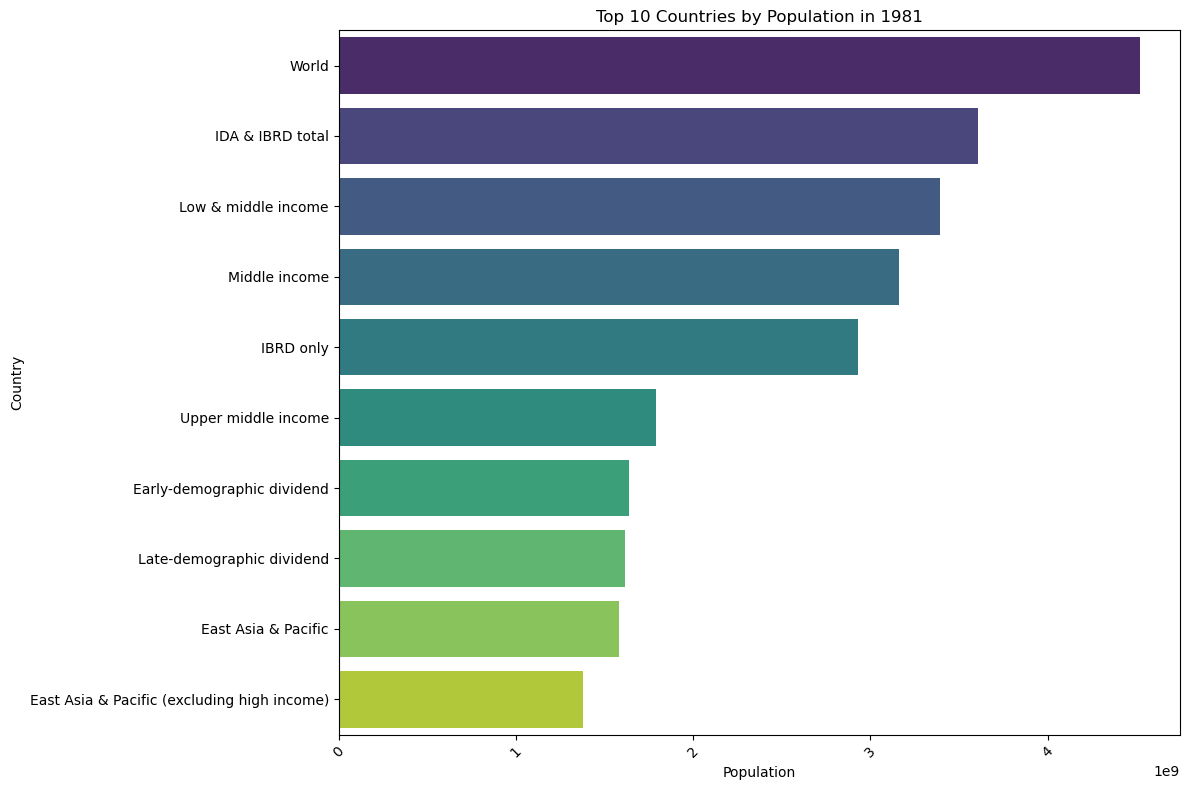

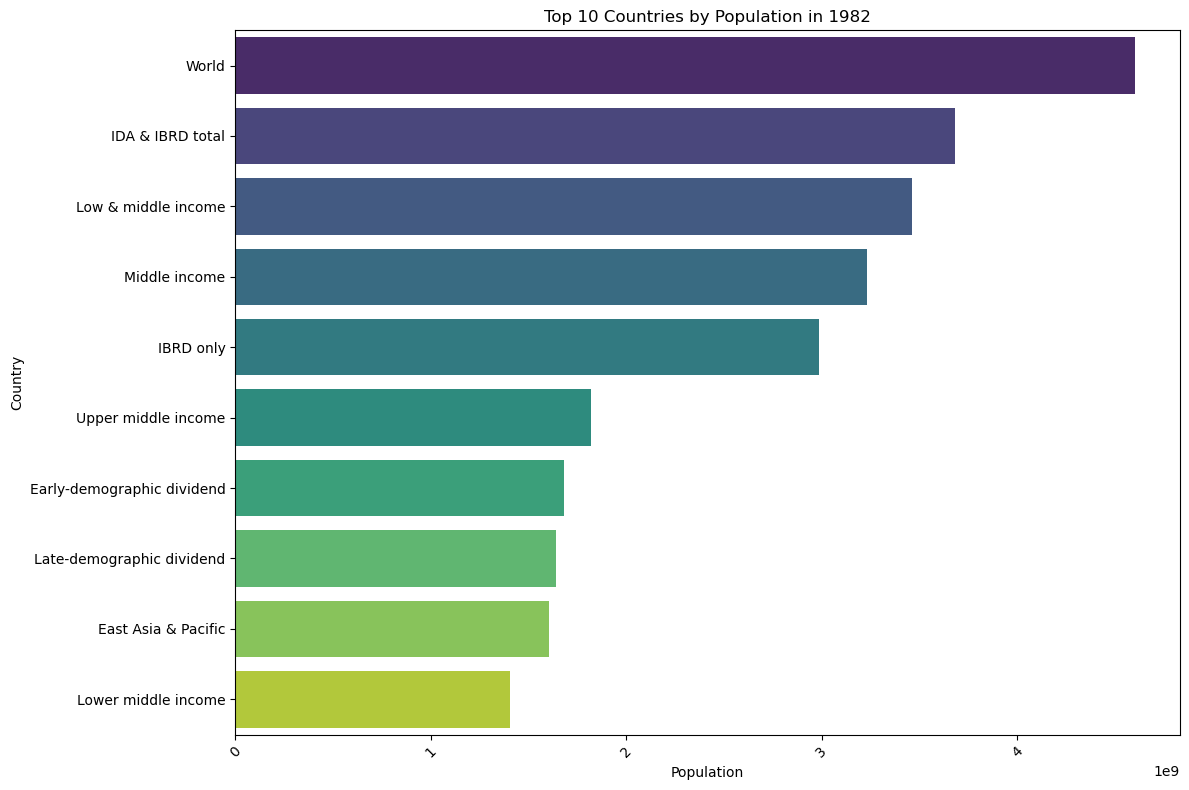

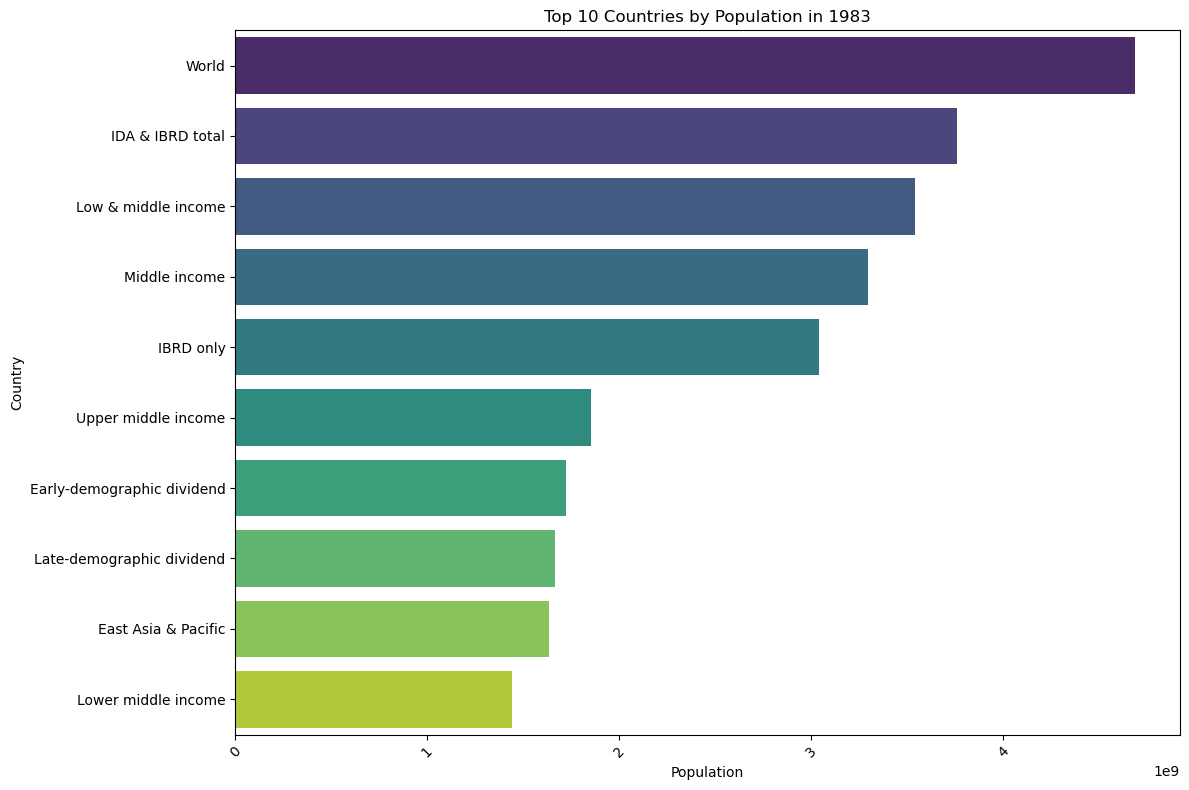

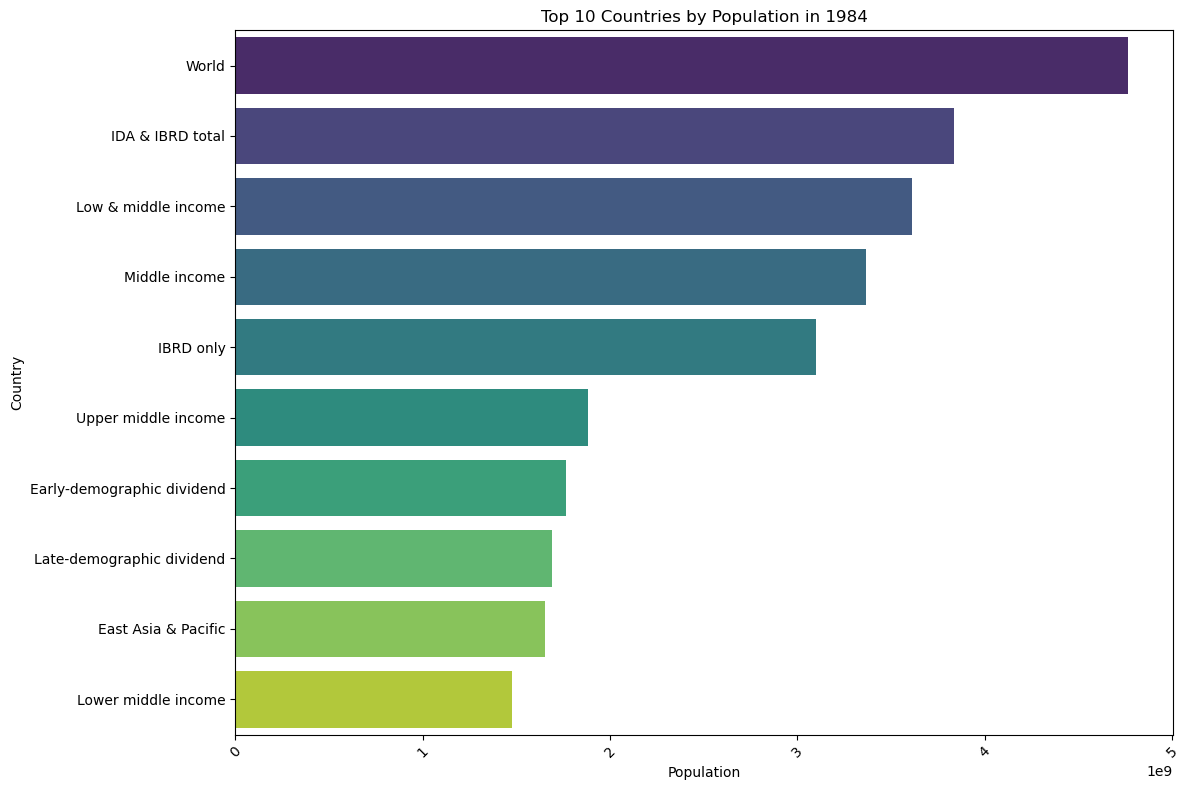

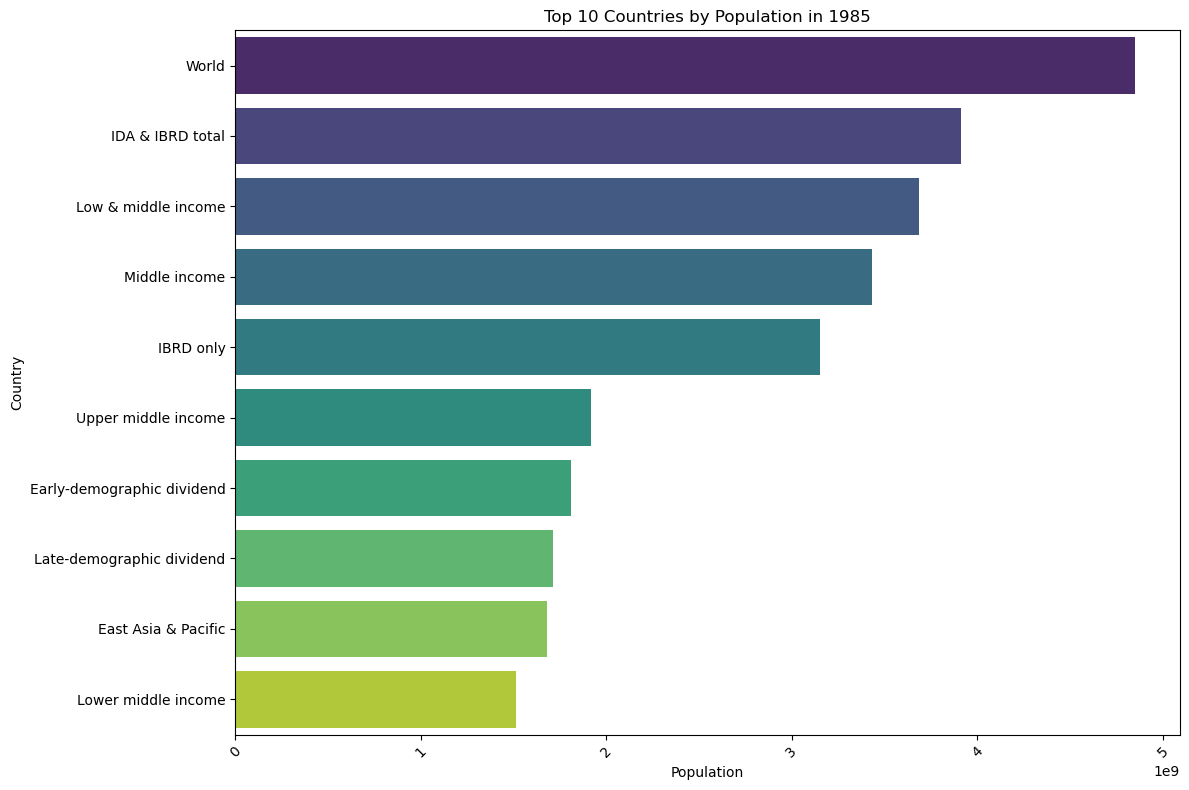

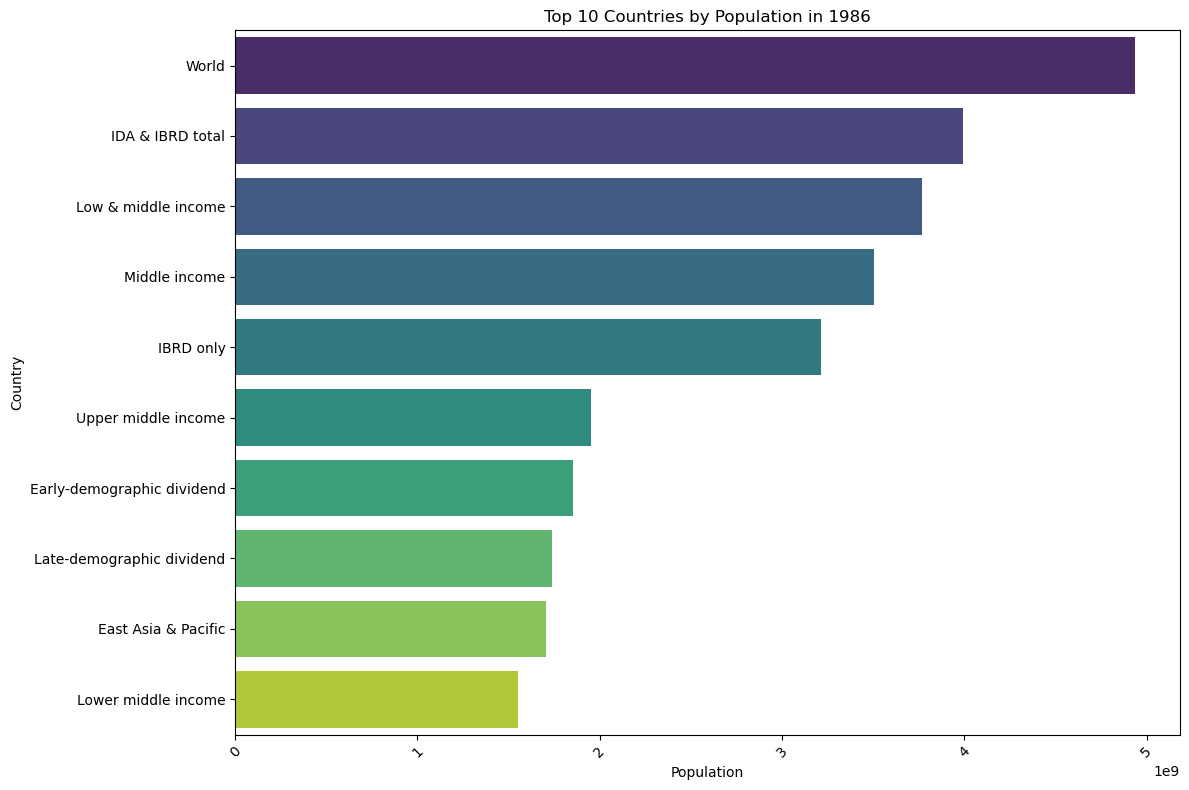

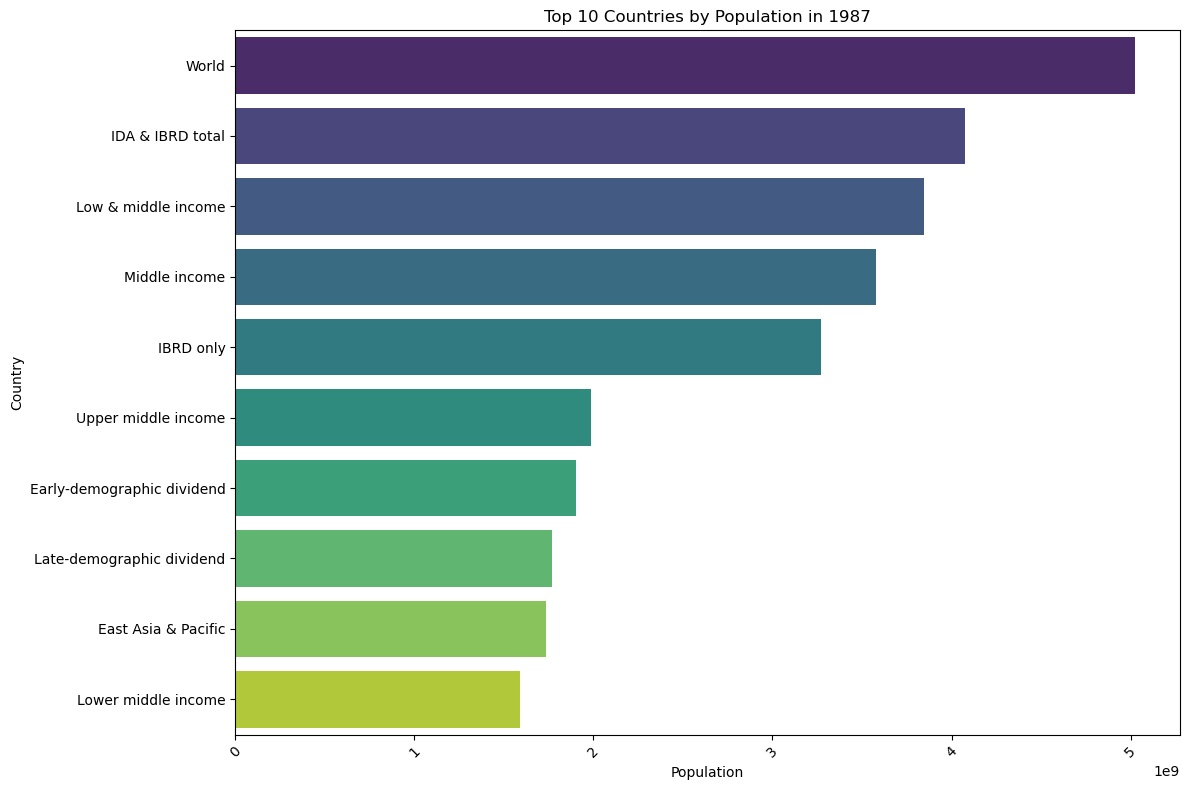

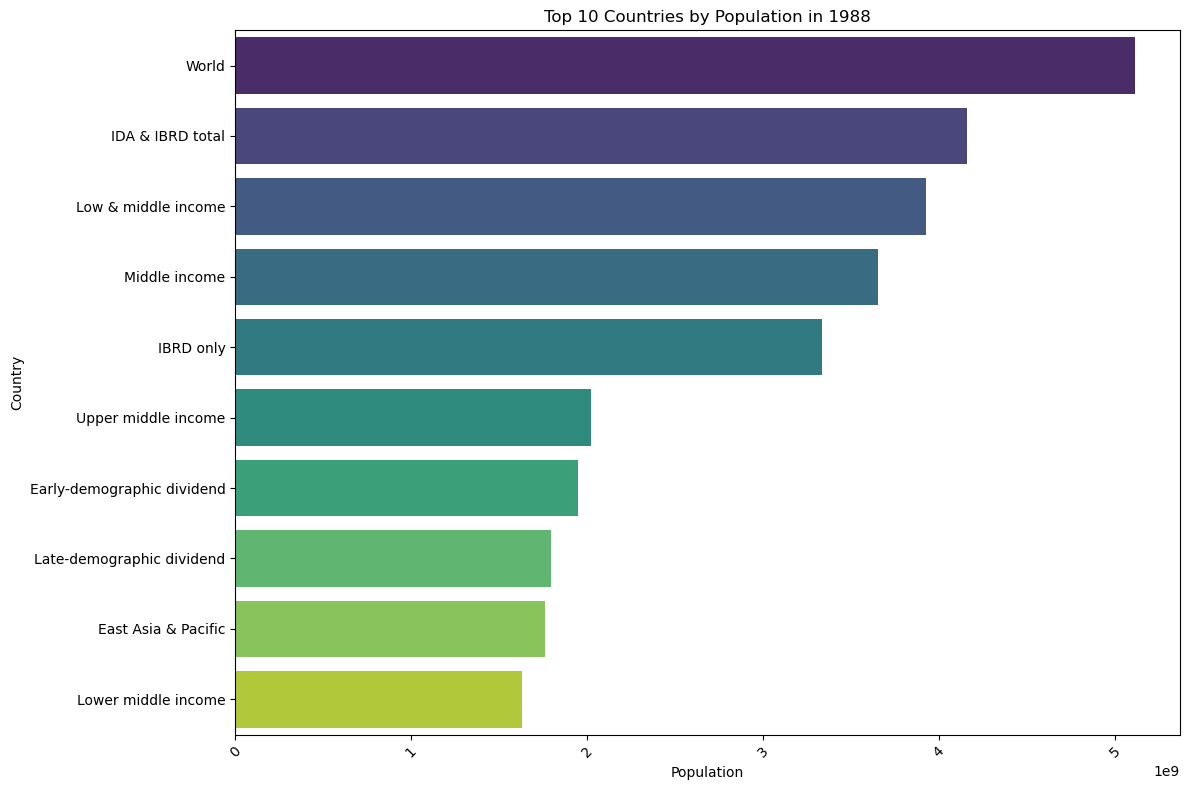

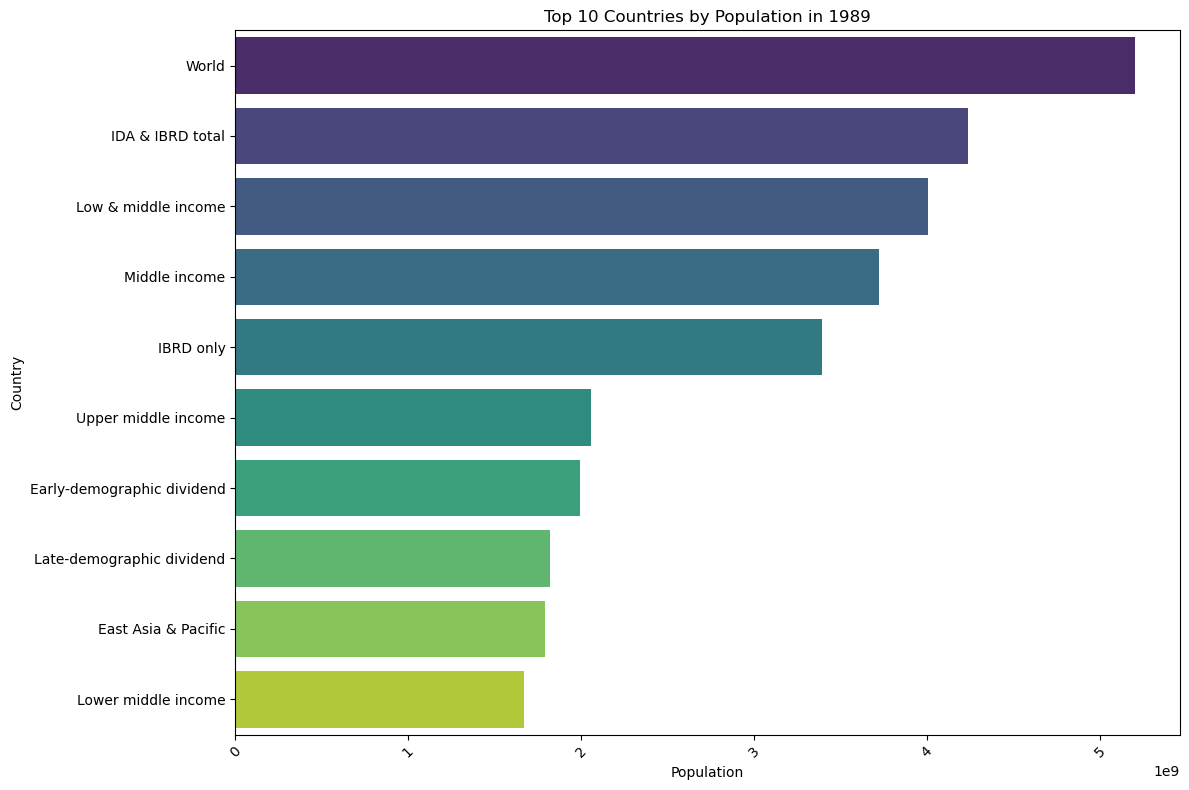

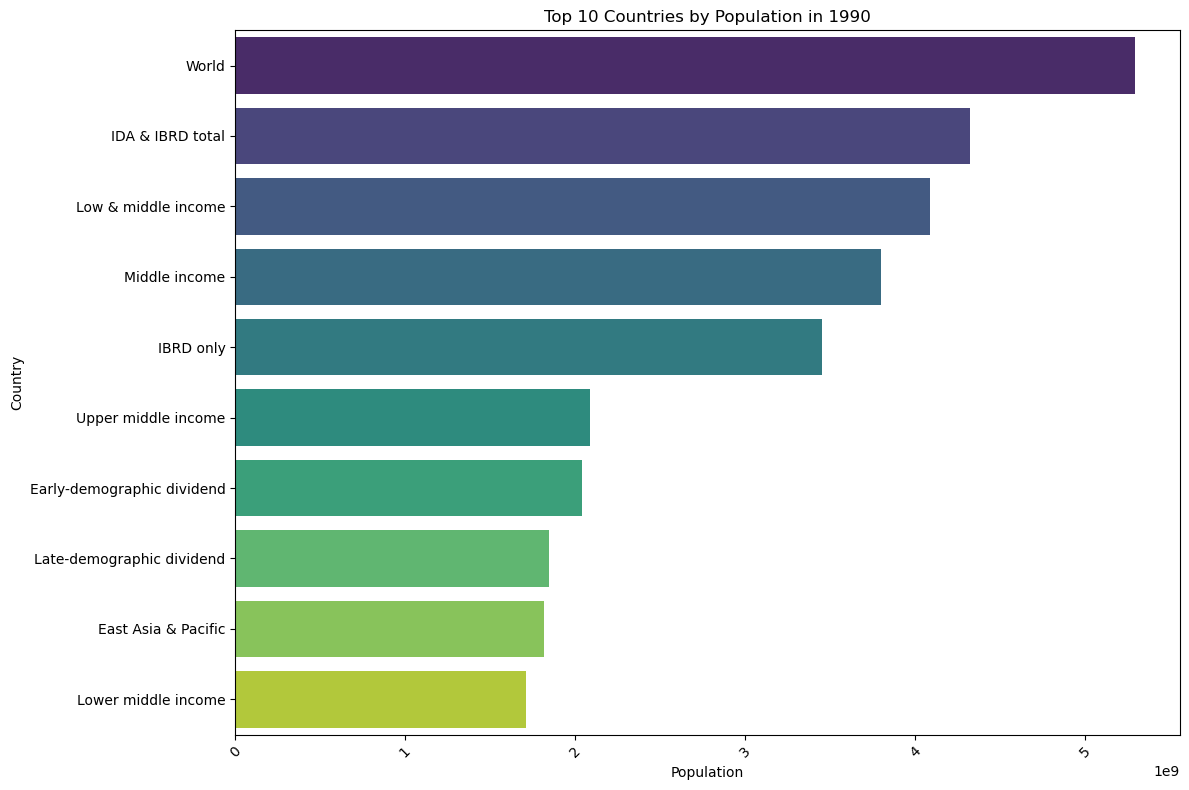

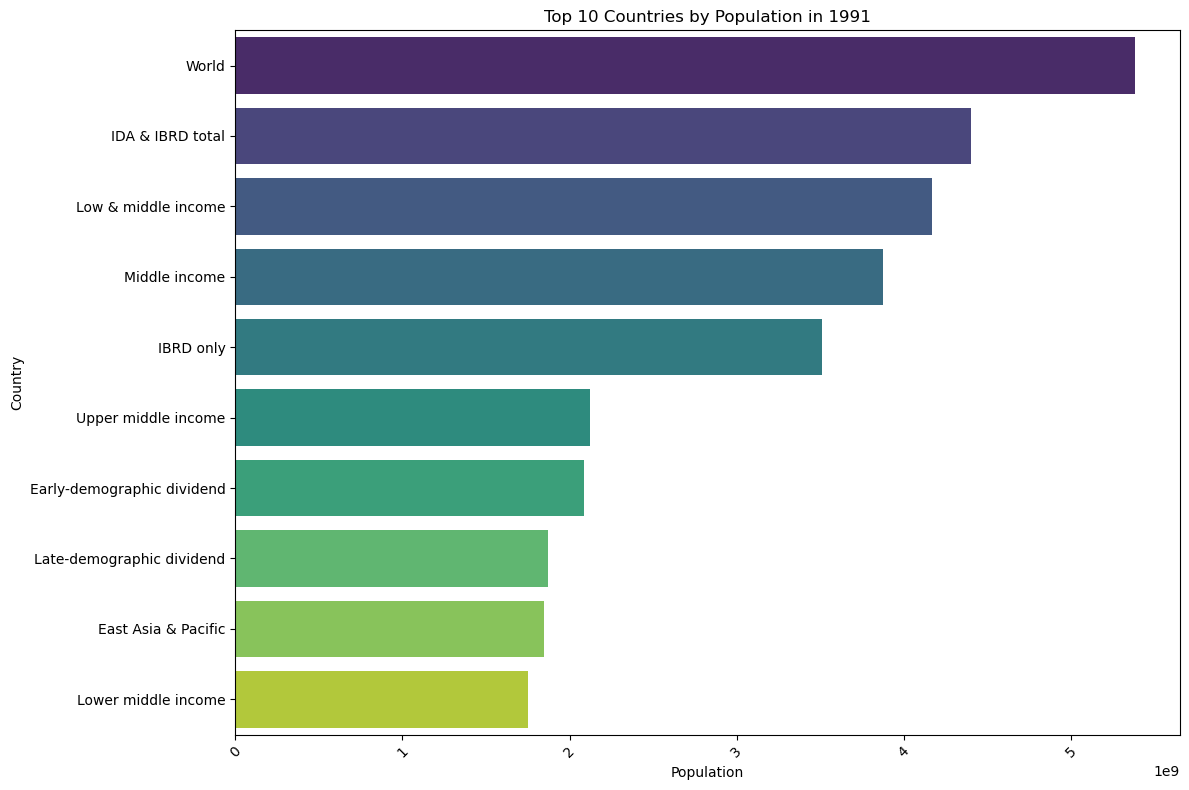

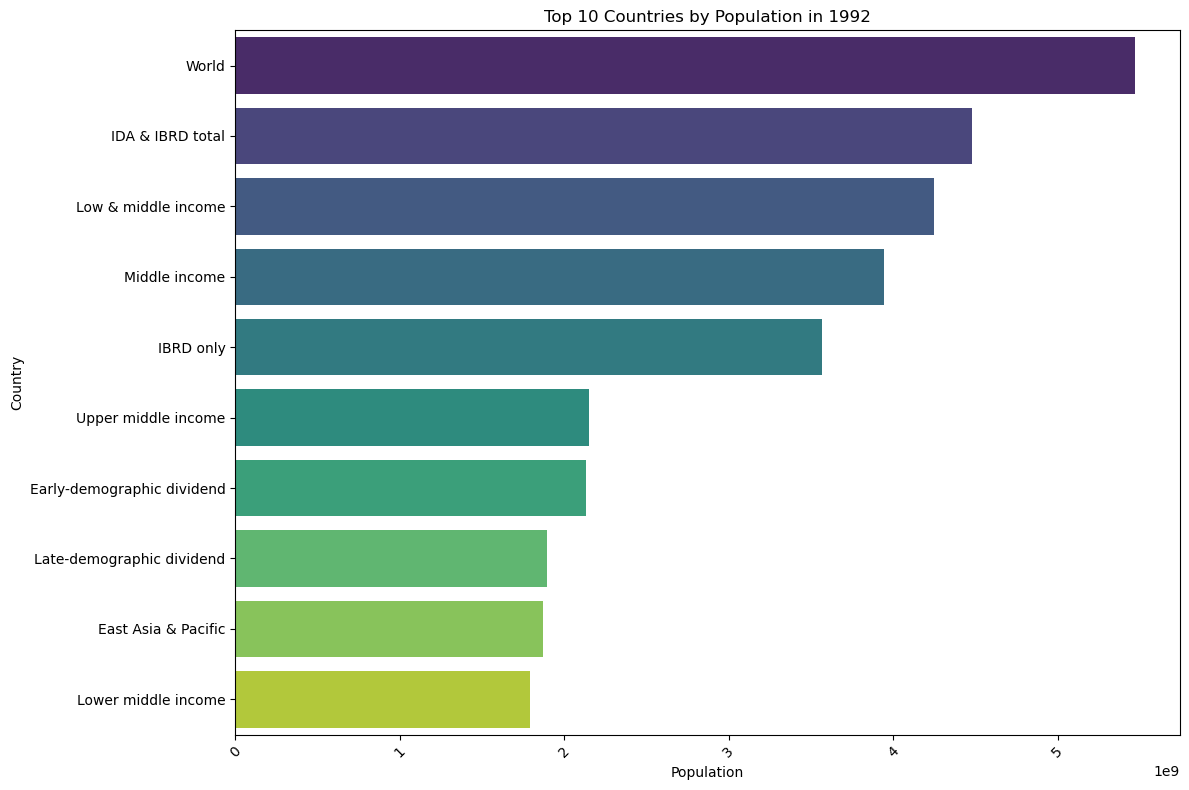

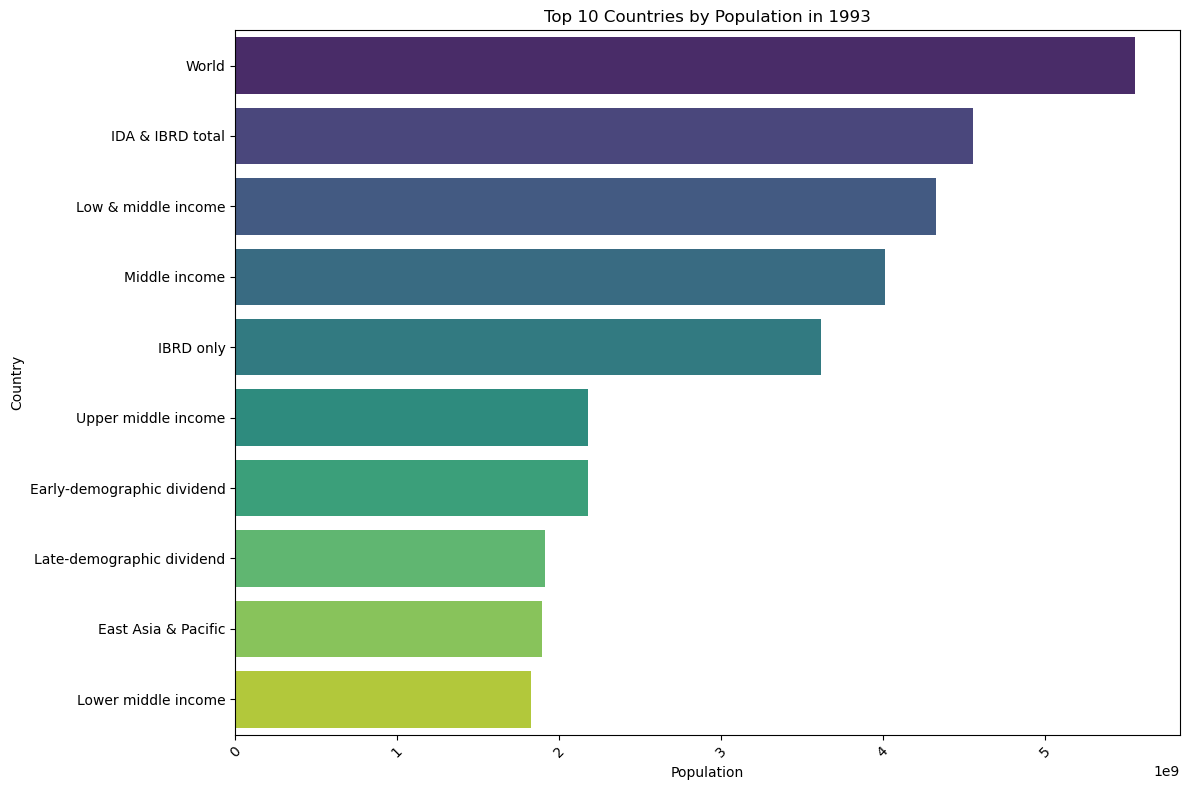

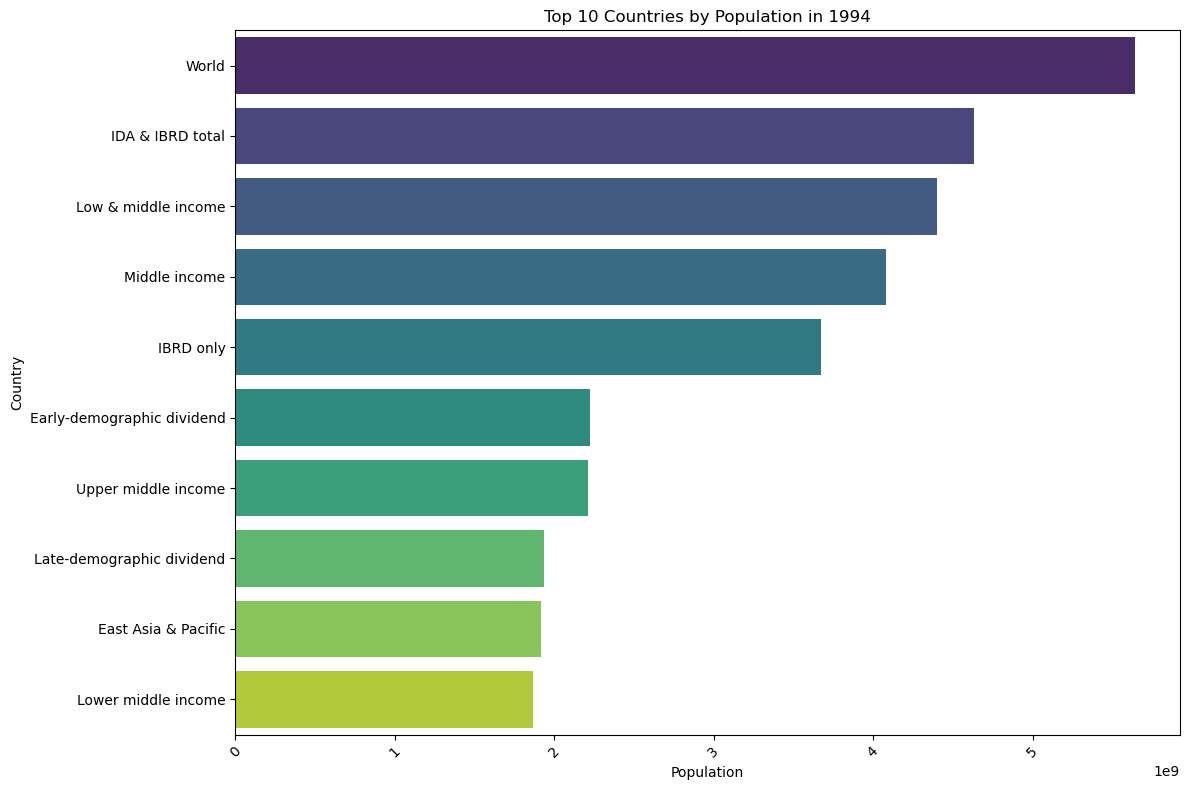

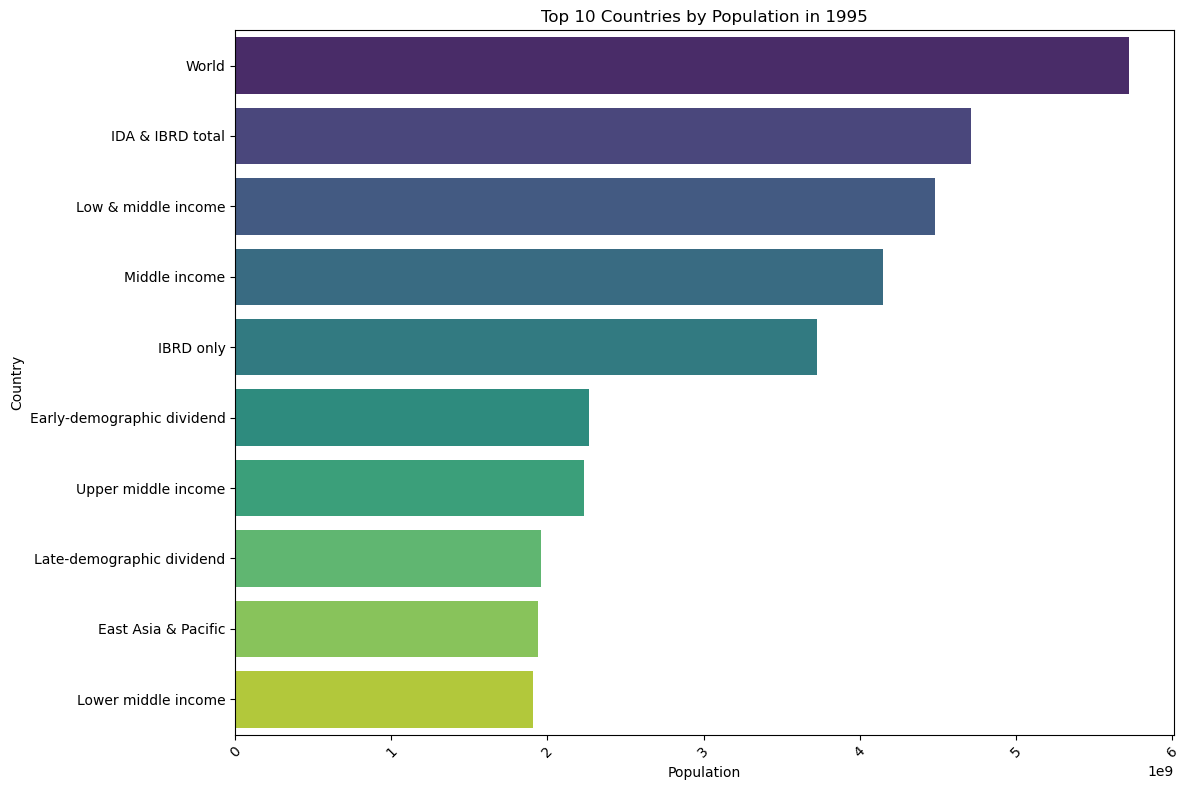

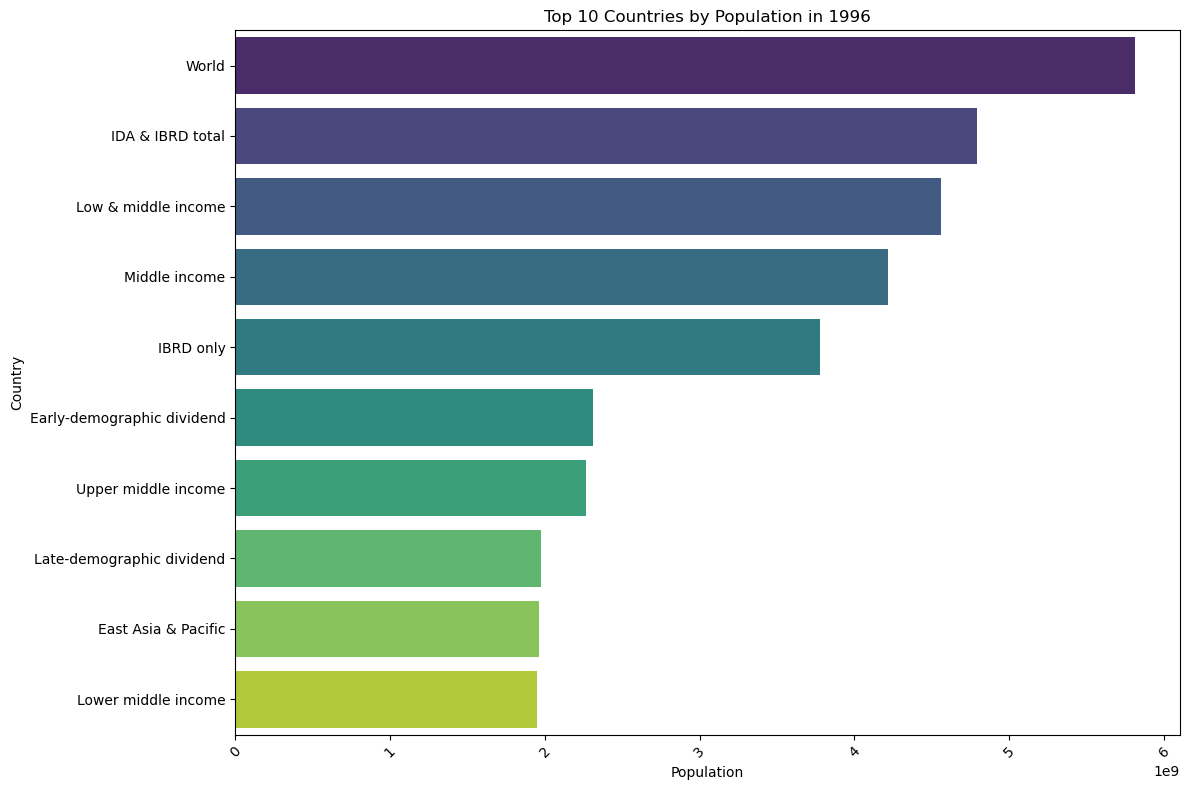

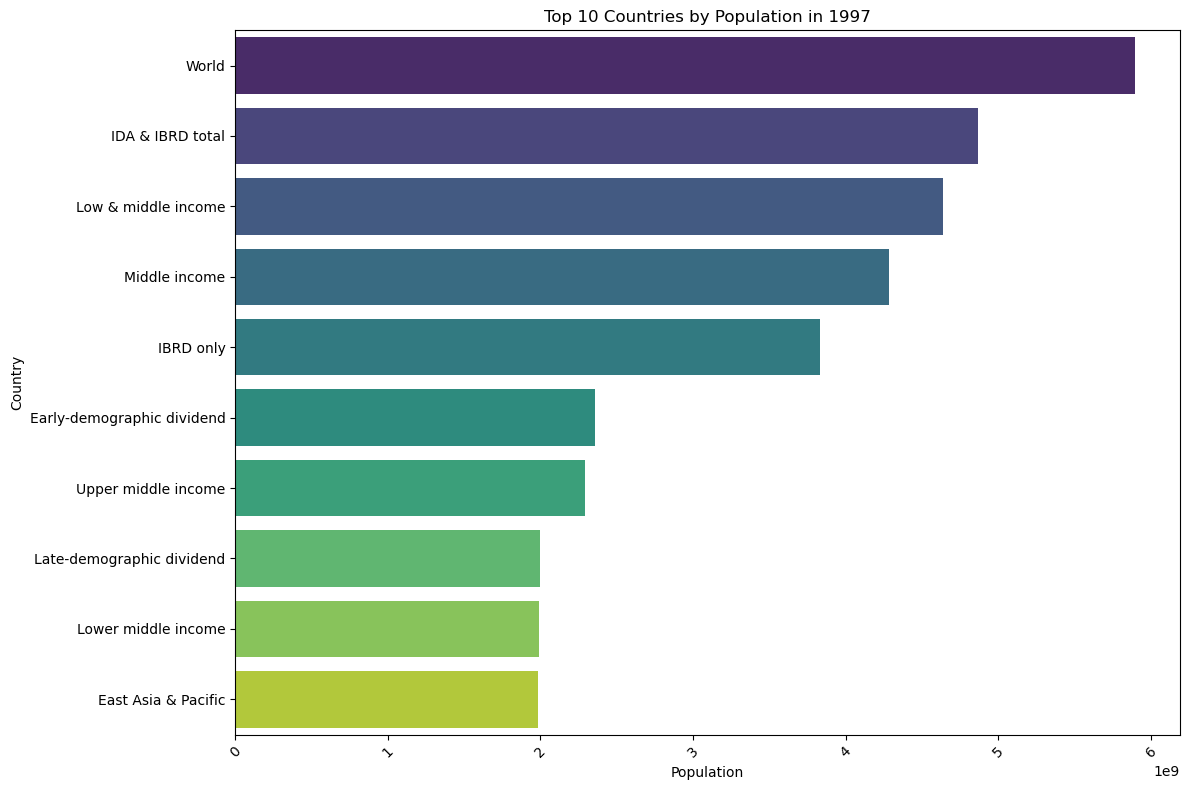

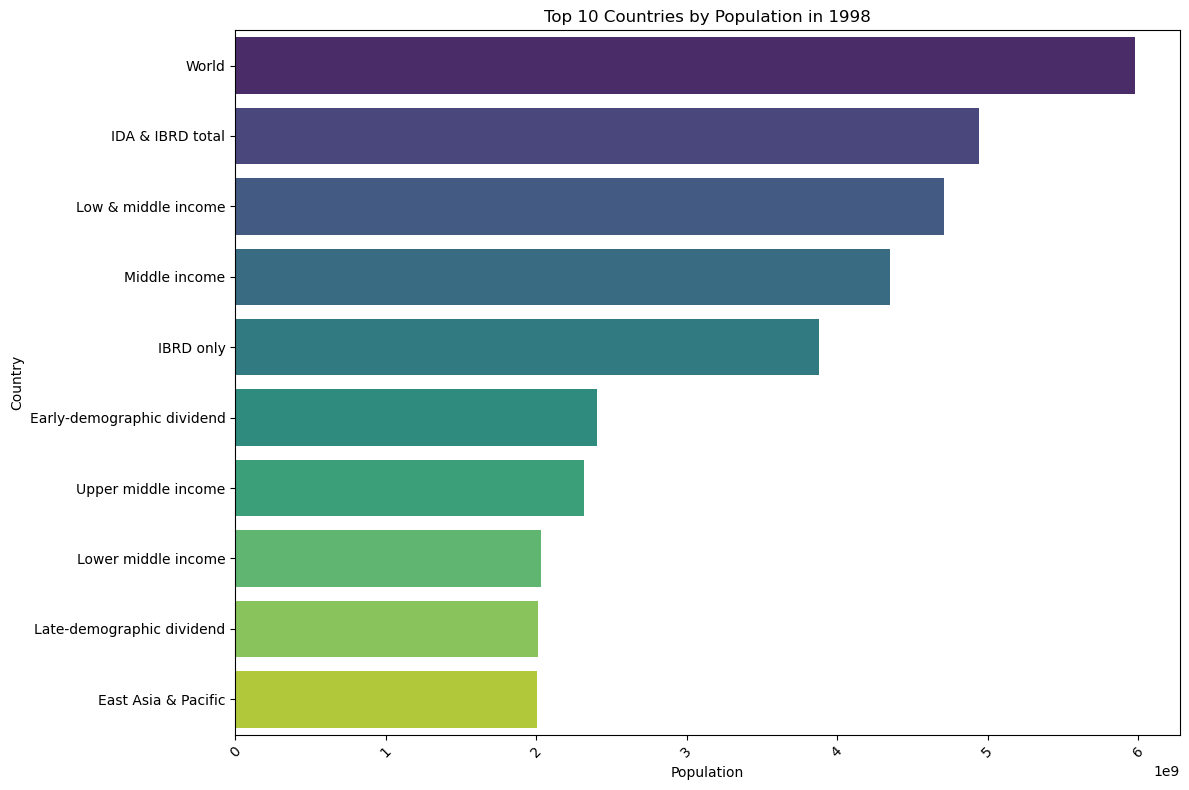

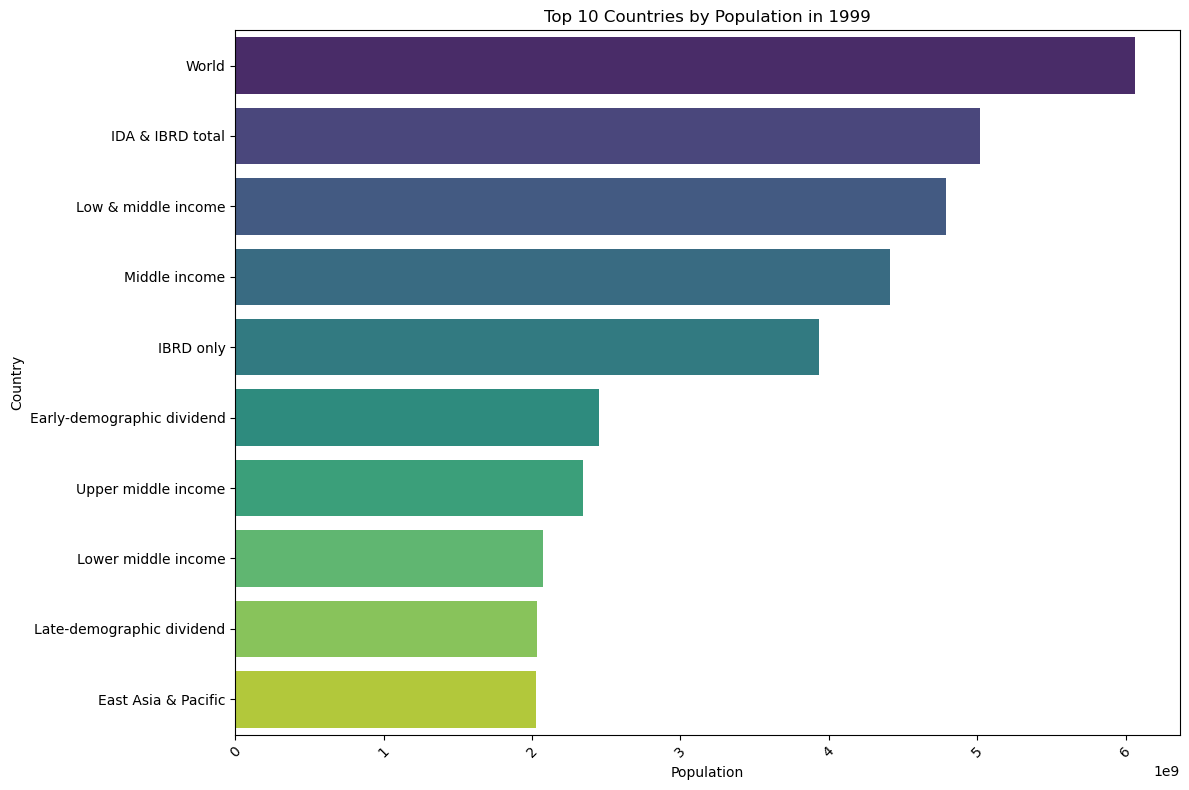

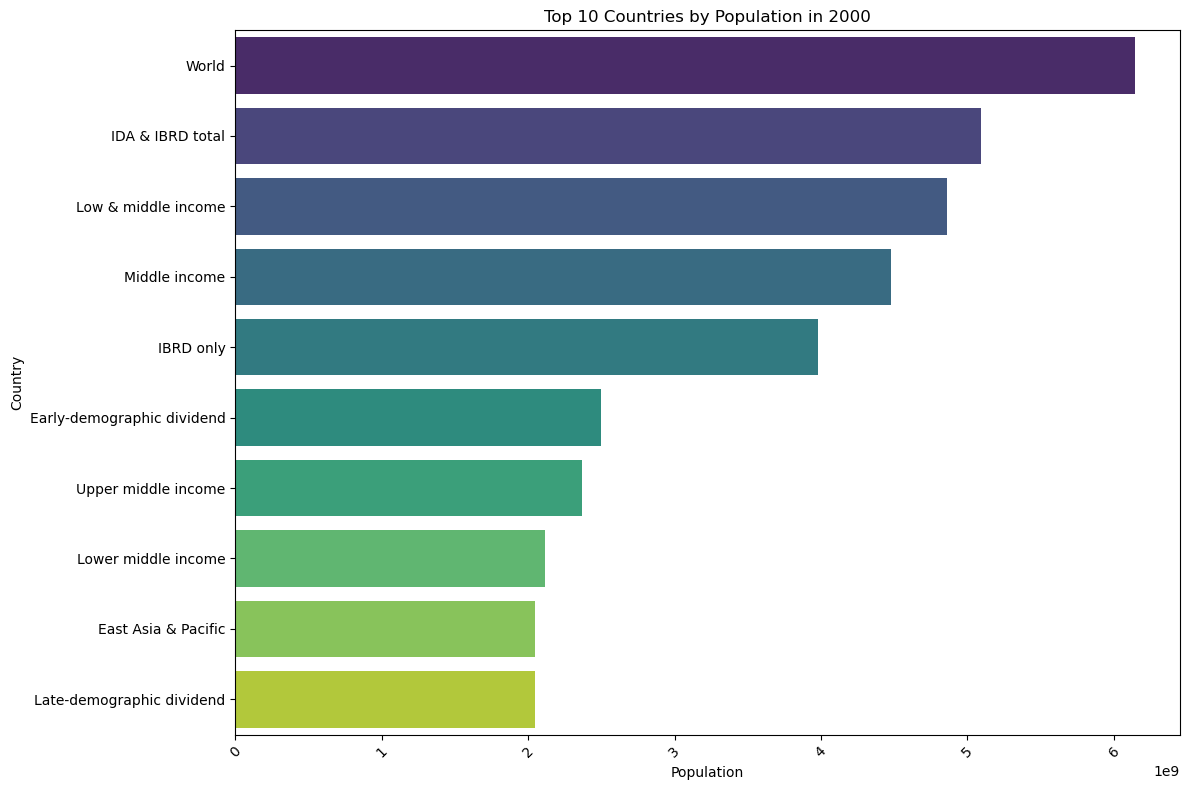

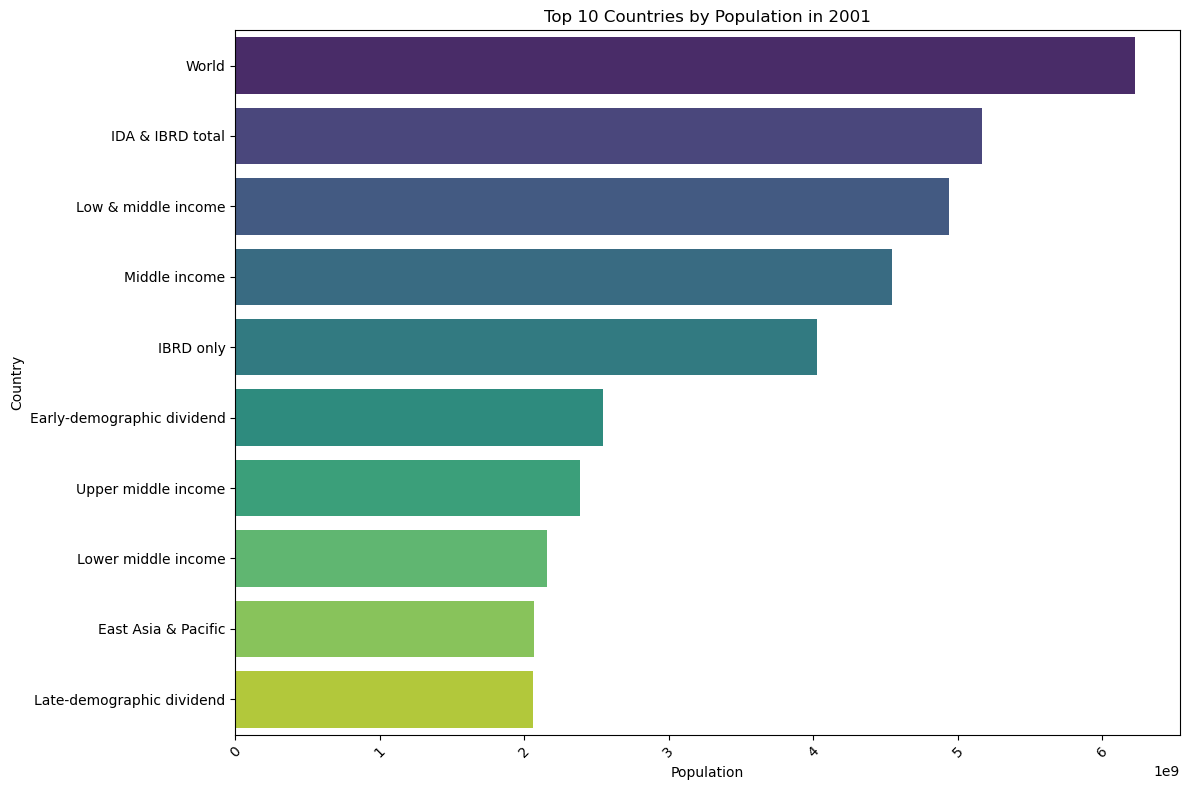

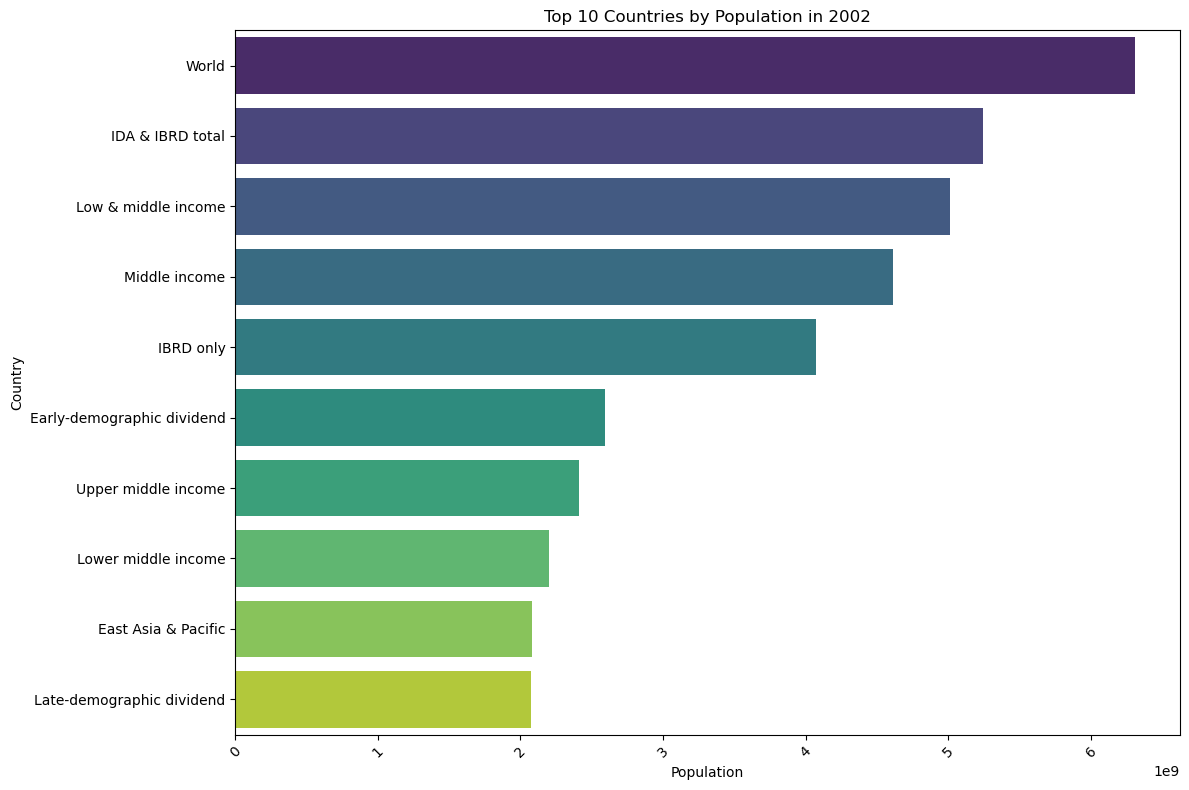

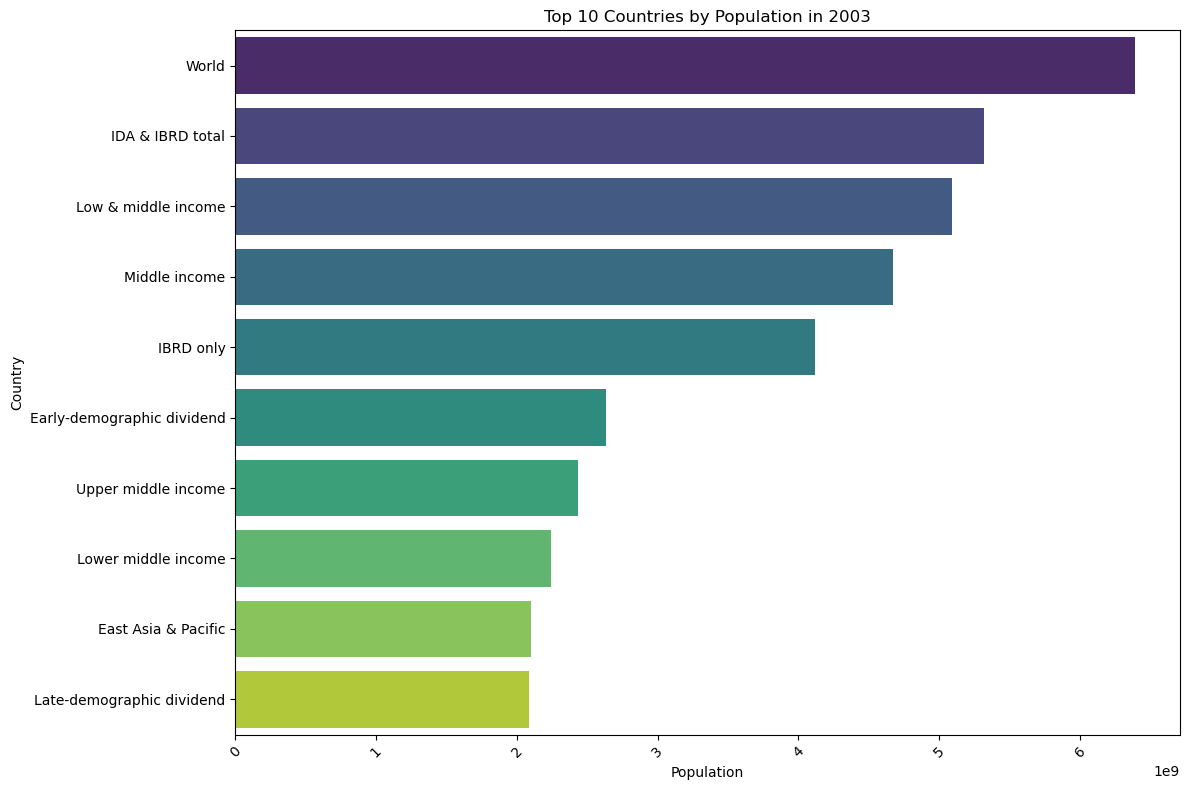

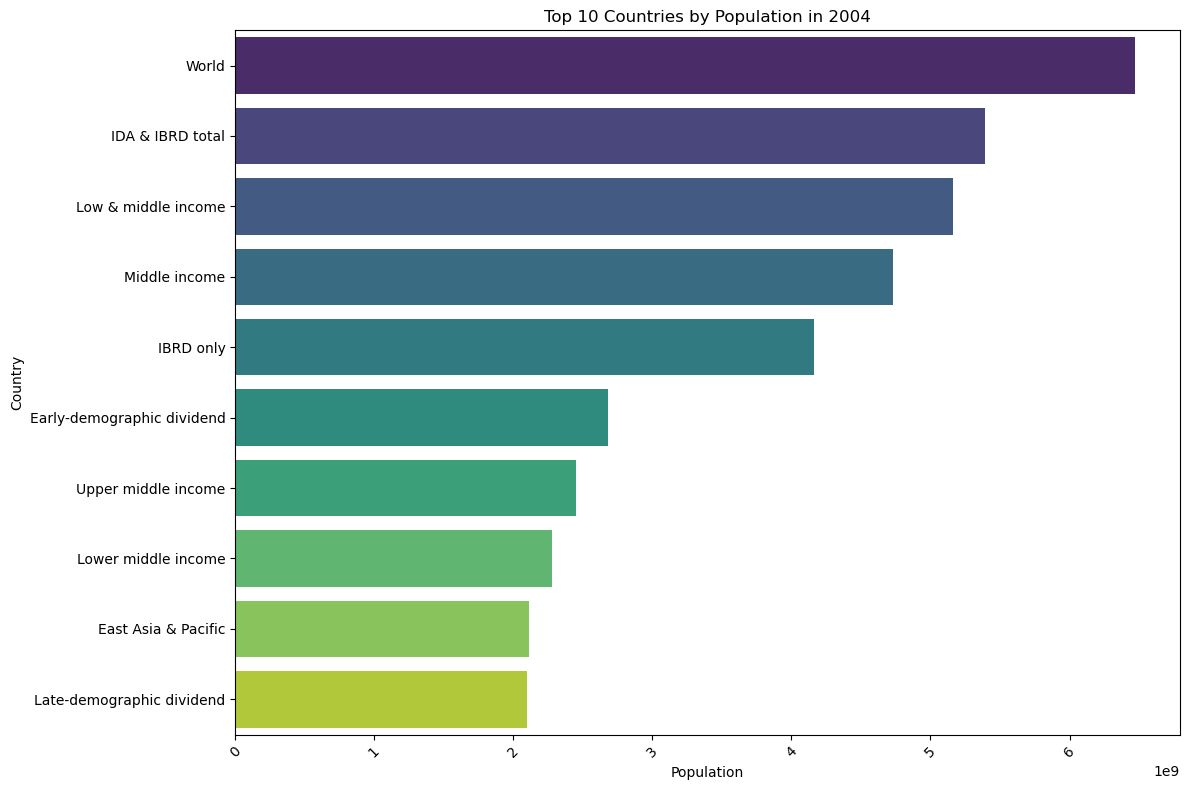

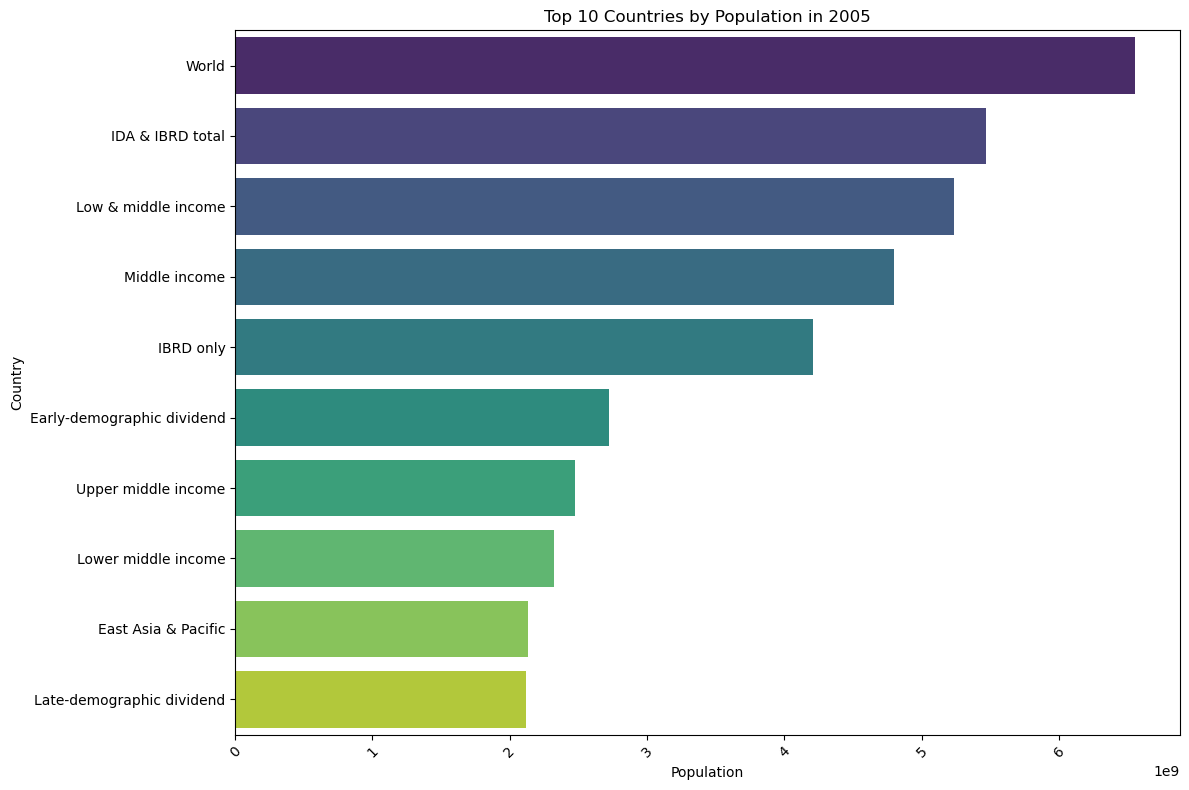

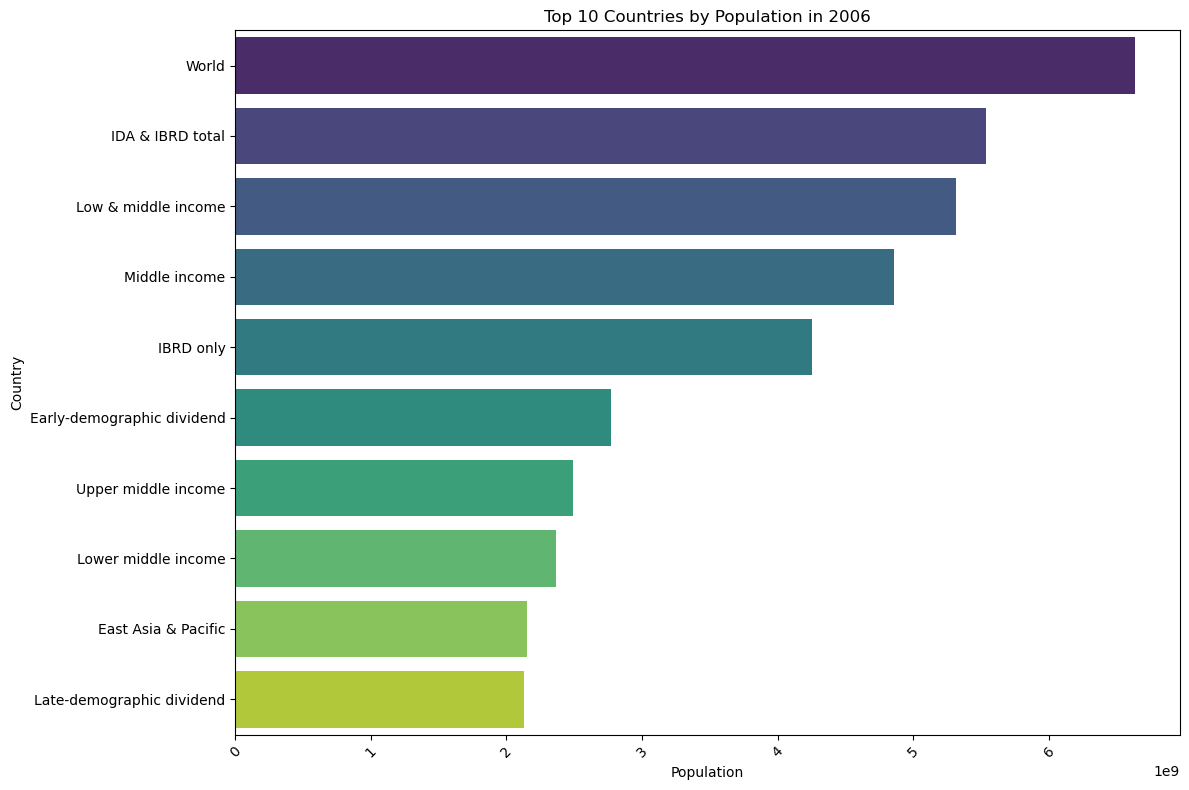

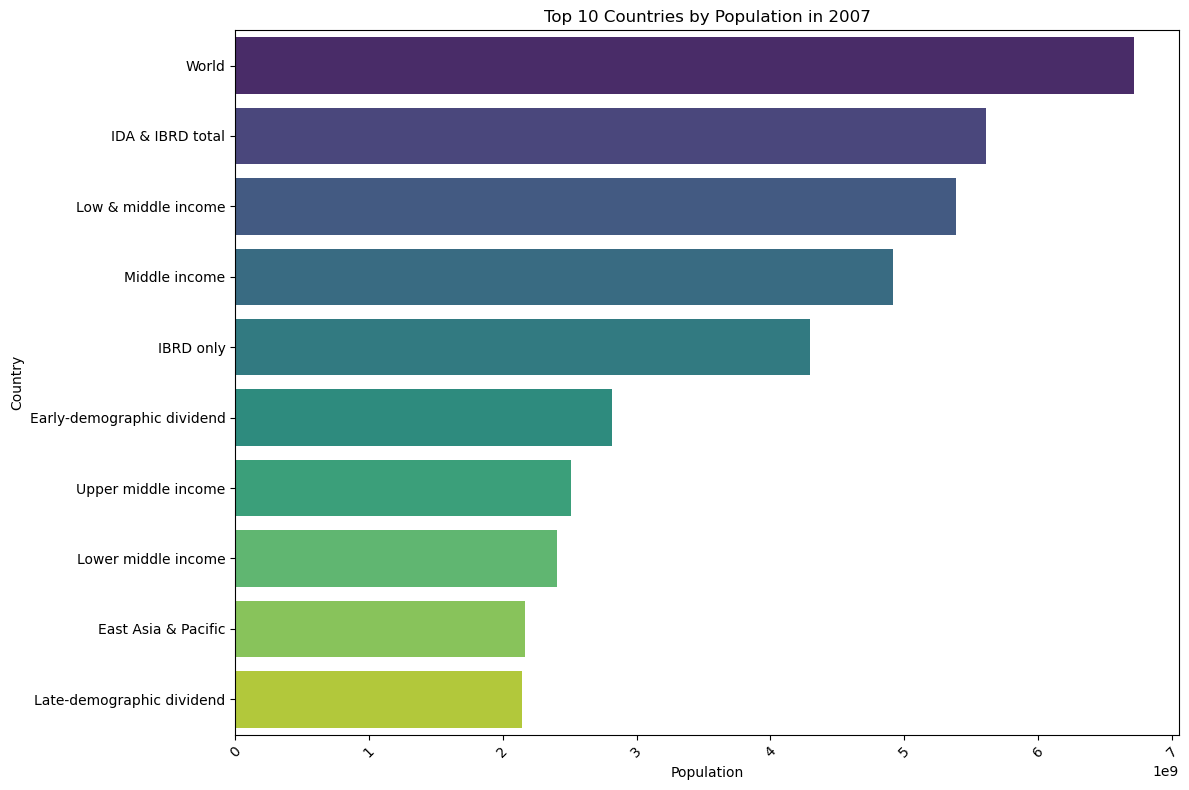

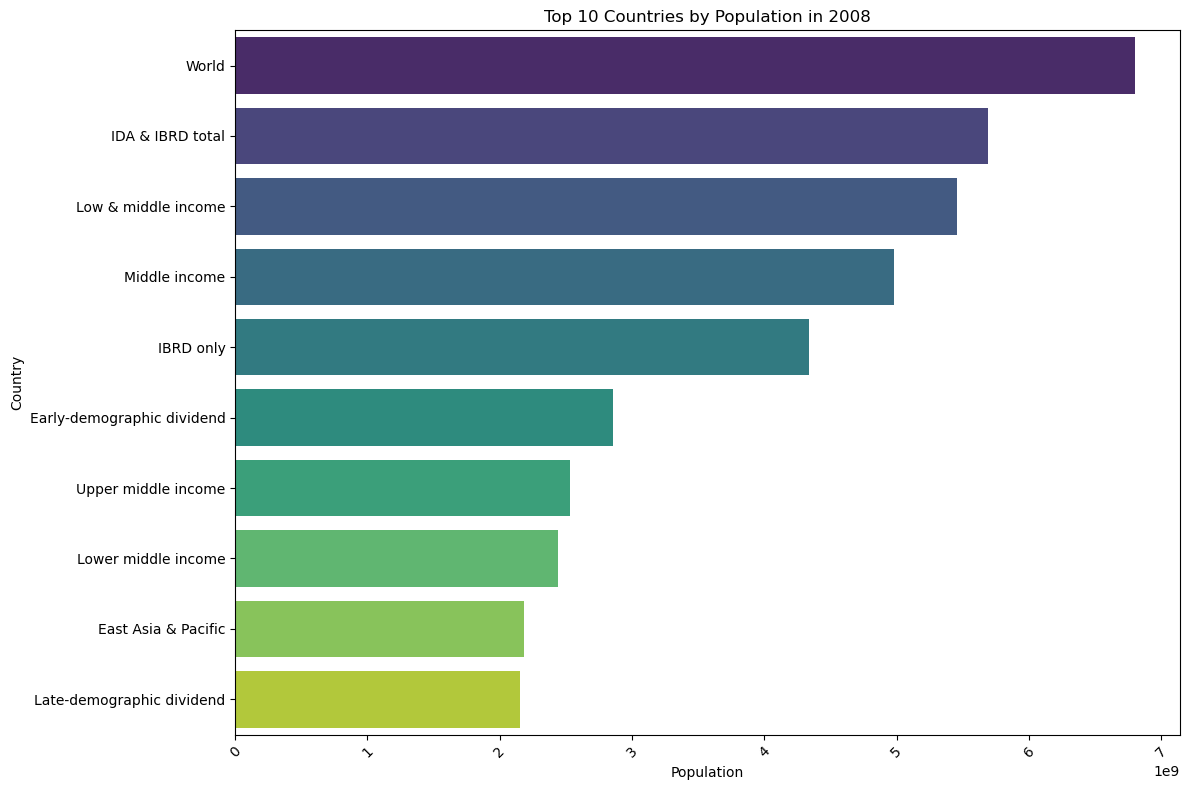

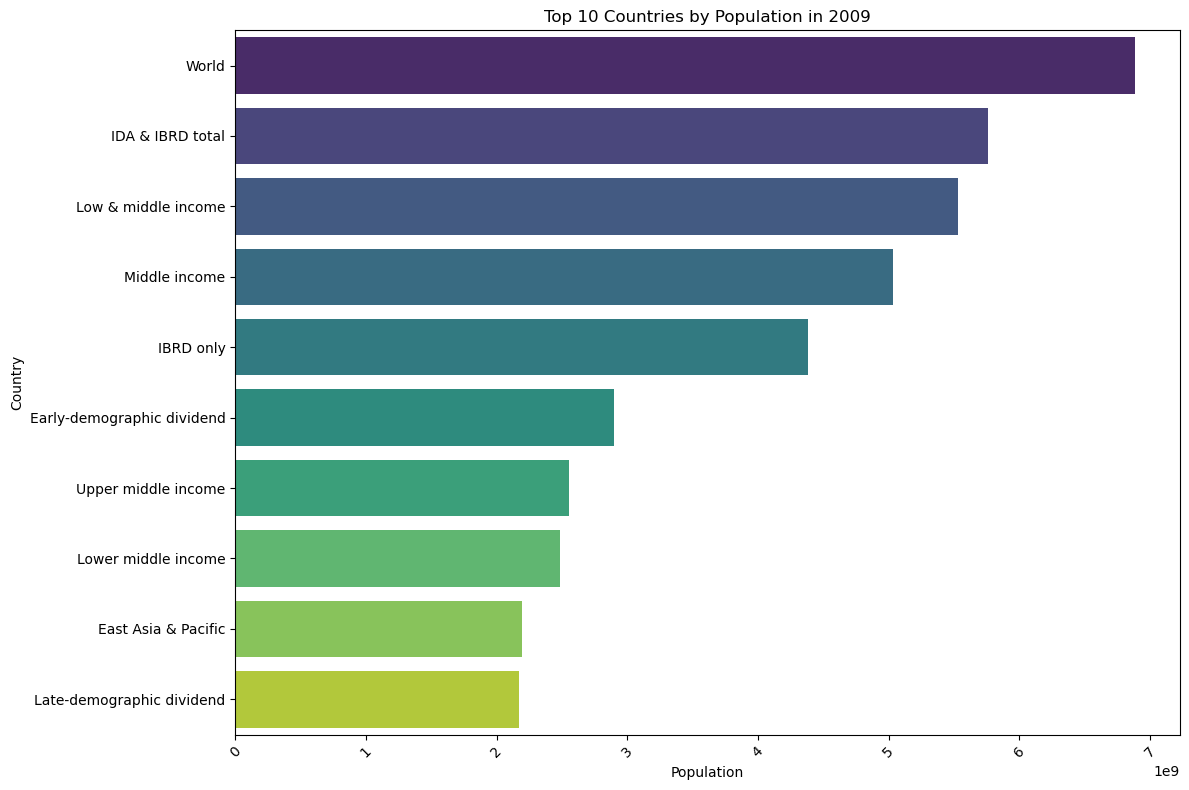

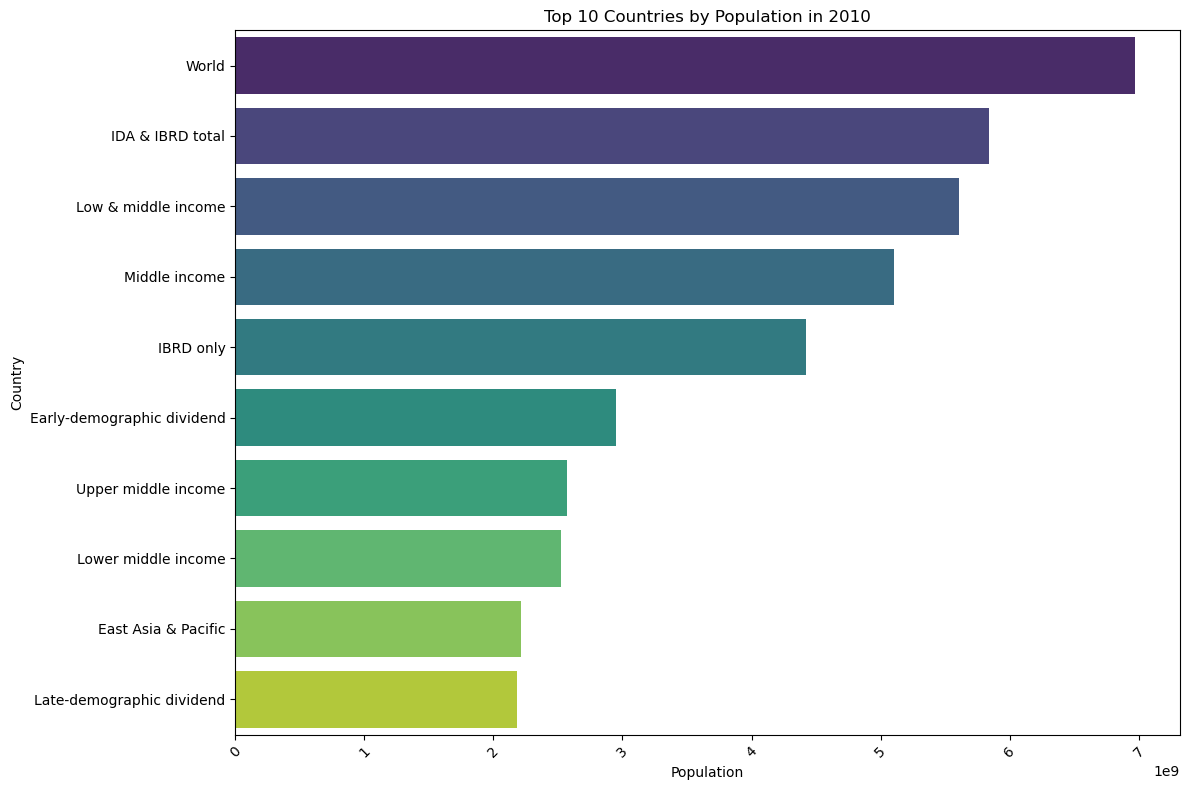

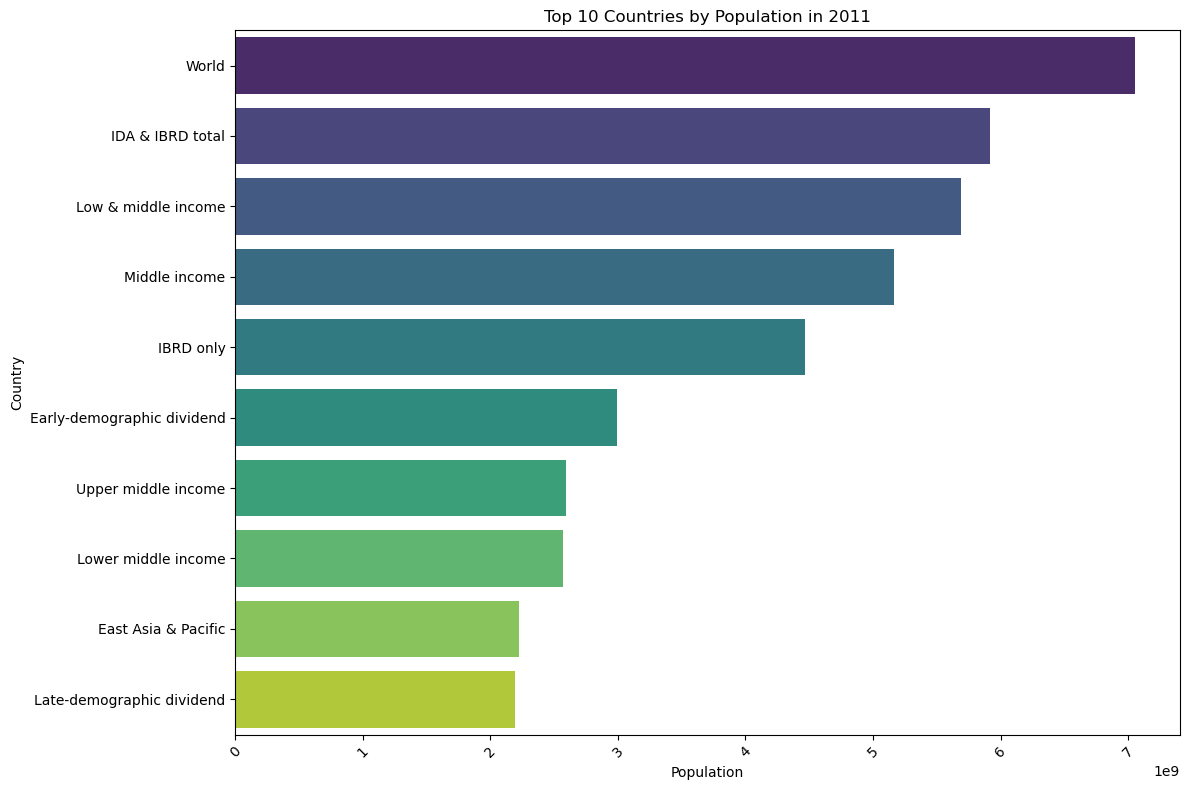

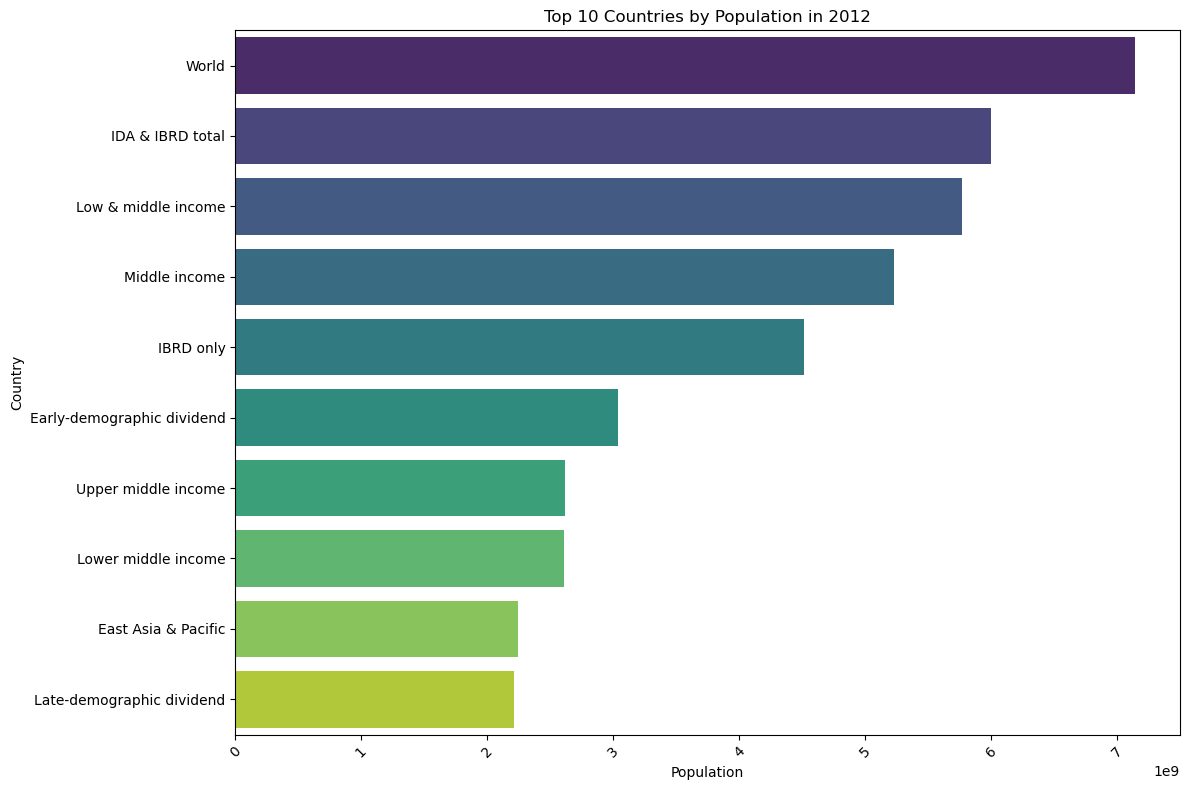

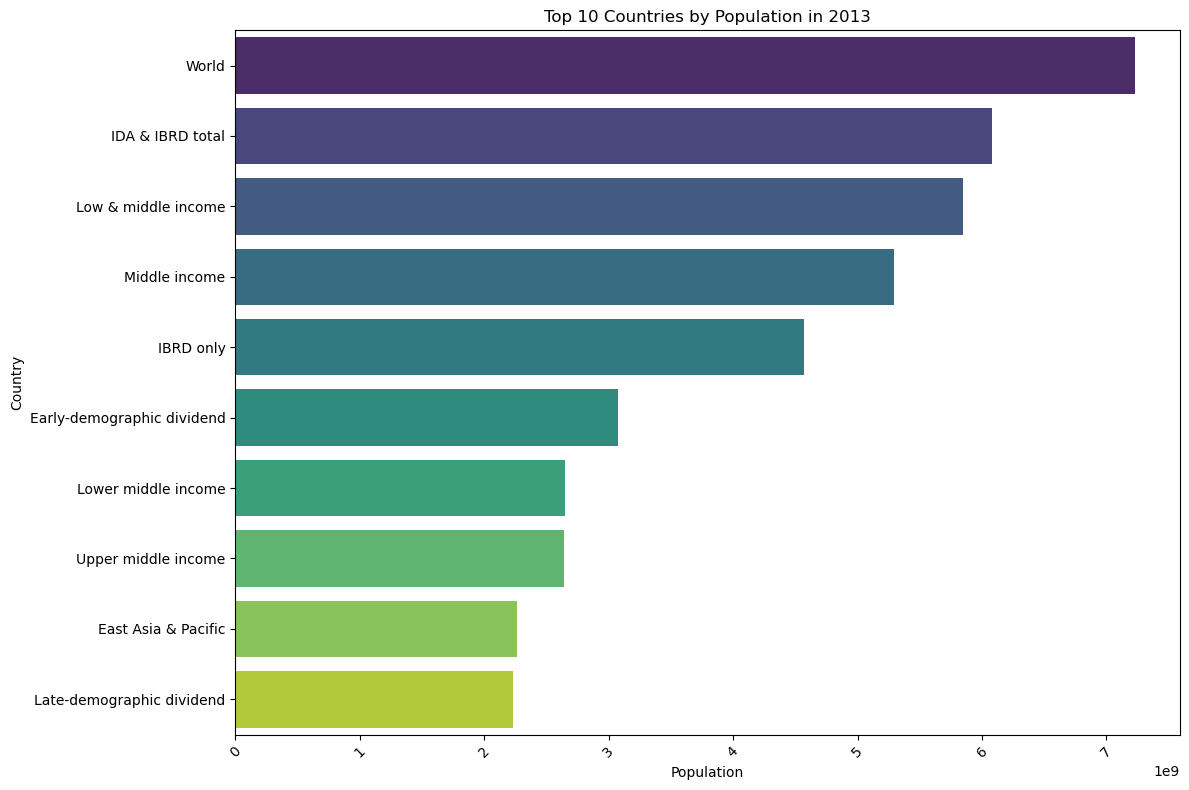

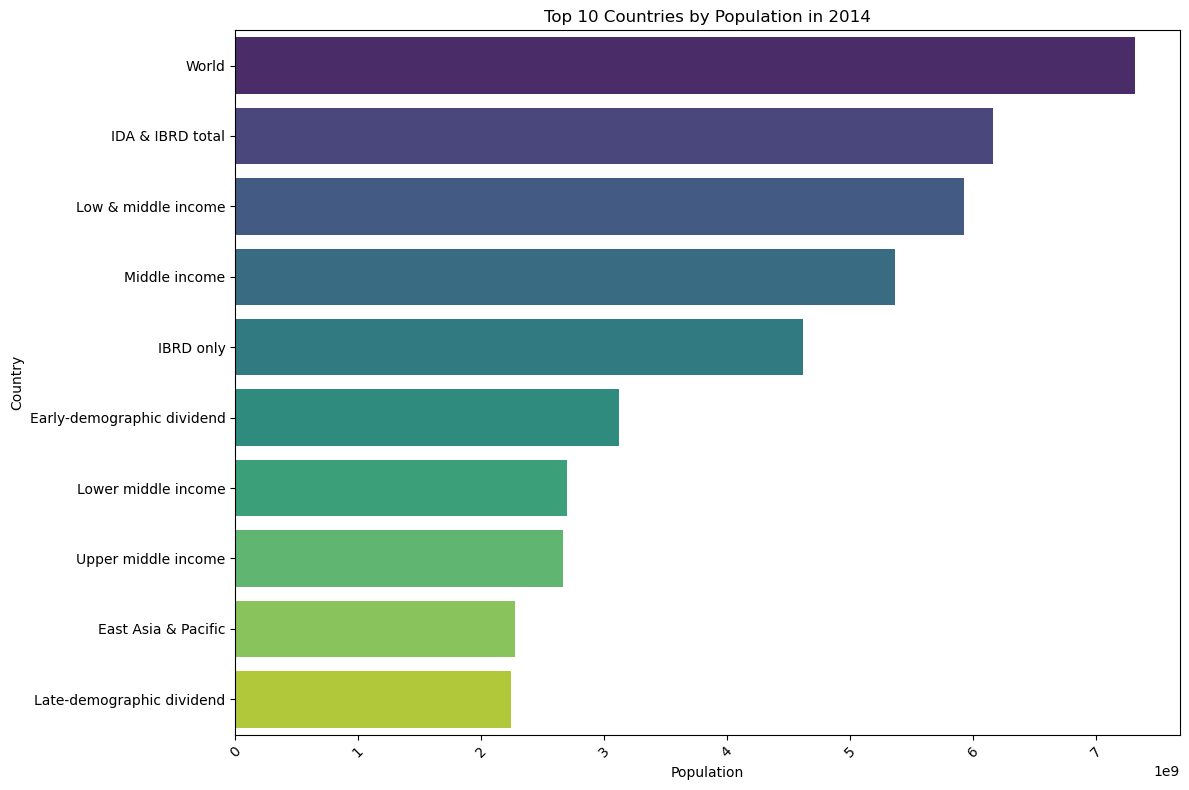

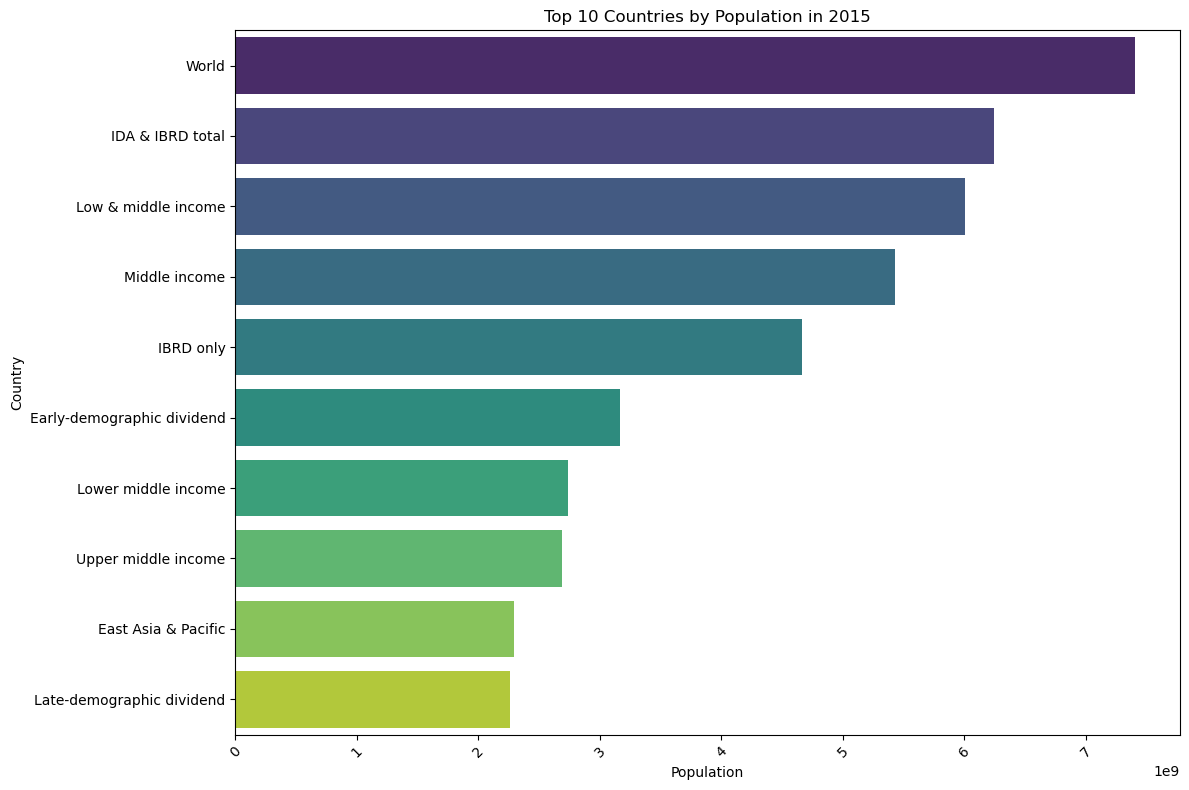

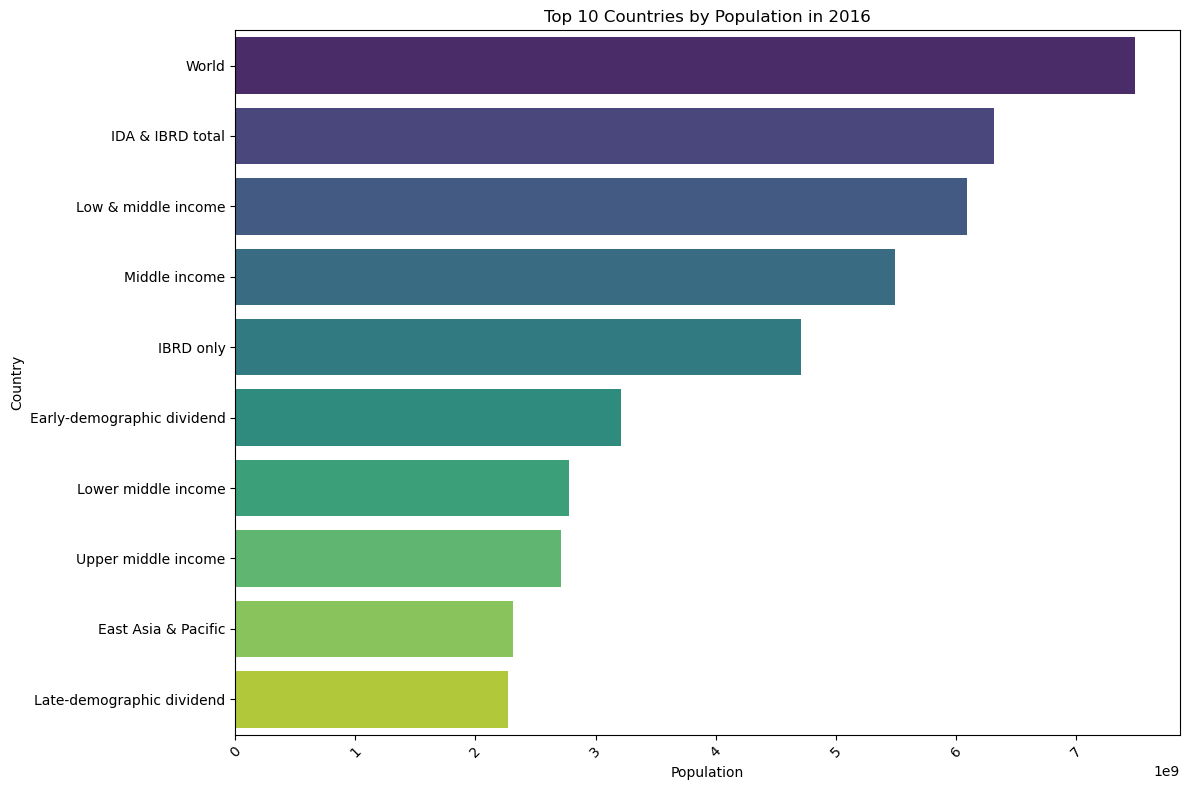

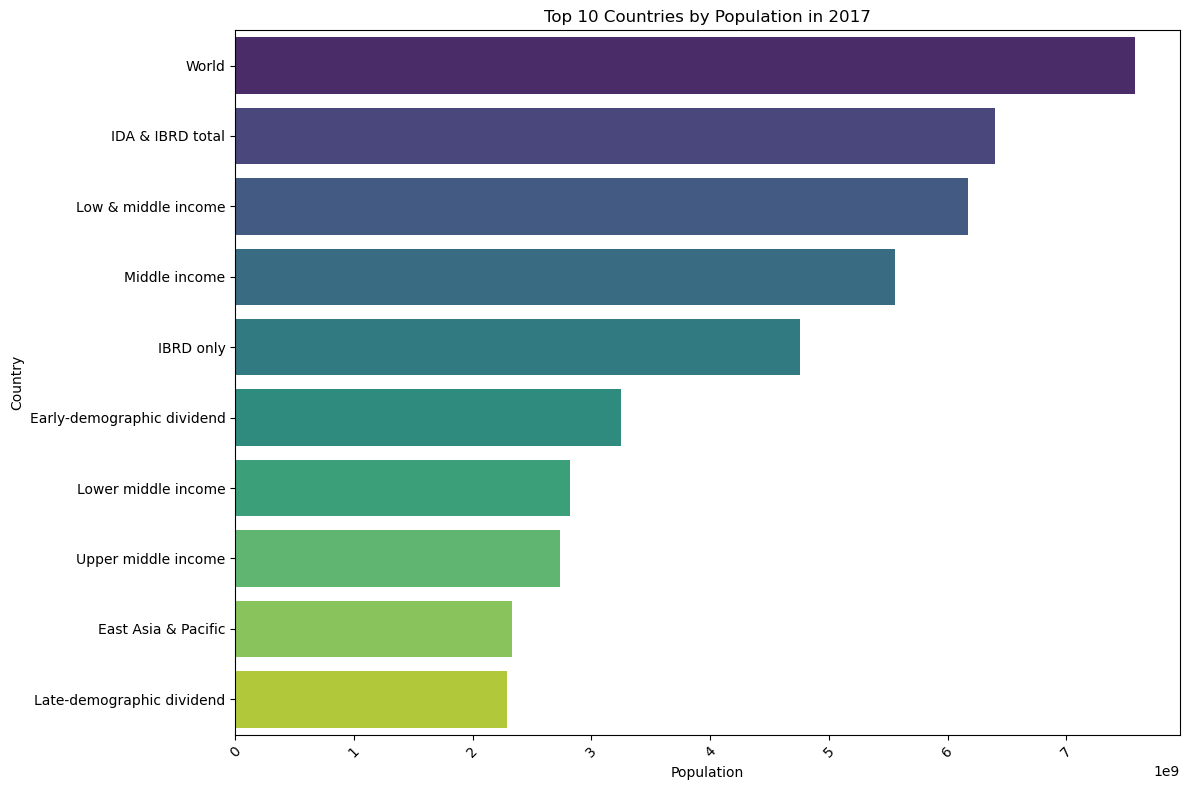

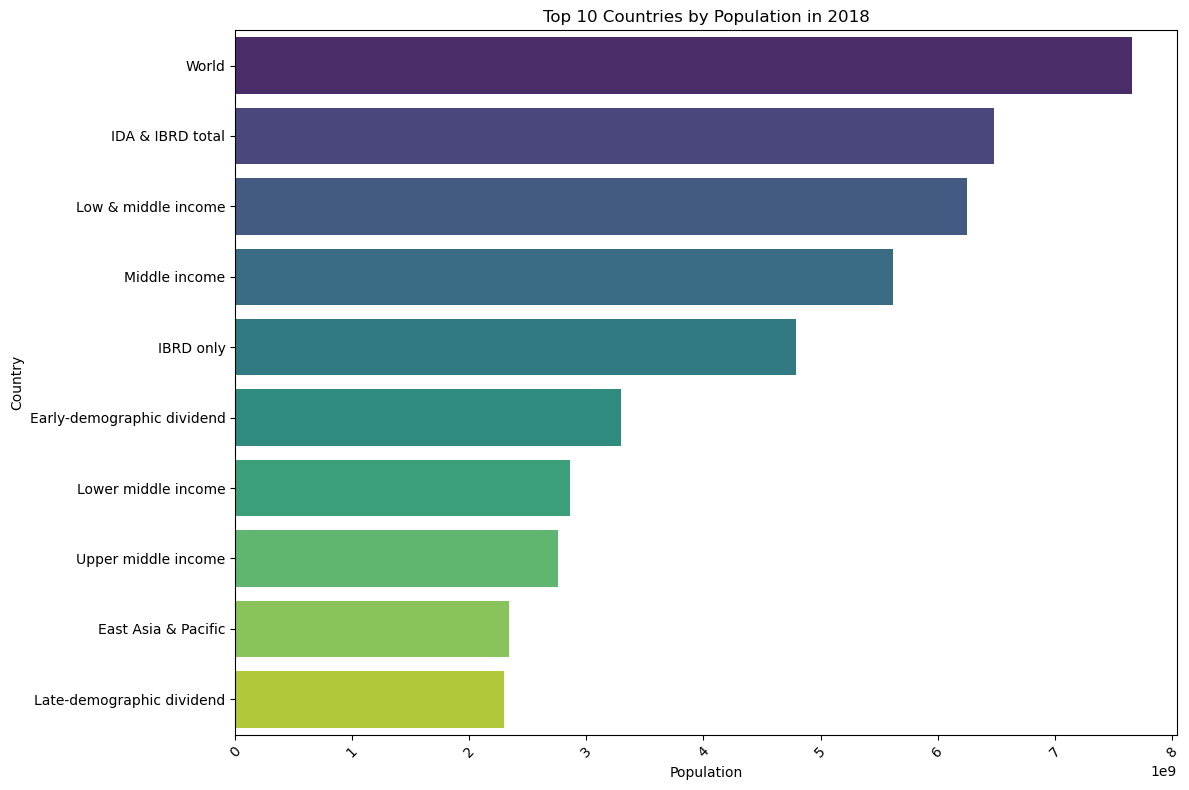

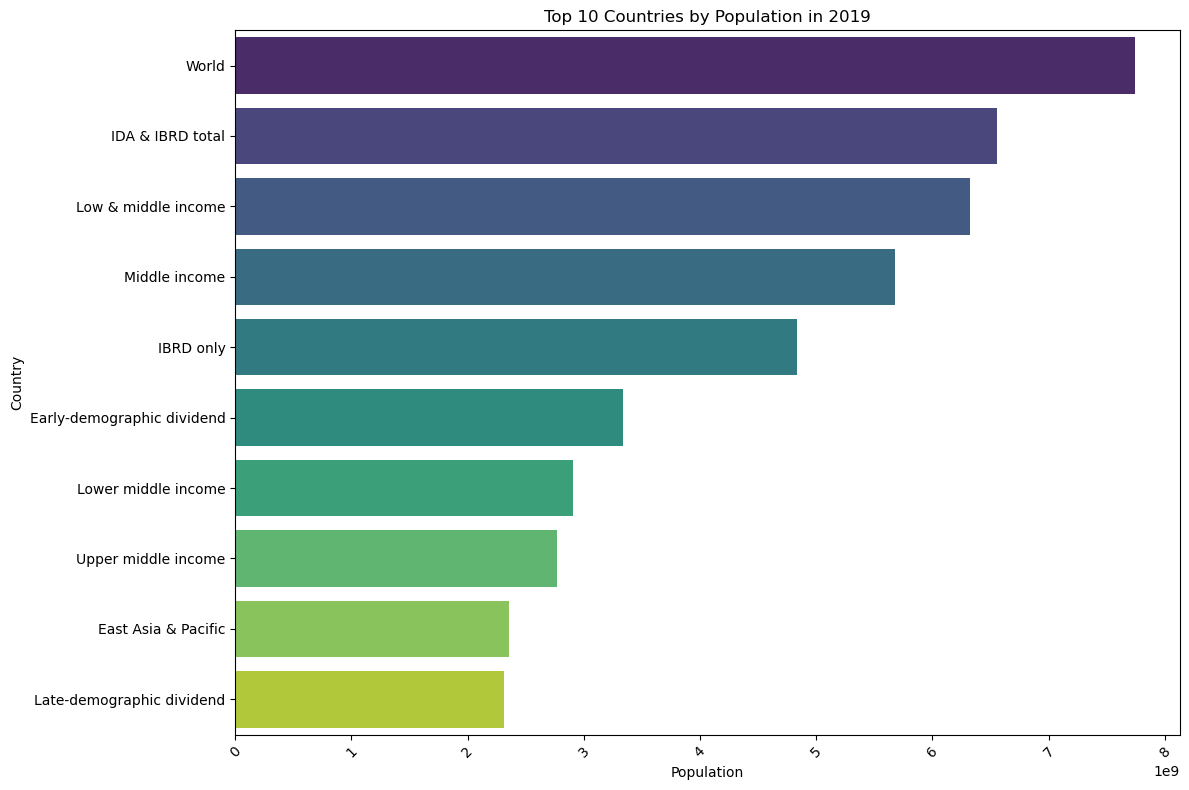

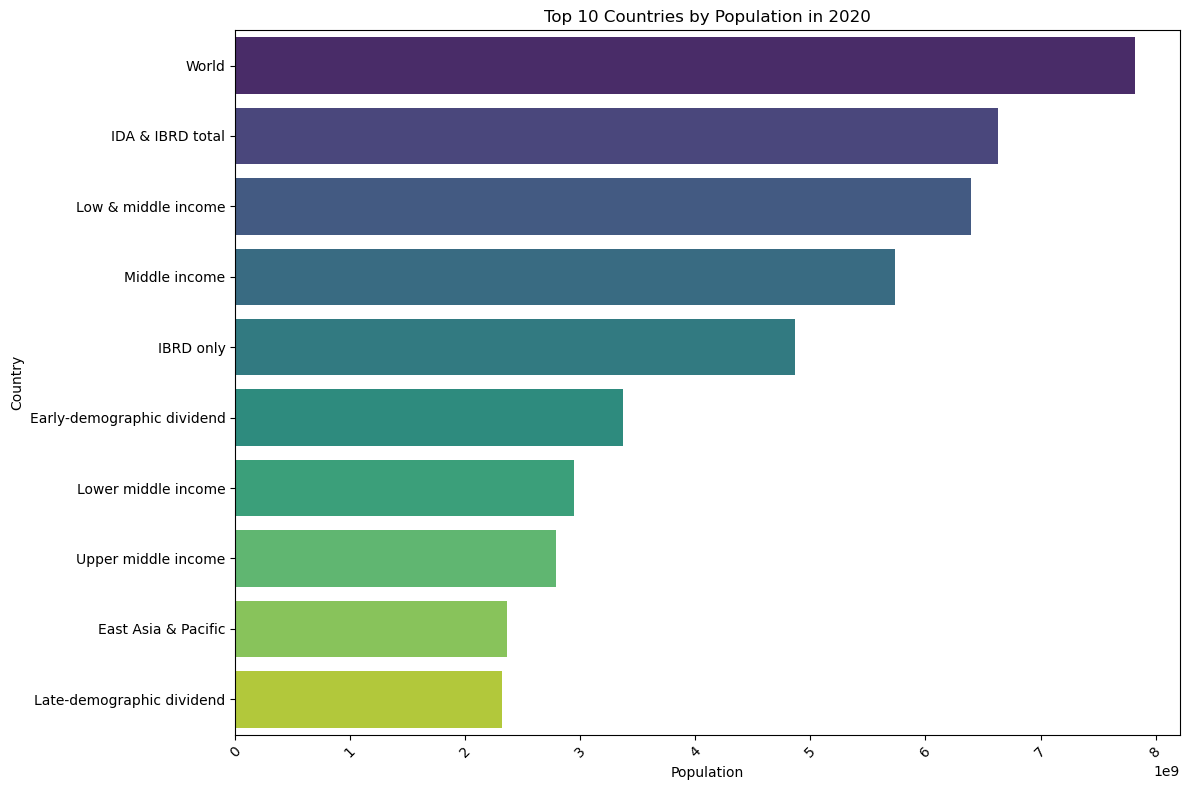

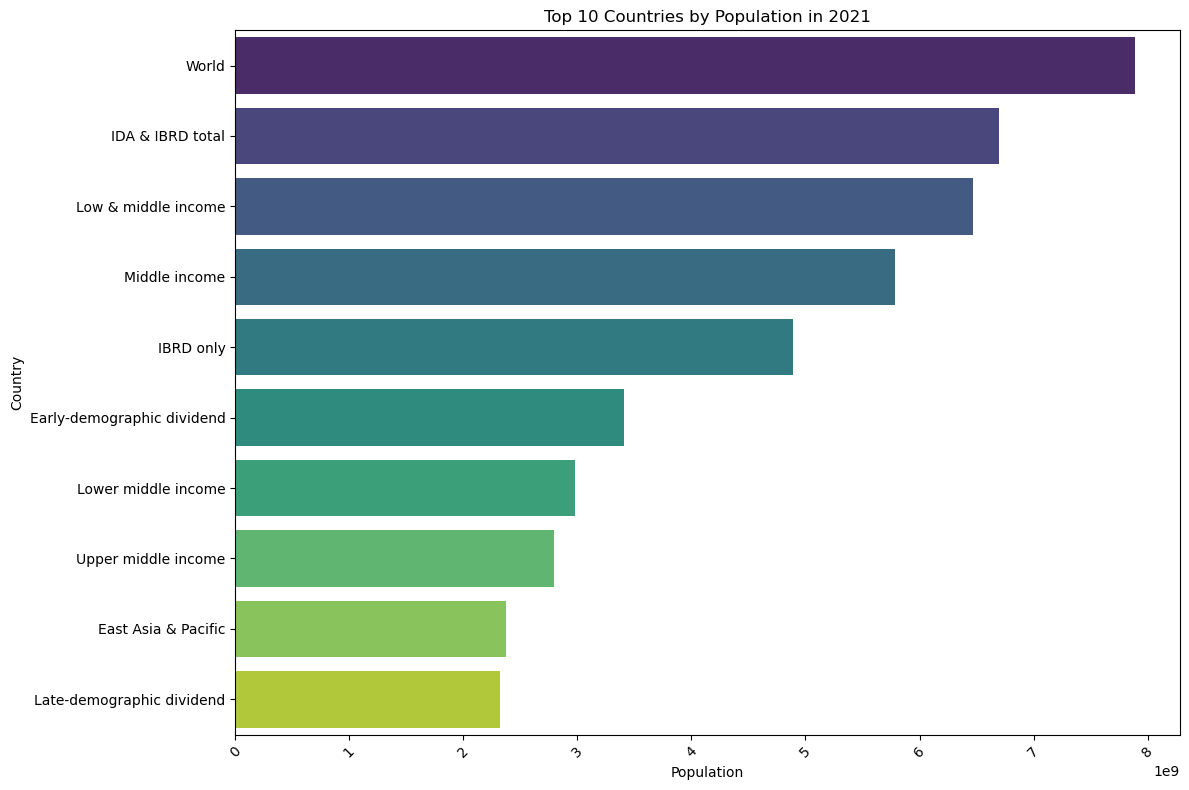

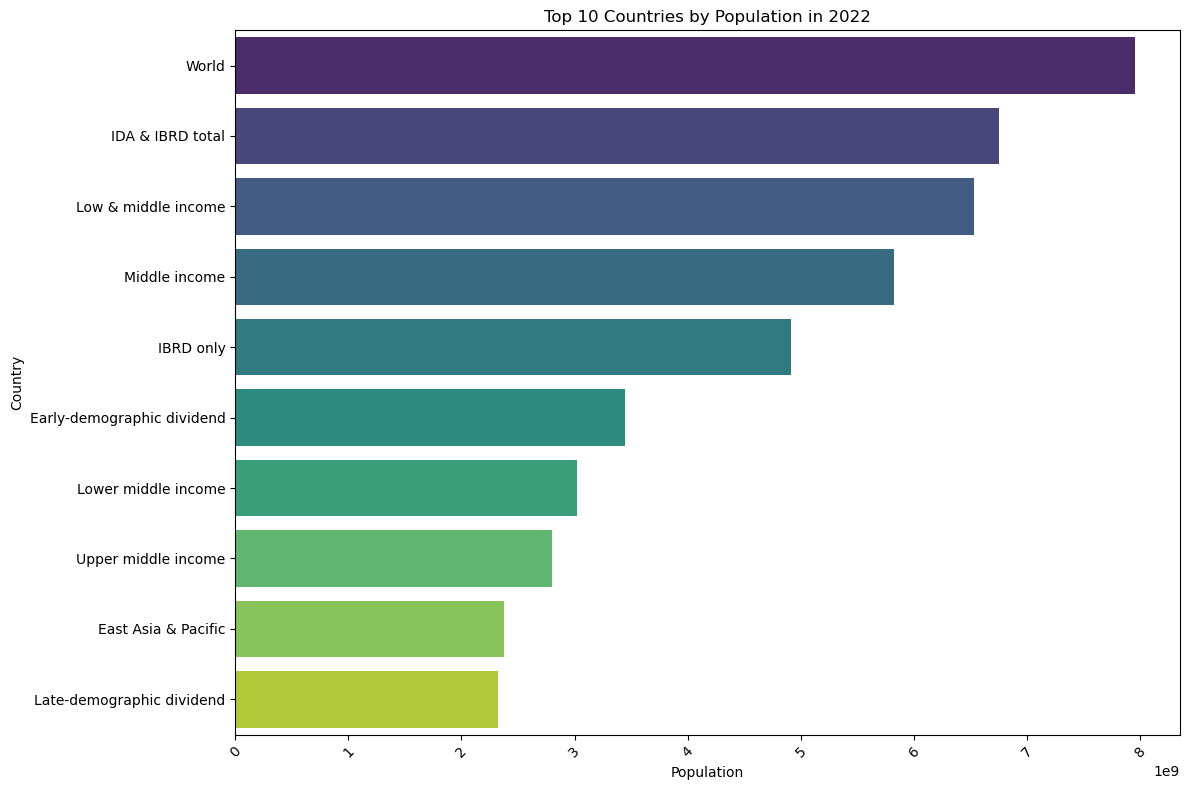

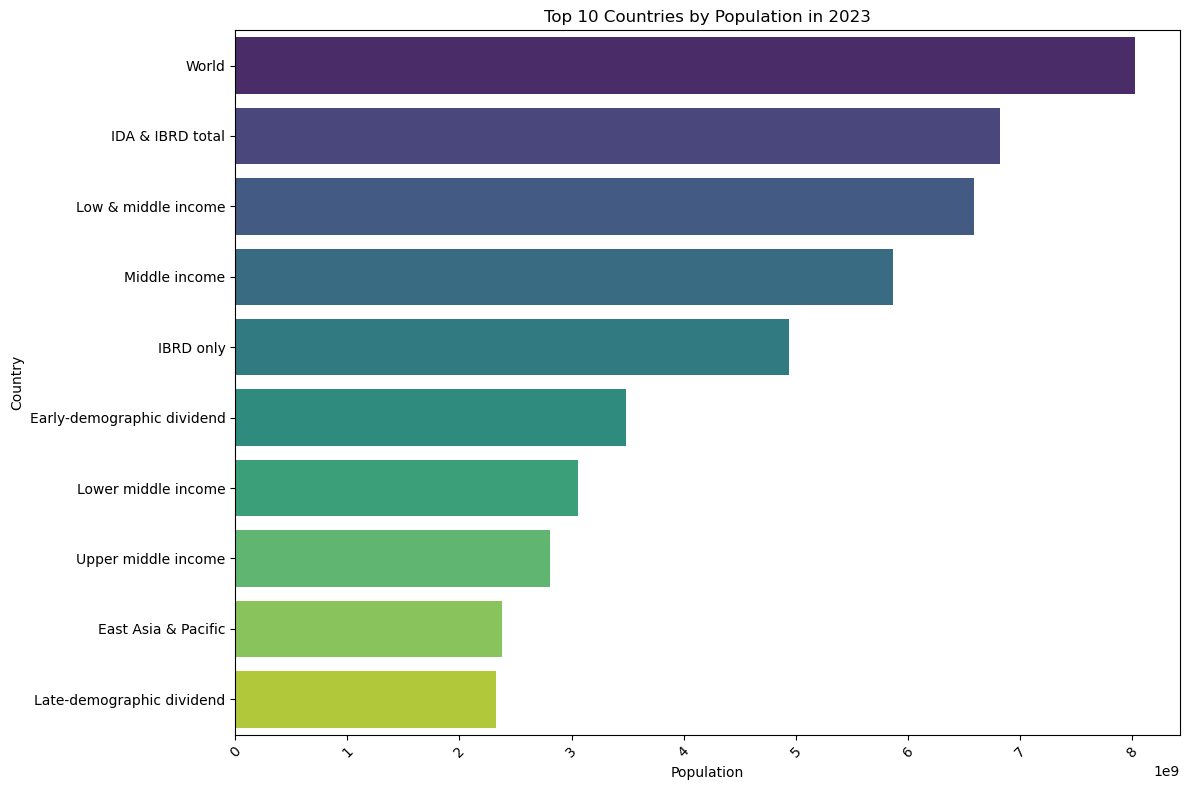

In [75]:
for year in years:
    # Sort by the year column and get the top 10 countries
    maximum_year = Cleaned_Dataset[['Country Name', year]].sort_values(by=year, ascending=False).head(10)
    
    # Create the bar plot
    plt.figure(figsize=(12, 8))
    sns.barplot(x=year, y='Country Name', data=maximum_year, palette='viridis')
    plt.title(f'Top 10 Countries by Population in {year}')
    plt.xlabel('Population')
    plt.ylabel('Country')
    plt.xticks(rotation=45)
    plt.tight_layout()
    
    # Display the plot
    plt.show()


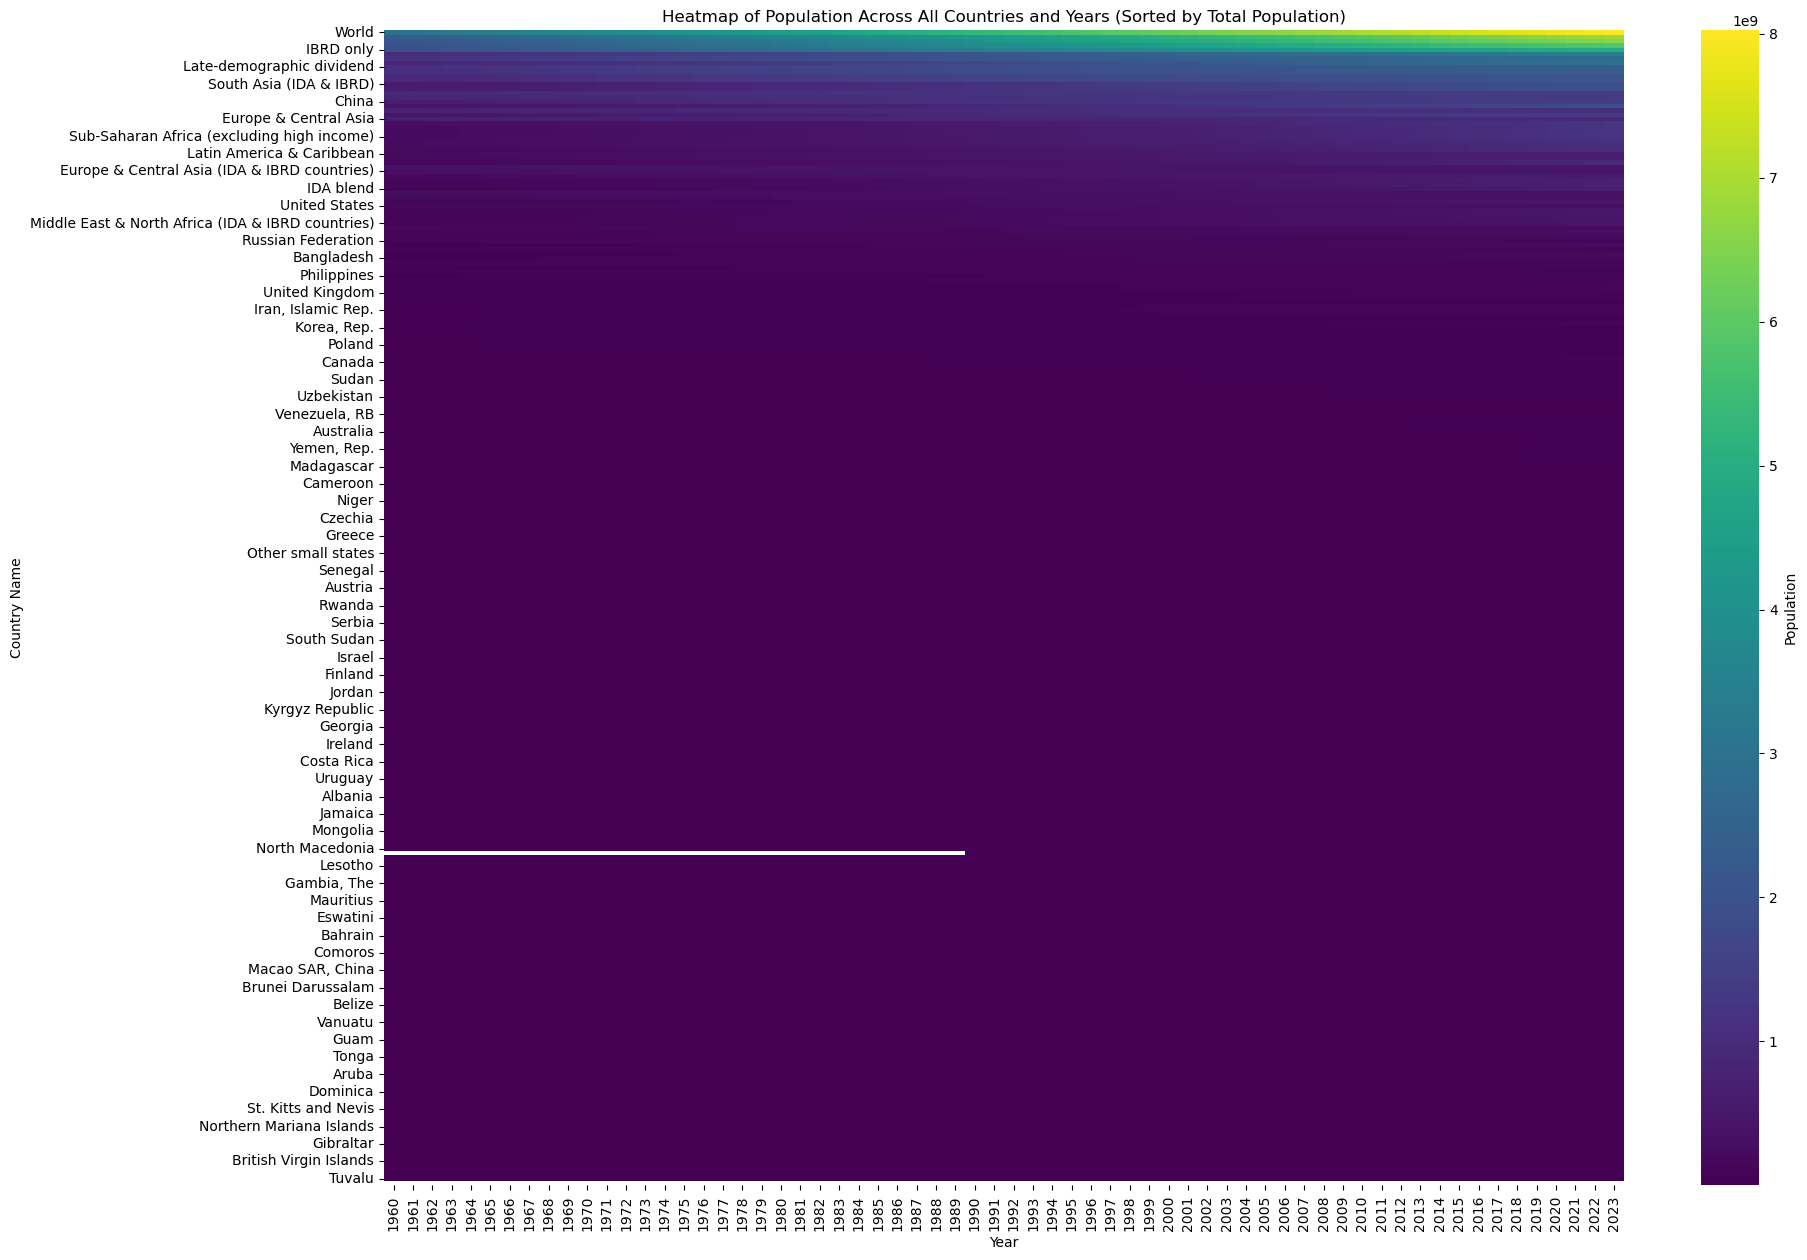

In [88]:
# Calculate the total population for each country across all years
Cleaned_Dataset['Total Population'] = Cleaned_Dataset[years].sum(axis=1)

# Sort the DataFrame by total population in descending order
Cleaned_Dataset_sorted = Cleaned_Dataset.sort_values(by='Total Population', ascending=False)

# Create the heatmap with countries sorted from highest to lowest total population
plt.figure(figsize=(20, 15))
sns.heatmap(Cleaned_Dataset_sorted.set_index('Country Name')[years], cmap='viridis', cbar_kws={'label': 'Population'})
plt.title('Heatmap of Population Across All Countries and Years (Sorted by Total Population)')
plt.xlabel('Year')
plt.ylabel('Country Name')
plt.show()
